# **Import Libraries**

In [ ]:
%pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import scipy.stats as stats
import io
from plotly.offline import plot, iplot, init_notebook_mode
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from imblearn.under_sampling import RandomUnderSampler
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, RandomizedSearchCV
import sklearn.metrics as metrics
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score,precision_recall_curve, f1_score, fbeta_score
from sklearn.metrics import classification_report
from lazypredict.Supervised import LazyClassifier
import warnings
warnings.filterwarnings("ignore")

# **Read Data**

In [ ]:
target_df = pd.read_csv("training_set_labels.csv")
train_df = pd.read_csv("training_set_features.csv")

In [ ]:
#Merge 2 datasets based on variable respondent_id

master_df = pd.merge(train_df, target_df, how='inner', on='respondent_id')
master_df

respondent_id  h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
0                  0          1.00            0.00                       0.00   
1                  1          3.00            2.00                       0.00   
2                  2          1.00            1.00                       0.00   
3                  3          1.00            1.00                       0.00   
4                  4          2.00            1.00                       0.00   
...              ...           ...             ...                        ...   
26702          26702          2.00            0.00                       0.00   
26703          26703          1.00            2.00                       0.00   
26704          26704          2.00            2.00                       0.00   
26705          26705          1.00            1.00                       0.00   
26706          26706          0.00            0.00                       0.00   

       behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
0                      0.00                  0.00                   0.00   
1                      1.00                  0.00                   1.00   
2                      1.00                  0.00                   0.00   
3                      1.00                  0.00                   1.00   
4                      1.00                  0.00                   1.00   
...                     ...                   ...                    ...   
26702                  1.00                  0.00                   0.00   
26703                  1.00                  0.00                   1.00   
26704                  1.00                  1.00                   1.00   
26705                  0.00                  0.00                   0.00   
26706                  1.00                  0.00                   0.00   

       behavioral_large_gatherings  behavioral_outside_home  \
0                             0.00                     1.00   
1                             0.00                     1.00   
2                             0.00                     0.00   
3                             1.00                     0.00   
4                             1.00                     0.00   
...                            ...                      ...   
26702                         0.00                     1.00   
26703                         0.00                     0.00   
26704                         1.00                     0.00   
26705                         0.00                     0.00   
26706                         0.00                     0.00   

       behavioral_touch_face  ...  rent_or_own   employment_status  \
0                       1.00  ...          Own  Not in Labor Force   
1                       1.00  ...         Rent            Employed   
2                       0.00  ...          Own            Employed   
3                       0.00  ...         Rent  Not in Labor Force   
4                       1.00  ...          Own            Employed   
...                      ...  ...          ...                 ...   
26702                   0.00  ...          Own  Not in Labor Force   
26703                   0.00  ...         Rent            Employed   
26704                   1.00  ...          Own                 NaN   
26705                    NaN  ...         Rent            Employed   
26706                   0.00  ...          Own  Not in Labor Force   

       hhs_geo_region                census_msa  household_adults  \
0            oxchjgsf                   Non-MSA              0.00   
1            bhuqouqj  MSA, Not Principle  City              0.00   
2            qufhixun  MSA, Not Principle  City              2.00   
3            lrircsnp       MSA, Principle City              0.00   
4            qufhixun  MSA, Not Principle  City              1.00   
...               ...                       ...               ...   
26702        qufhixun                   

In [ ]:
# Size Dataset
print('Size dataset:', master_df.shape)

Size dataset: (26707, 38)


In [ ]:
# Data Overview
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

# **Data Preprocessing**

# Handle Missing Values

In [ ]:
# Unique Columns
master_df.select_dtypes(include='object').nunique()

age_group                 5
education                 4
race                      4
sex                       2
income_poverty            3
marital_status            2
rent_or_own               2
employment_status         3
hhs_geo_region           10
census_msa                3
employment_industry      21
employment_occupation    23
dtype: int64

Features di atas memiliki tipe data object dengan yang memiliki kategori dengan jumlah masing-masing dapat dilihat diatas.

In [ ]:
# Check duplicate values
master_df.duplicated().sum()

0

Tidak ada data yang duplicate

In [ ]:
# Missing Value
print('The number of missing value on dataset:')
master_df.isna().sum()

The number of missing value on dataset:


respondent_id                      0
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
m

In [ ]:
# Check percentage of missing values
master_df.isna().sum()/len(master_df)*100

respondent_id                  0.00
h1n1_concern                   0.34
h1n1_knowledge                 0.43
behavioral_antiviral_meds      0.27
behavioral_avoidance           0.78
behavioral_face_mask           0.07
behavioral_wash_hands          0.16
behavioral_large_gatherings    0.33
behavioral_outside_home        0.31
behavioral_touch_face          0.48
doctor_recc_h1n1               8.09
doctor_recc_seasonal           8.09
chronic_med_condition          3.64
child_under_6_months           3.07
health_worker                  3.01
health_insurance              45.96
opinion_h1n1_vacc_effective    1.46
opinion_h1n1_risk              1.45
opinion_h1n1_sick_from_vacc    1.48
opinion_seas_vacc_effective    1.73
opinion_seas_risk              1.92
opinion_seas_sick_from_vacc    2.01
age_group                      0.00
education                      5.27
race                           0.00
sex                            0.00
income_poverty                16.56
marital_status              

<Axes: >

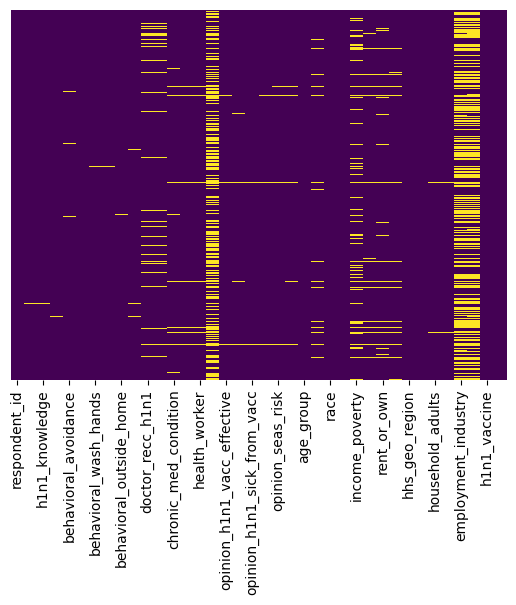

In [ ]:
# Plot missing values
sns.heatmap(master_df.isna(),yticklabels=False,cbar=False,cmap='viridis')

Karena terdapat banyak missing value, kita perlu menemukan hubungan antara missing value dengan variabel target 'h1n1_vaccine' dan 'seasonal_vaccine'

# Pengaruh Missing Values

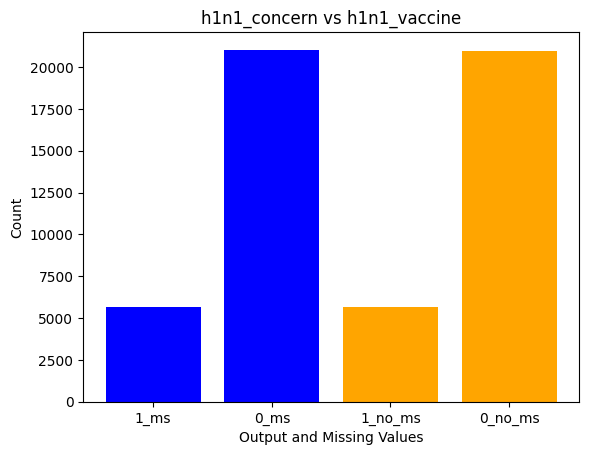

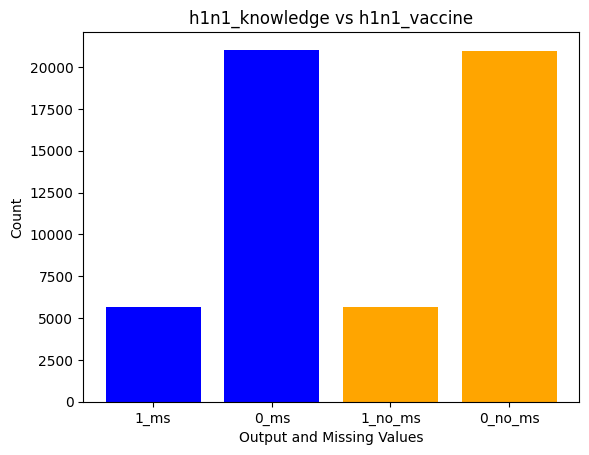

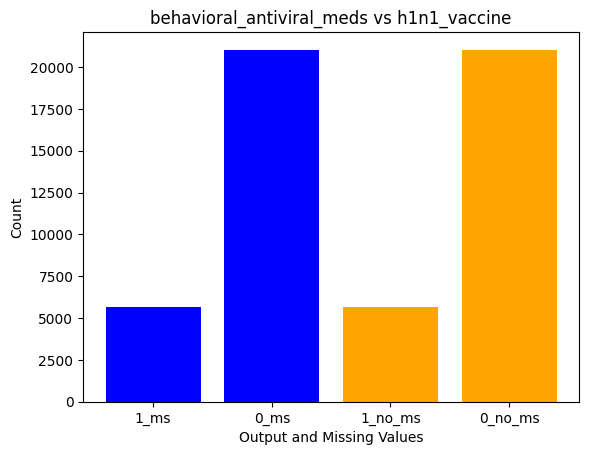

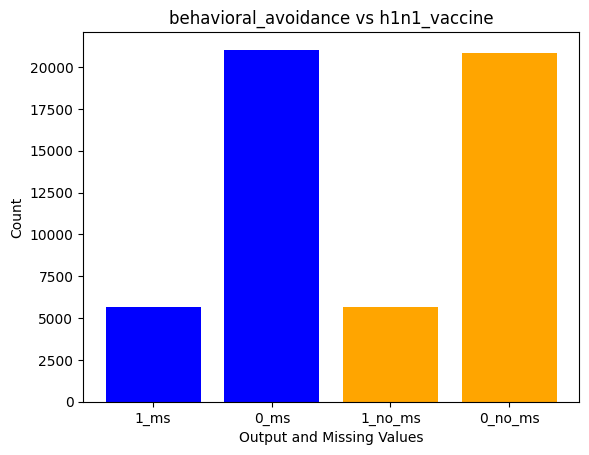

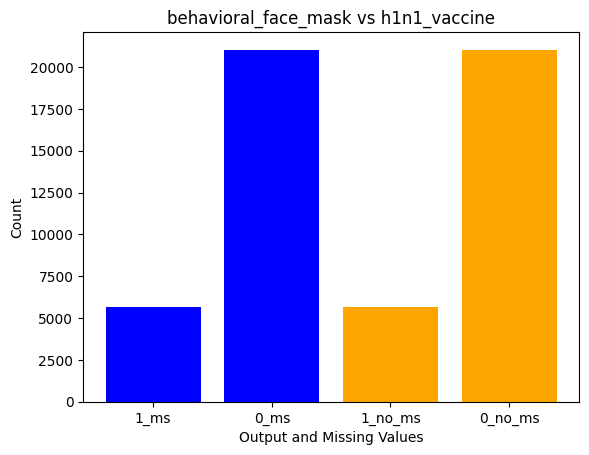

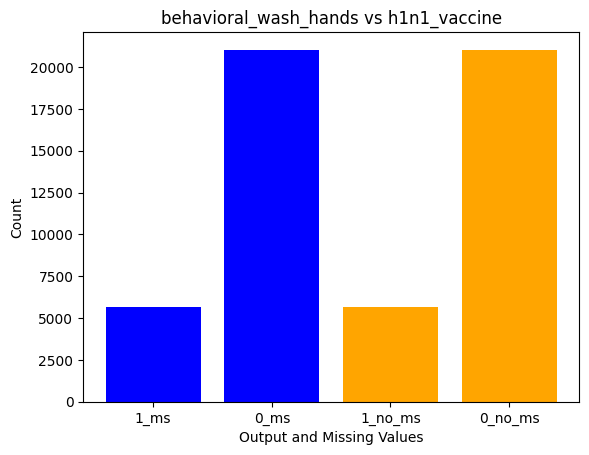

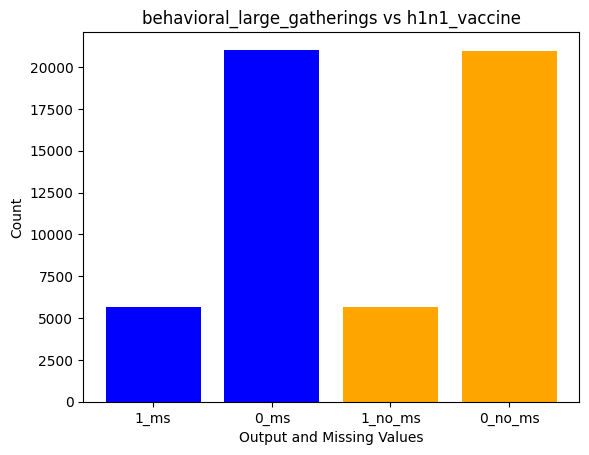

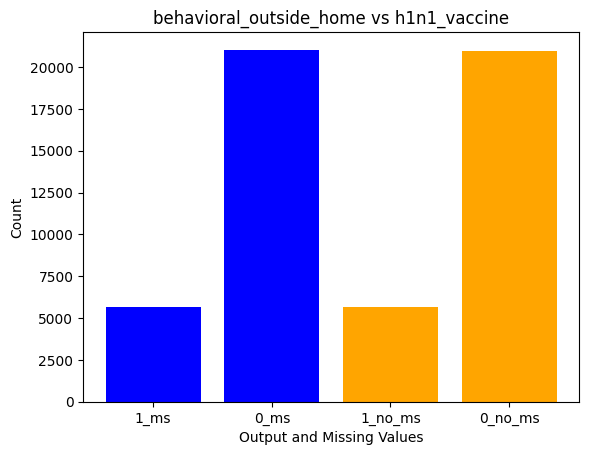

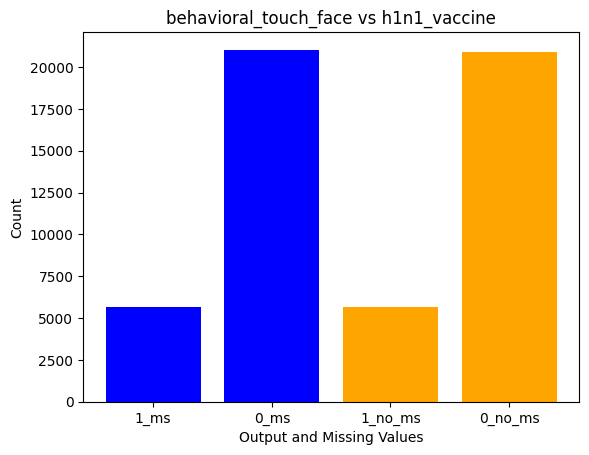

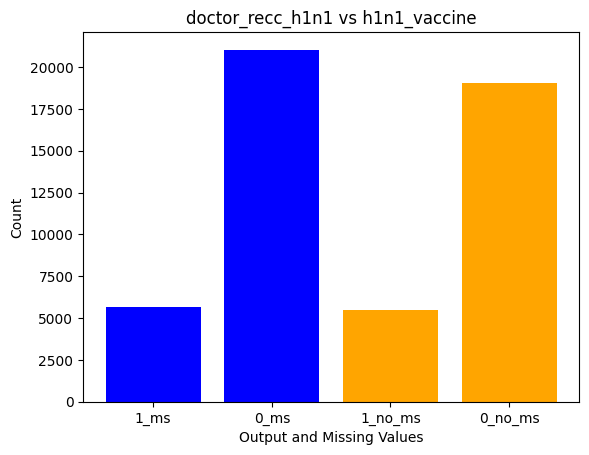

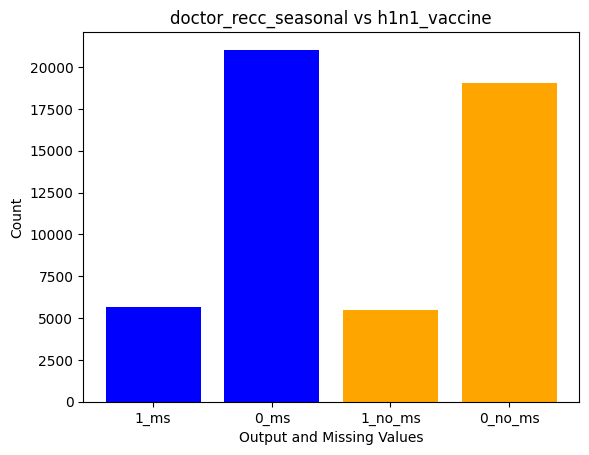

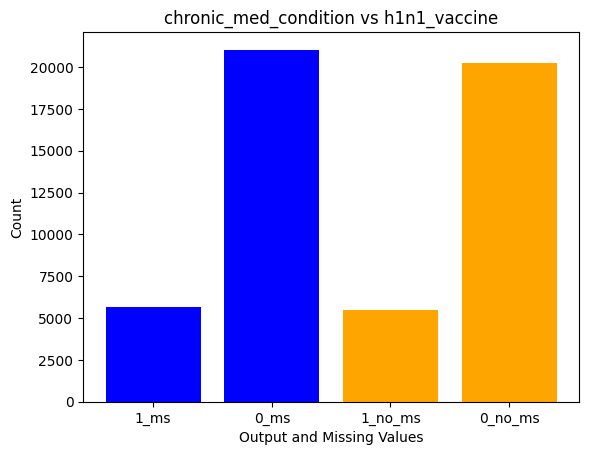

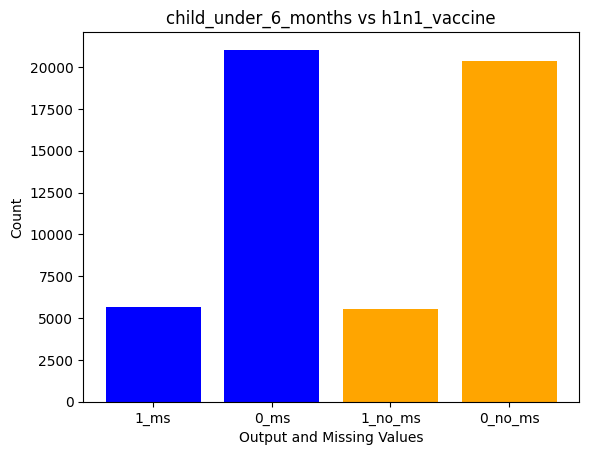

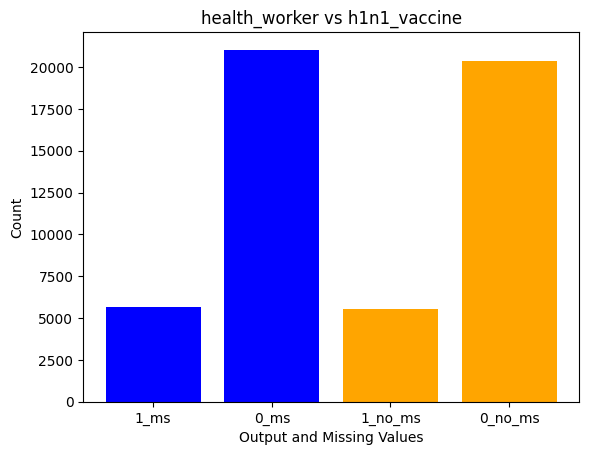

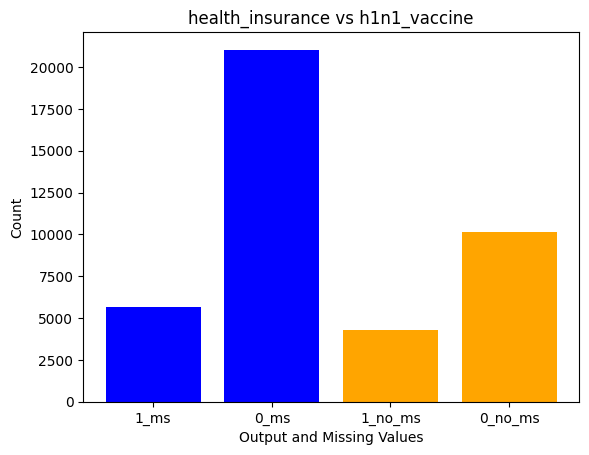

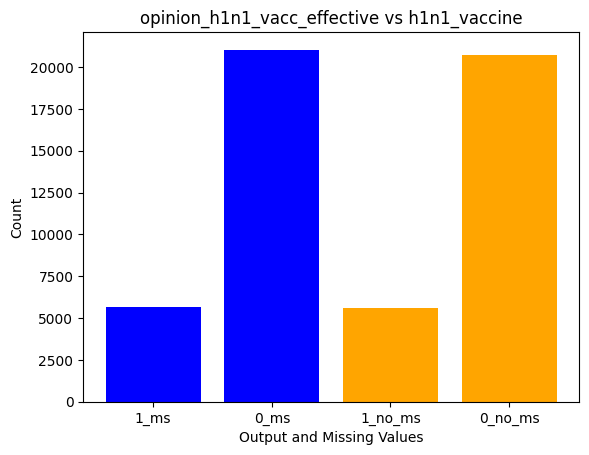

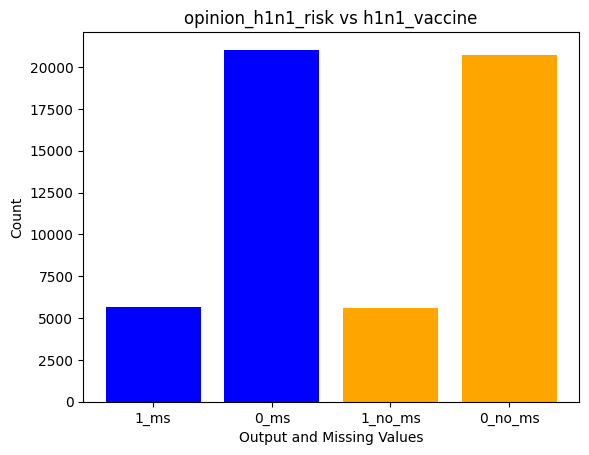

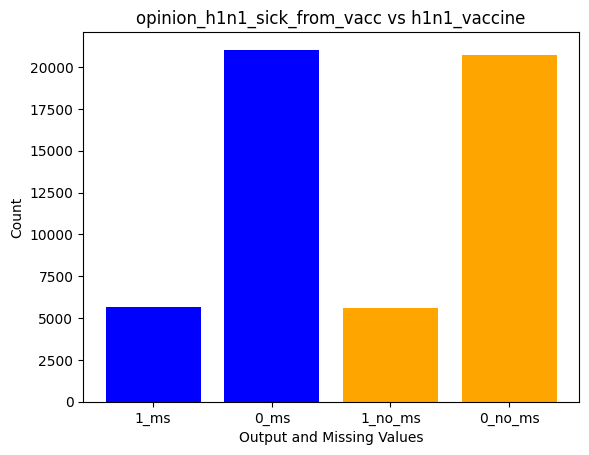

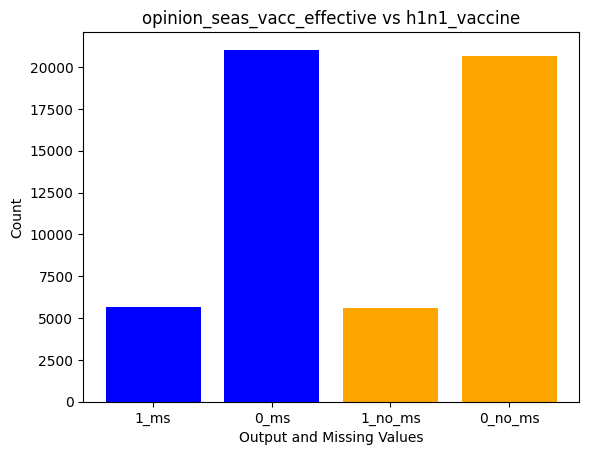

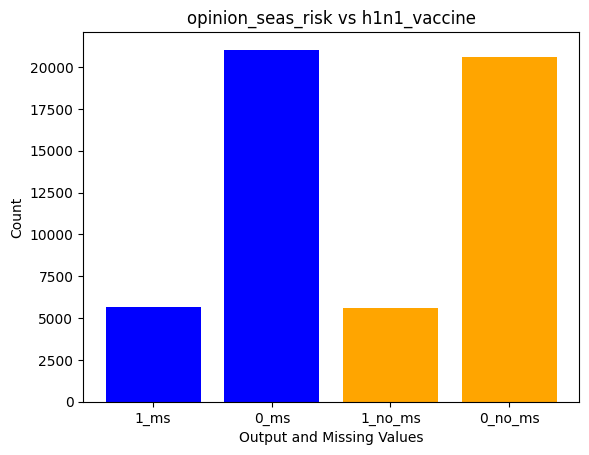

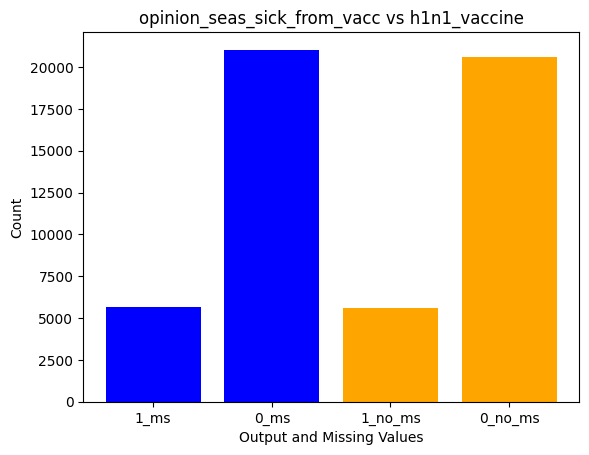

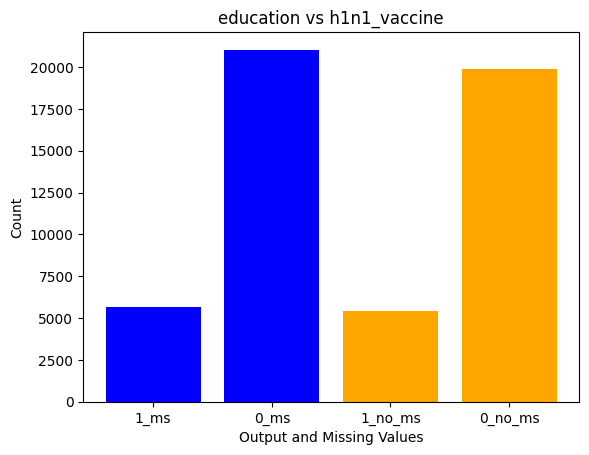

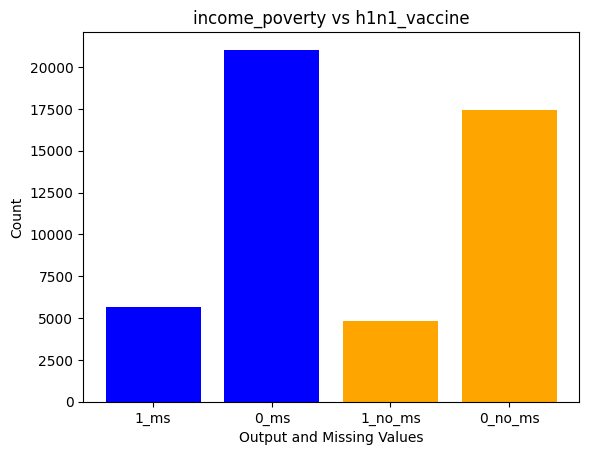

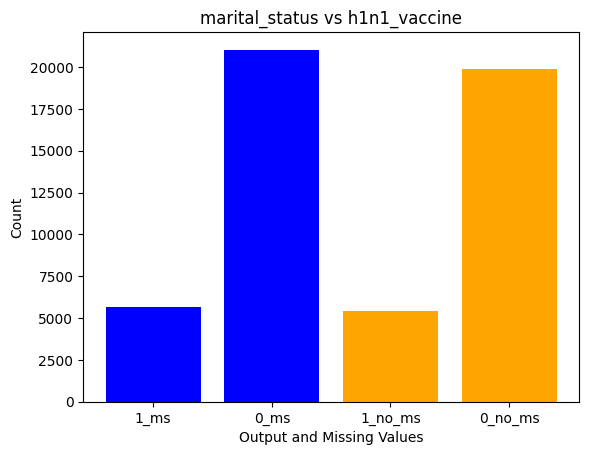

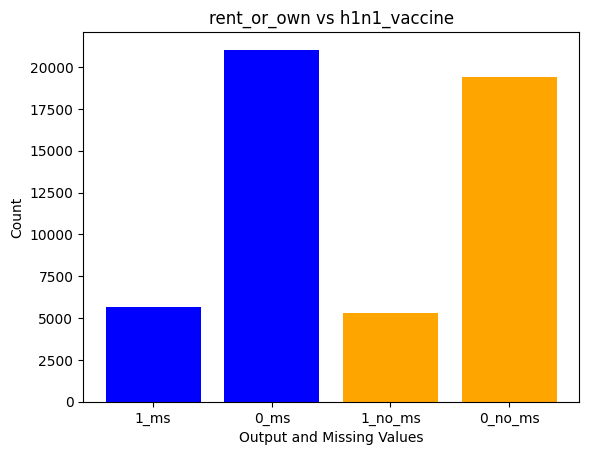

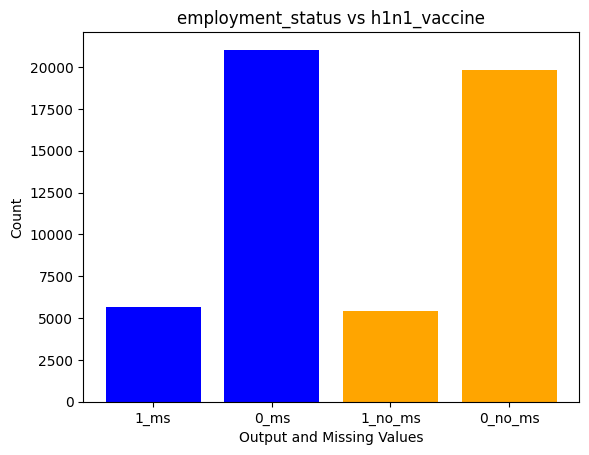

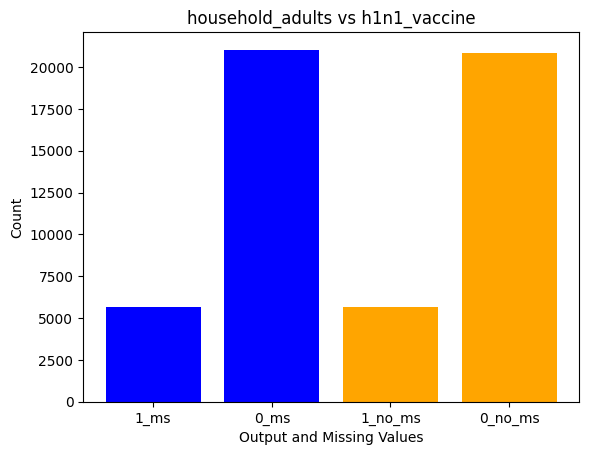

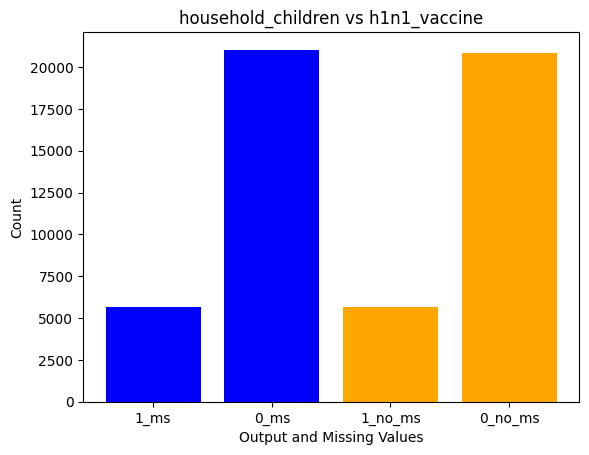

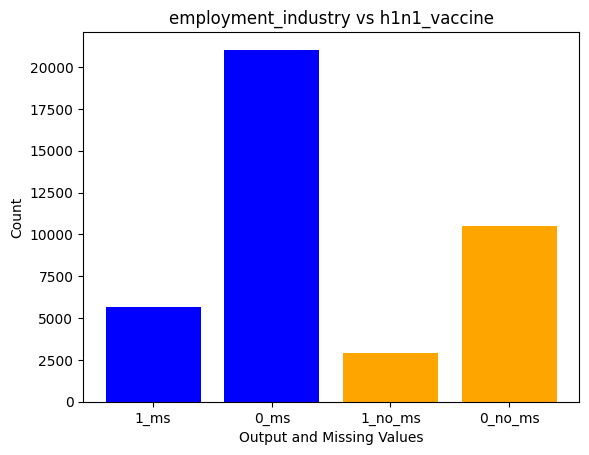

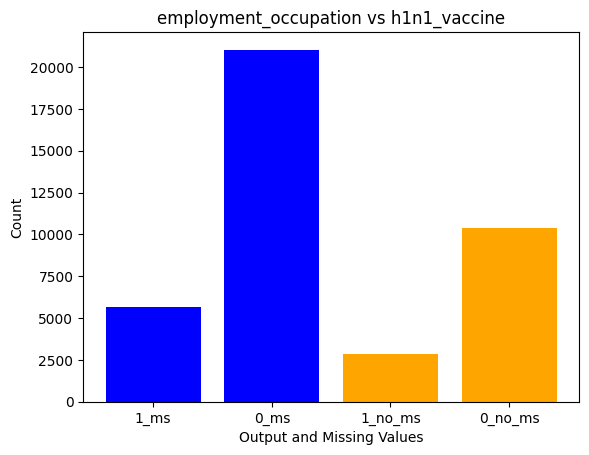

In [ ]:
# Comparasion data output containing and not containing null values at variabel 'h1n1_vaccine'

# List of all features containing null values
features_na = []
for feature in master_df.columns:
    if master_df[feature].isna().sum() > 1:
        features_na.append(feature)

for feature in features_na:
    df = master_df.copy()

    # Calculate sum of data without input missing values
    sum_output_with_missing = df['h1n1_vaccine'].value_counts()

    # Calculate sum of output 1 and 0 in data without missing values
    sum_output_no_missing = df.loc[~df[feature].isna(), 'h1n1_vaccine'].value_counts()

    # Plot the comparison
    plt.bar(['1_ms', '0_ms', '1_no_ms', '0_no_ms'], [sum_output_with_missing.get(1, 0), sum_output_with_missing.get(0, 0),
                                                    sum_output_no_missing.get(1, 0), sum_output_no_missing.get(0, 0)],
            color=['blue', 'blue', 'orange', 'orange'])
    plt.xlabel('Output and Missing Values')
    plt.ylabel("Count")
    plt.title(feature + " vs h1n1_vaccine")
    plt.show()


Secara keseluruhan untuk variabel target 'h1n1_vaccine' missing values tidak mempengaruhi perbandingan jumlah data output 1 dan 0. Tetapi di beberapa data terlihat perbedaan jelas antara output 0 pada data total denngan output 0 pada data tanpa missing values, seperti 'doctor_recc_seasonal', 'doctor_recc_h1n1', 'education', 'marital_status', dan 'rent_or_own'. Serta perbedaa terbesar antara output 1 dan 0 pada data total denngan output 1 dan 0 pada data tanpa missing values ada pada features 'health_insurance', 'income_poverty', 'employment_industry', 'employment_occupation'

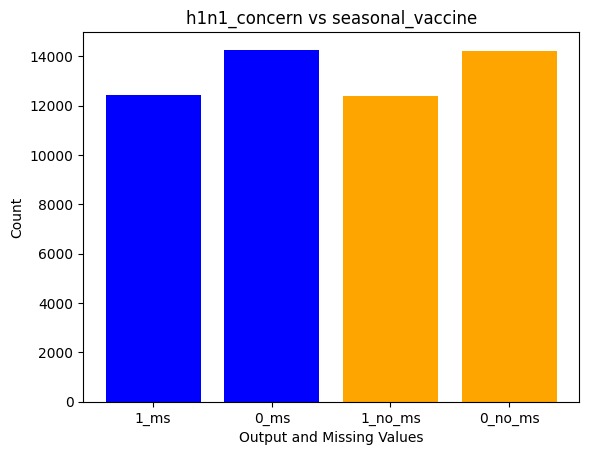

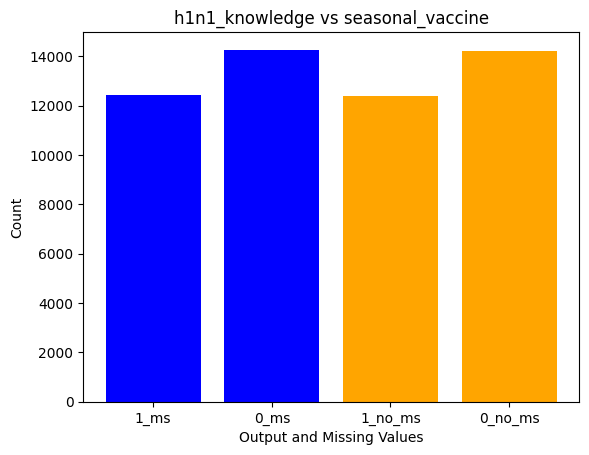

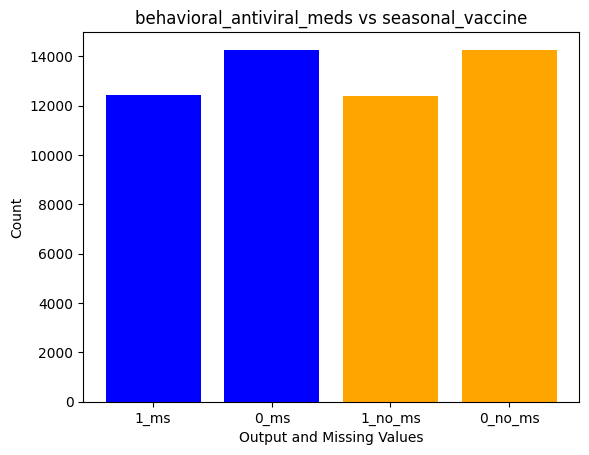

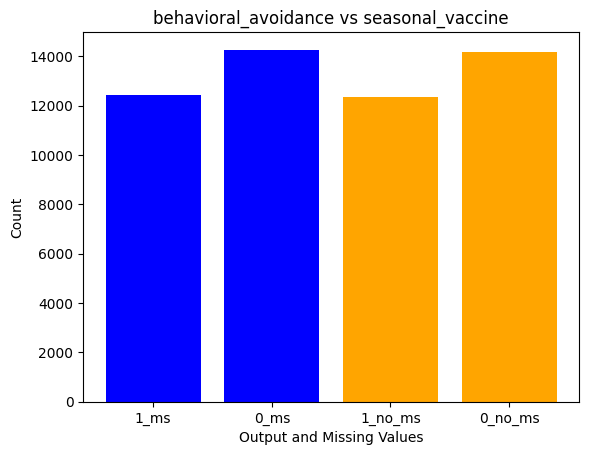

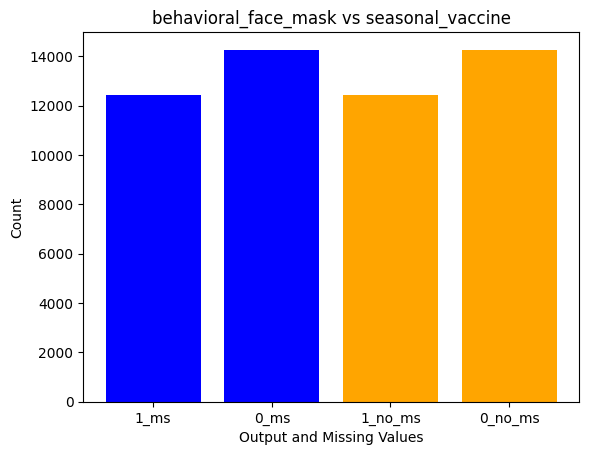

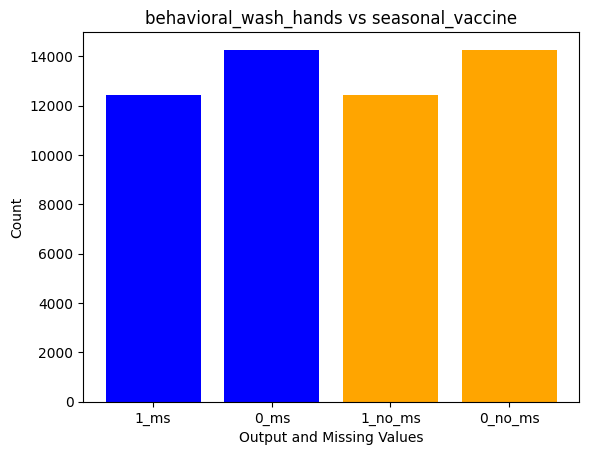

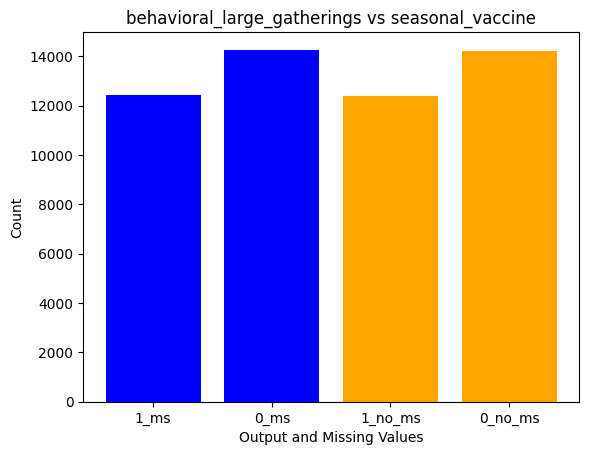

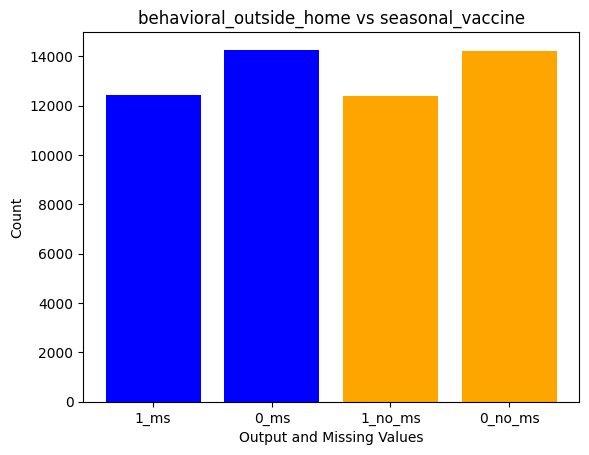

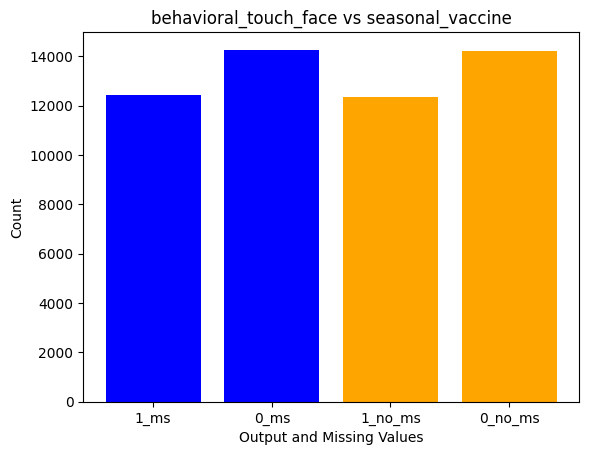

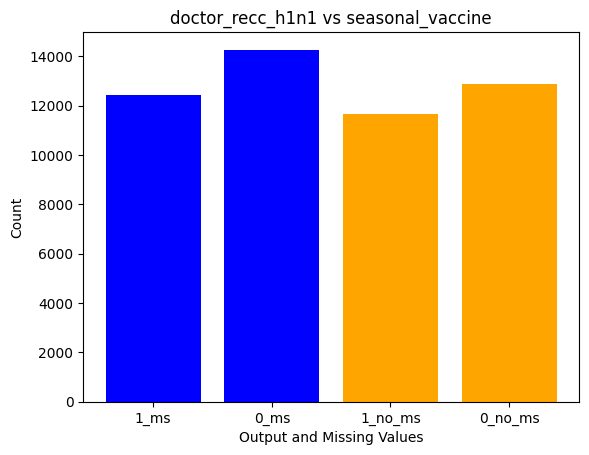

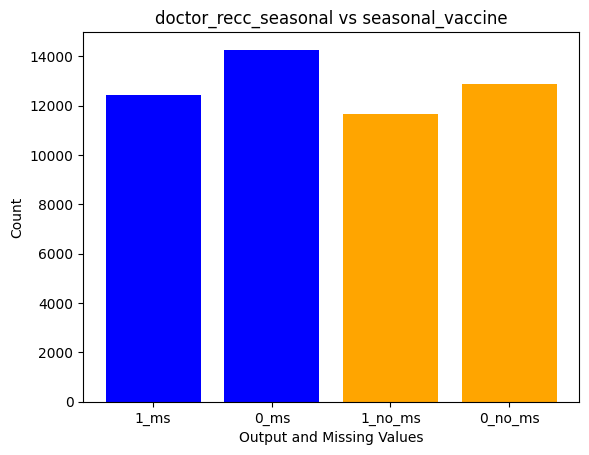

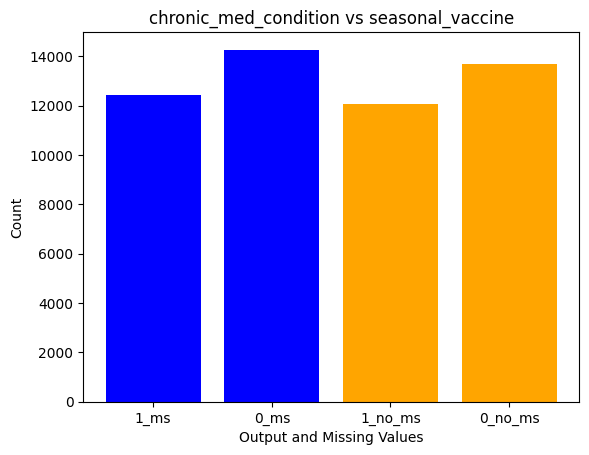

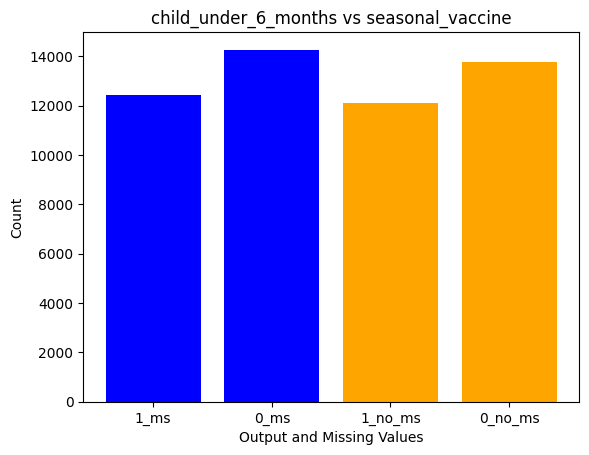

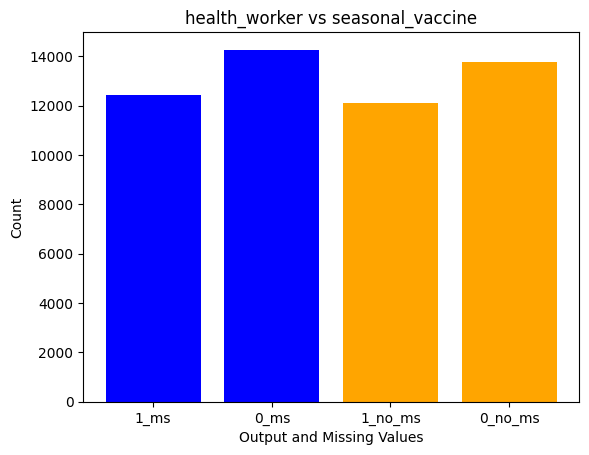

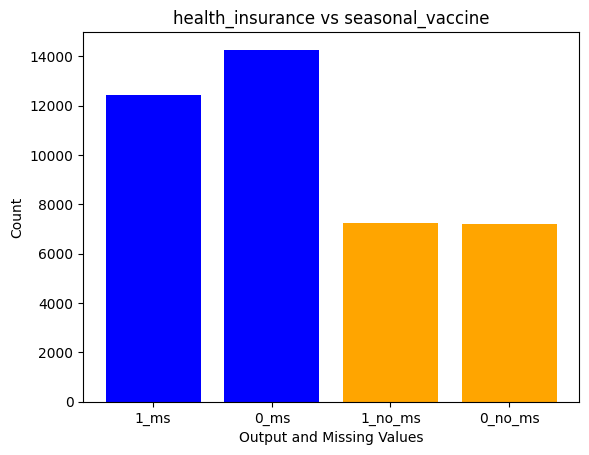

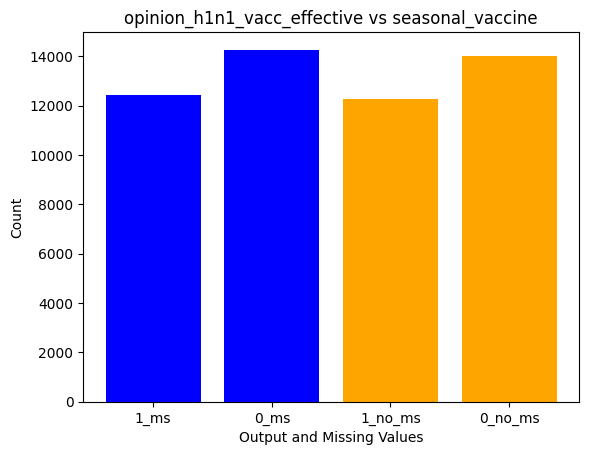

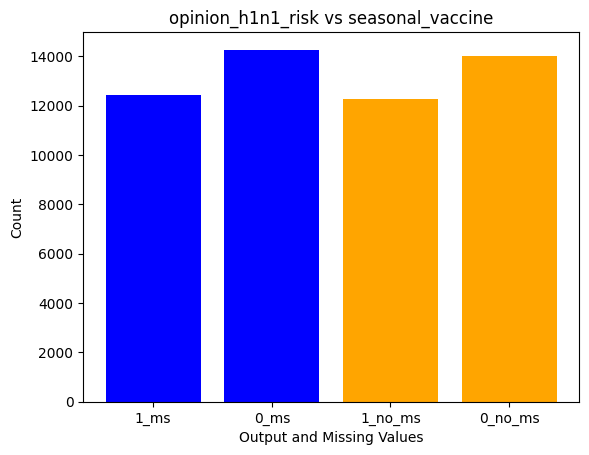

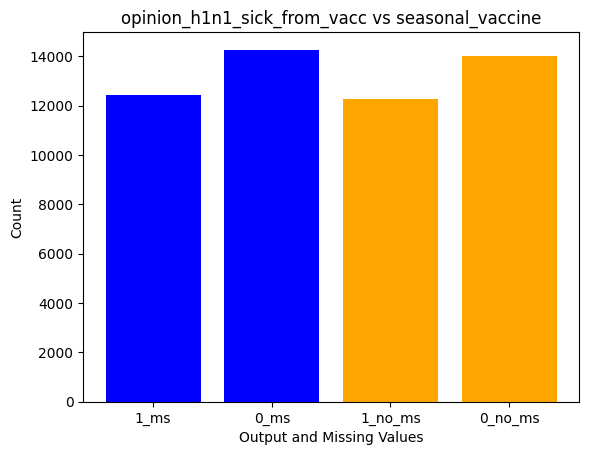

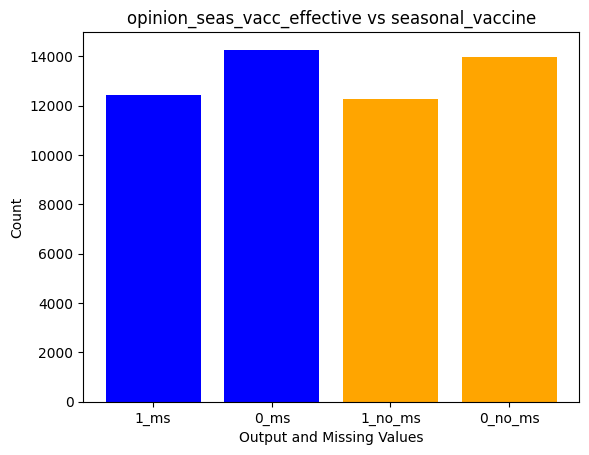

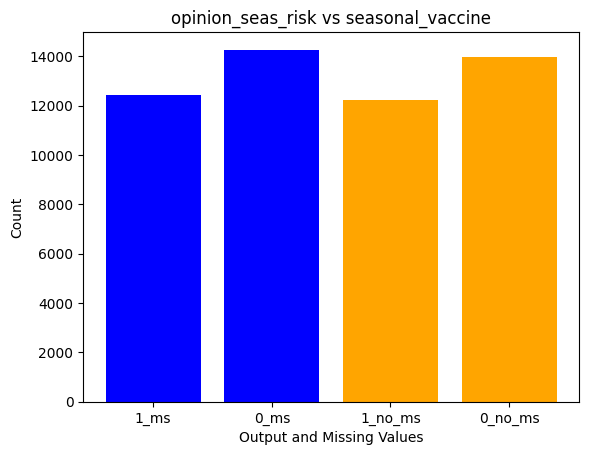

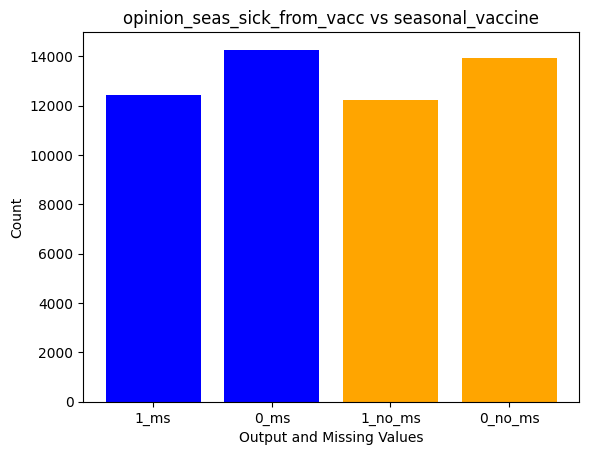

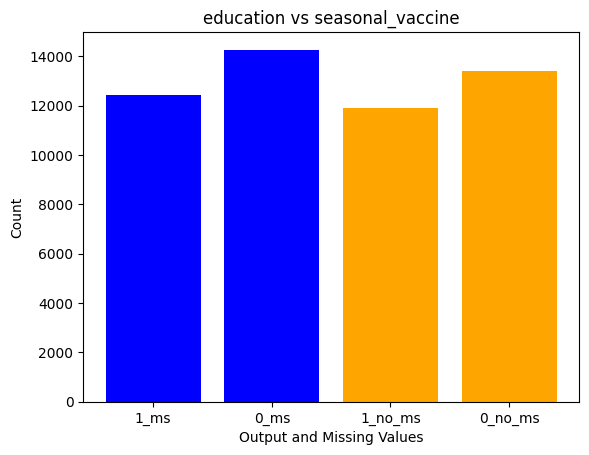

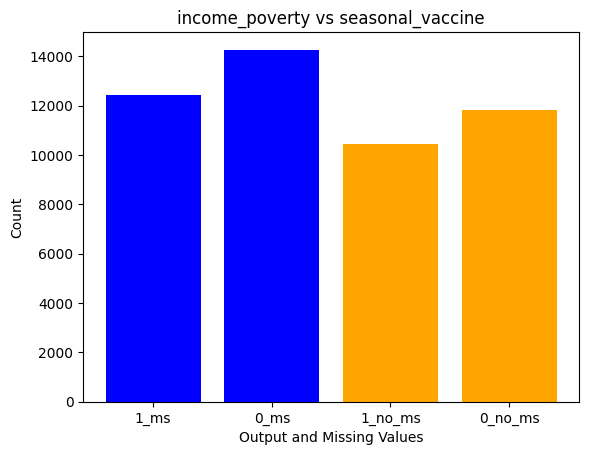

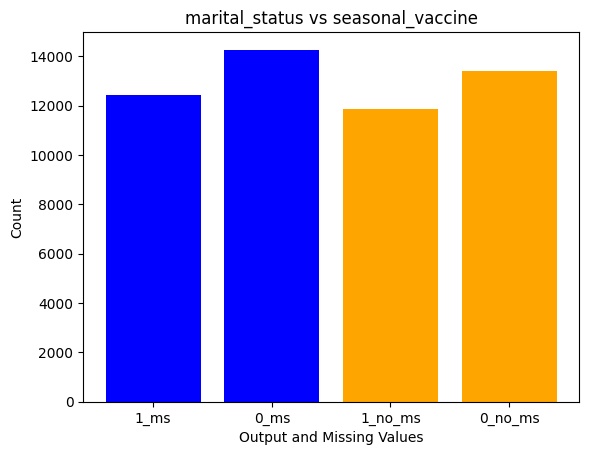

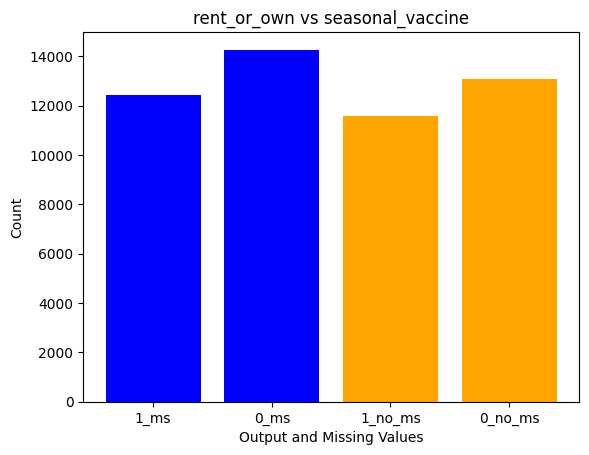

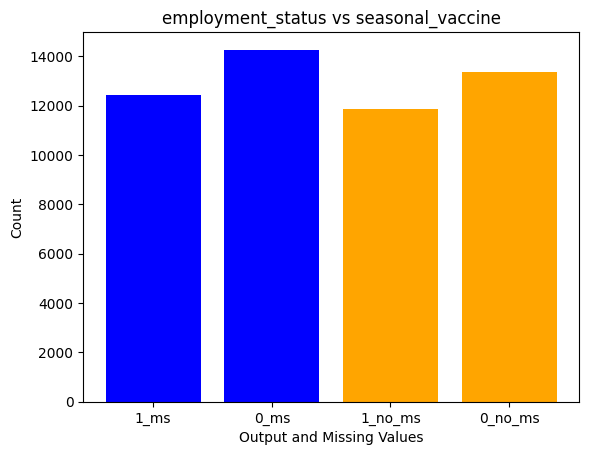

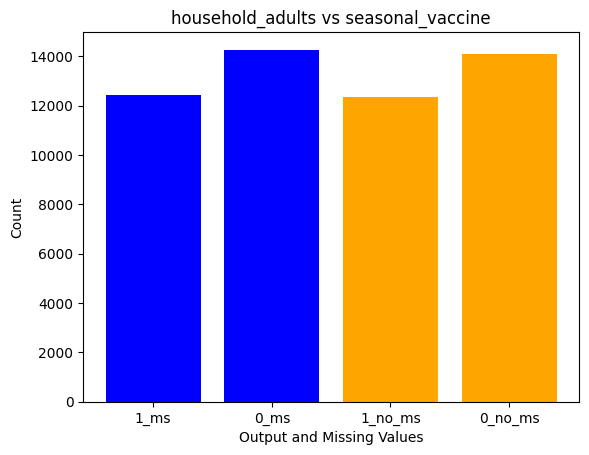

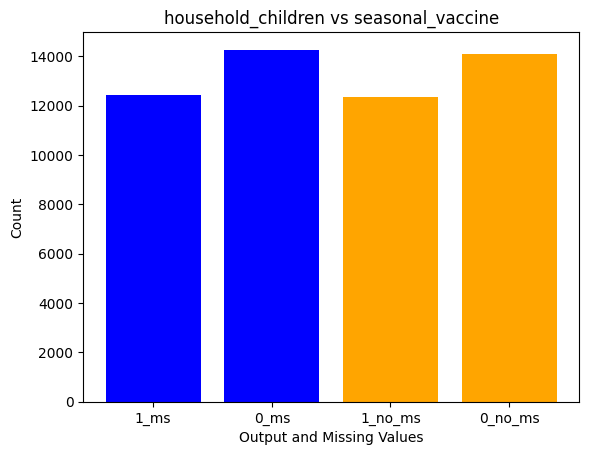

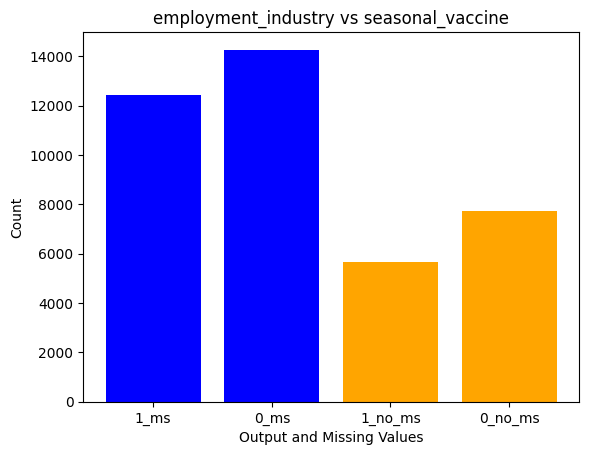

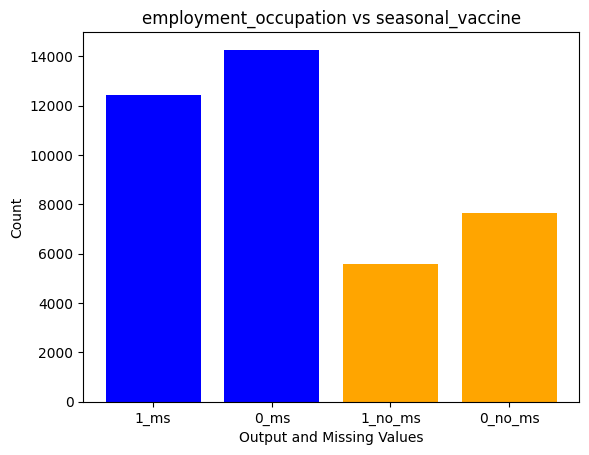

In [ ]:
# Comparasion data output containing and not containing null values at variabel 'seasonal_vaccine'

# List of all features containing null values
features_na = []
for feature in master_df.columns:
    if master_df[feature].isna().sum() > 1:
        features_na.append(feature)

for feature in features_na:
    df = master_df.copy()

    # Calculate sum of data without input missing values
    sum_output_with_missing = df['seasonal_vaccine'].value_counts()

    # Calculate sum of output 1 and 0 in data without missing values
    sum_output_no_missing = df.loc[~df[feature].isna(), 'seasonal_vaccine'].value_counts()

    # Plot the comparison
    plt.bar(['1_ms', '0_ms', '1_no_ms', '0_no_ms'], [sum_output_with_missing.get(1, 0), sum_output_with_missing.get(0, 0),
                                                    sum_output_no_missing.get(1, 0), sum_output_no_missing.get(0, 0)],
            color=['blue', 'blue', 'orange', 'orange'])
    plt.xlabel('Output and Missing Values')
    plt.ylabel("Count")
    plt.title(feature + " vs seasonal_vaccine")
    plt.show()


Sama seperti pada variabel target 'h1n1_vaccine', secara keseluruhan variabel target 'seasonal_vaccine' juga memiliki missing values yang mempengaruhi perbandingan jumlah data antara output 1 dan 0 pada data total dengan output 1 dan 0 pada data tanpa missing values, terutama pada pada features 'health_insurance', 'income_poverty', 'employment_industry', 'employment_occupation'. Maka dari relasi tersebut kita harus merubah NaN values menjadi sesuatu yang meaningful.

In [ ]:
# Remove respondent_id because it is irrelevant
master_df.drop(columns = 'respondent_id', inplace = True)

# Jumlah Data Setiap Kategori

1.   List item

> Indented block


2.   List item



In [ ]:
cek = master_df[['doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance','seasonal_vaccine','h1n1_vaccine']]
cek.doctor_recc_h1n1.fillna('empty', inplace=True)
cek.doctor_recc_seasonal.fillna('empty', inplace=True)
cek.chronic_med_condition.fillna('empty', inplace=True)
cek.child_under_6_months.fillna('empty', inplace=True)
cek.health_worker.fillna('empty', inplace=True)
cek.health_insurance.fillna('empty', inplace=True)

In [ ]:
cek.groupby(['doctor_recc_h1n1', 'h1n1_vaccine']).size().unstack()

h1n1_vaccine          0     1
doctor_recc_h1n1             
0.0               16529  2610
1.0                2529  2879
empty              1975   185

In [ ]:
cek.groupby(['doctor_recc_seasonal','seasonal_vaccine']).size().unstack()

seasonal_vaccine          0     1
doctor_recc_seasonal             
0.0                   10756  5697
1.0                    2117  5977
empty                  1399   761

In [ ]:
cek.groupby(['seasonal_vaccine','h1n1_vaccine','chronic_med_condition']).size().unstack()

chronic_med_condition            0.0   1.0  empty
seasonal_vaccine h1n1_vaccine                    
0                0             10117  2634    544
                 1               672   256     49
1                0              4845  2648    245
                 1              2812  1752    133

In [ ]:
cek.groupby(['seasonal_vaccine','h1n1_vaccine','child_under_6_months']).size().unstack()

child_under_6_months             0.0  1.0  empty
seasonal_vaccine h1n1_vaccine                   
0                0             11855  971    469
                 1               818  123     36
1                0              7019  515    204
                 1              4057  529    111

In [ ]:
cek.groupby(['seasonal_vaccine','h1n1_vaccine','health_worker']).size().unstack()

health_worker                    0.0   1.0  empty
seasonal_vaccine h1n1_vaccine                    
0                0             11930   904    461
                 1               823   119     35
1                0              6731   808    199
                 1              3520  1068    109

In [ ]:
cek.groupby(['seasonal_vaccine','h1n1_vaccine','health_insurance']).size().unstack()

health_insurance                0.0   1.0  empty
seasonal_vaccine h1n1_vaccine                   
0                0             1249  5278   6768
                 1               89   588    300
1                0              231  3385   4122
                 1              167  3446   1084

# Mengganti Data Missing Values

In [ ]:
# Nan: Diasumsikan lupa / tidak tahu berarti ada kemungkinan memilihnya tidak berdasarkan hasil rekomendasi
# sedemikian sehingga diasumsikan '0'
master_df.doctor_recc_h1n1.fillna(0, inplace=True)
master_df.doctor_recc_seasonal.fillna(0, inplace=True)
master_df.chronic_med_condition.fillna(0,inplace=True)

# Nan: Tidak tahu harus beropini apa
master_df.opinion_h1n1_risk.fillna(3, inplace=True)
master_df.opinion_h1n1_sick_from_vacc.fillna(3, inplace=True)
master_df.opinion_seas_risk.fillna(3, inplace=True)
master_df.opinion_h1n1_vacc_effective.fillna(3,inplace=True)
master_df.opinion_seas_sick_from_vacc.fillna(3,inplace=True)
master_df.opinion_seas_vacc_effective.fillna(3,inplace=True)

# Nan: Tidak menjawab karena beranggapan variabel ini bersifat privasi
master_df.income_poverty.fillna('privacy', inplace=True)
master_df.marital_status.fillna('privacy', inplace=True)
master_df.employment_industry.fillna('privacy',inplace=True)
master_df.employment_occupation.fillna('privacy', inplace=True)
master_df.employment_status.fillna('privacy', inplace=True)

In [ ]:
# Melihat modus dari setiap features
(master_df[['h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation']]).mode().transpose()

0
h1n1_concern                                      2.00
h1n1_knowledge                                    1.00
behavioral_antiviral_meds                         0.00
behavioral_avoidance                              1.00
behavioral_face_mask                              0.00
behavioral_wash_hands                             1.00
behavioral_large_gatherings                       0.00
behavioral_outside_home                           0.00
behavioral_touch_face                             1.00
doctor_recc_h1n1                                  0.00
doctor_recc_seasonal                              0.00
chronic_med_condition                             0.00
child_under_6_months                              0.00
health_worker                                     0.00
health_insurance                                  1.00
opinion_h1n1_vacc_effective                       4.00
opinion_h1n1_risk                                 2.00
opinion_h1n1_sick_from_vacc                       2.00
opinion_seas_vacc_effective                       4.00
opinion_seas_risk                                 2.00
opinion_seas_sick_from_vacc                       1.00
age_group                                    65+ Years
education                             College Graduate
race                                             White
sex                                             Female
income_poverty               <= $75,000, Above Poverty
marital_status                                 Married
rent_or_own                                        Own
employment_status                             Employed
hhs_geo_region                                lzgpxyit
census_msa                    MSA, Not Principle  City
household_adults                                  1.00
household_children                                0.00
employment_industry                            privacy
employment_occupation                          privacy

In [ ]:
# Missing values pada features yang tidak diasumsikan, diganti menjadi modus data
master_df = master_df.fillna(master_df.mode().iloc[0])
master_df

h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
0              1.00            0.00                       0.00   
1              3.00            2.00                       0.00   
2              1.00            1.00                       0.00   
3              1.00            1.00                       0.00   
4              2.00            1.00                       0.00   
...             ...             ...                        ...   
26702          2.00            0.00                       0.00   
26703          1.00            2.00                       0.00   
26704          2.00            2.00                       0.00   
26705          1.00            1.00                       0.00   
26706          0.00            0.00                       0.00   

       behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
0                      0.00                  0.00                   0.00   
1                      1.00                  0.00                   1.00   
2                      1.00                  0.00                   0.00   
3                      1.00                  0.00                   1.00   
4                      1.00                  0.00                   1.00   
...                     ...                   ...                    ...   
26702                  1.00                  0.00                   0.00   
26703                  1.00                  0.00                   1.00   
26704                  1.00                  1.00                   1.00   
26705                  0.00                  0.00                   0.00   
26706                  1.00                  0.00                   0.00   

       behavioral_large_gatherings  behavioral_outside_home  \
0                             0.00                     1.00   
1                             0.00                     1.00   
2                             0.00                     0.00   
3                             1.00                     0.00   
4                             1.00                     0.00   
...                            ...                      ...   
26702                         0.00                     1.00   
26703                         0.00                     0.00   
26704                         1.00                     0.00   
26705                         0.00                     0.00   
26706                         0.00                     0.00   

       behavioral_touch_face  doctor_recc_h1n1  ...  rent_or_own  \
0                       1.00              0.00  ...          Own   
1                       1.00              0.00  ...         Rent   
2                       0.00              0.00  ...          Own   
3                       0.00              0.00  ...         Rent   
4                       1.00              0.00  ...          Own   
...                      ...               ...  ...          ...   
26702                   0.00              0.00  ...          Own   
26703                   0.00              1.00  ...         Rent   
26704                   1.00              0.00  ...          Own   
26705                   1.00              0.00  ...         Rent   
26706                   0.00              0.00  ...          Own   

        employment_status  hhs_geo_region                census_msa  \
0      Not in Labor Force        oxchjgsf                   Non-MSA   
1                Employed        bhuqouqj  MSA, Not Principle  City   
2                Employed        qufhixun  MSA, Not Principle  City   
3      Not in Labor Force        lrircsnp       MSA, Principle City   
4                Employed        qufhixun  MSA, Not Principle  City   
...                   ...             ...                       ...   
26702  Not in Labor Force        qufhixun                   Non-MSA   
26703            Employed        lzgpxyit       MSA, Principle City   
26704             privacy        lzgpxyit  MSA, Not Principle  City   
26705            

<Axes: >

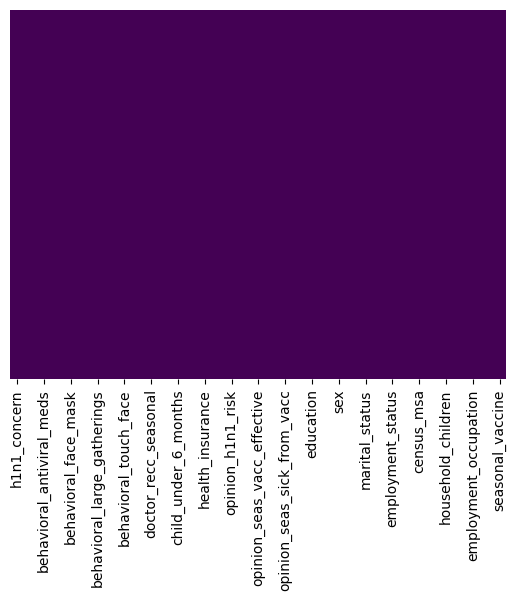

In [ ]:
# Plot missing values
sns.heatmap(master_df.isna(),yticklabels=False,cbar=False,cmap='viridis')

Berdasarkan heatmap diatas data sudah bersih dari missing values karena missing values sudah berhasil diubah berdasarkan asumsi dan modus data

# Labeling Input Data

In [ ]:
# Change type float to int
master_df = master_df.astype({"h1n1_concern":"int","h1n1_knowledge":"int","behavioral_antiviral_meds":"int","behavioral_avoidance":"int","behavioral_face_mask":"int",
                            "behavioral_wash_hands":"int","behavioral_large_gatherings":"int","behavioral_outside_home":"int","behavioral_touch_face":"int",
                            "doctor_recc_h1n1":"int","doctor_recc_seasonal":"int","chronic_med_condition":"int","child_under_6_months":"int","opinion_h1n1_vacc_effective":"int",
                            "opinion_h1n1_risk":"int","opinion_h1n1_sick_from_vacc":"int","opinion_seas_vacc_effective":"int","opinion_seas_risk":"int",
                            "opinion_seas_sick_from_vacc":"int","household_adults":"int","household_children":"int"
                            })

In [ ]:
# Label Encoder
from sklearn import preprocessing

# Loop over each column in the DataFrame where dtype is 'object'
for col in master_df.select_dtypes(include = ['object']).columns:
  # Initialize a LabelEncoder object
  label_encoder = preprocessing.LabelEncoder()
  # Fit the encoder to the unique values in the column
  label_encoder.fit(master_df[col].unique())
  # Transform the column using the encoder
  master_df[col] = label_encoder.transform(master_df[col])
  # Print the column name and the unique encoded values
  print(f"{col}: {master_df[col].unique()}")

age_group: [3 1 0 4 2]
education: [1 0 2 3]
race: [3 0 2 1]
sex: [0 1]
income_poverty: [2 0 1 3]
marital_status: [1 0 2]
rent_or_own: [0 1]
employment_status: [1 0 2 3]
hhs_geo_region: [8 1 9 5 0 6 3 7 2 4]
census_msa: [2 0 1]
employment_industry: [12 13 15 19 16 20  6 18 10  4 17  0  1  9 21 11  3  8  2  7  5 14]
employment_occupation: [12 20 22  5 19 21  1 14  9 10  7  0 17  2  6  4 23 11 15 16  8 18 13  3]


# Lazy Predictions

Lazy Predict merupakan library Python yang menyediakan cara sederhana dan efisien untuk membuat prediksi. Lazy Predict adalah tools yang dapat memperlihatkan akurasi dari berbagai model untuk mempermudah proyek pemodelan prediktif.

In [ ]:
X = master_df[['h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation']]
y = master_df['h1n1_vaccine']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.5,random_state =123)
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
models

100%|██████████| 29/29 [01:04<00:00,  2.21s/it]


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
NearestCentroid                    0.75               0.73     0.73      0.76   
QuadraticDiscriminantAnalysis      0.79               0.71     0.71      0.79   
GaussianNB                         0.77               0.71     0.71      0.78   
LGBMClassifier                     0.84               0.71     0.71      0.83   
LinearDiscriminantAnalysis         0.83               0.70     0.70      0.82   
BernoulliNB                        0.79               0.70     0.70      0.79   
XGBClassifier                      0.83               0.69     0.69      0.82   
AdaBoostClassifier                 0.83               0.69     0.69      0.82   
LogisticRegression                 0.83               0.68     0.68      0.82   
CalibratedClassifierCV             0.83               0.68     0.68      0.82   
LinearSVC                          0.83               0.67     0.67      0.81   
SVC                                0.83               0.67     0.67      0.81   
ExtraTreesClassifier               0.83               0.67     0.67      0.81   
RidgeClassifierCV                  0.83               0.67     0.67      0.81   
RidgeClassifier                    0.83               0.67     0.67      0.81   
RandomForestClassifier             0.83               0.67     0.67      0.81   
BaggingClassifier                  0.82               0.66     0.66      0.80   
DecisionTreeClassifier             0.75               0.65     0.65      0.76   
KNeighborsClassifier               0.81               0.64     0.64      0.79   
SGDClassifier                      0.82               0.64     0.64      0.79   
LabelSpreading                     0.76               0.63     0.63      0.75   
LabelPropagation                   0.75               0.63     0.63      0.75   
ExtraTreeClassifier                0.74               0.61     0.61      0.74   
PassiveAggressiveClassifier        0.77               0.59     0.59      0.75   
Perceptron                         0.75               0.57     0.57      0.73   
DummyClassifier                    0.79               0.50     0.50      0.69   

                               Time Taken  
Model                                      
NearestCentroid                      0.05  
QuadraticDiscriminantAnalysis        0.17  
GaussianNB                           0.04  
LGBMClassifier                       0.33  
LinearDiscriminantAnalysis           0.19  
BernoulliNB                          0.06  
XGBClassifier                        1.84  
AdaBoostClassifier                   0.57  
LogisticRegression                   0.07  
CalibratedClassifierCV               7.99  
LinearSVC                            2.05  
SVC                                 15.52  
ExtraTreesClassifier                 1.59  
RidgeClassifierCV                    0.40  
RidgeClassifier                      0.14  
RandomForestClassifier               5.21  
BaggingClassifier                    0.53  
DecisionTreeClassifier               0.13  
KNeighborsClassifier                 1.19  
SGDClassifier                        0.70  
LabelSpreading                      14.22  
LabelPropagation                    10.62  
ExtraTreeClassifier                  0.04  
PassiveAggressiveClassifier          0.13  
Perceptron                           0.12  
DummyClassifier                      0.03

Berdasarkan hasil prediksi di atas, model LGBMClassifier memperoleh akurasi tertinggi sebesar 0.84, lalu ada LogisticRegression, Random Forest, XGBClassifier dan lainnya yang memperoleh akurasi sebesar 0.83. Pada project ini kami akan mengembangkan model LogisticRegression, Random Forest, dan LGBMClassifier untuk melakukan klasifikasi.

In [ ]:
from lazypredict.Supervised import LazyClassifier

X = master_df[['h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation']]
y = master_df['seasonal_vaccine']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.5,random_state =123)
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
models

100%|██████████| 29/29 [01:20<00:00,  2.77s/it]


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LGBMClassifier                     0.78               0.78     0.78      0.78   
RandomForestClassifier             0.78               0.77     0.77      0.77   
LogisticRegression                 0.78               0.77     0.77      0.77   
CalibratedClassifierCV             0.77               0.77     0.77      0.77   
AdaBoostClassifier                 0.77               0.77     0.77      0.77   
LinearSVC                          0.77               0.77     0.77      0.77   
RidgeClassifier                    0.77               0.77     0.77      0.77   
RidgeClassifierCV                  0.77               0.77     0.77      0.77   
LinearDiscriminantAnalysis         0.77               0.77     0.77      0.77   
NuSVC                              0.77               0.77     0.77      0.77   
SVC                                0.77               0.77     0.77      0.77   
XGBClassifier                      0.76               0.76     0.76      0.76   
ExtraTreesClassifier               0.77               0.76     0.76      0.76   
SGDClassifier                      0.76               0.75     0.75      0.76   
NearestCentroid                    0.74               0.74     0.74      0.74   
BaggingClassifier                  0.74               0.74     0.74      0.74   
BernoulliNB                        0.74               0.74     0.74      0.74   
QuadraticDiscriminantAnalysis      0.73               0.73     0.73      0.73   
GaussianNB                         0.72               0.72     0.72      0.72   
KNeighborsClassifier               0.71               0.71     0.71      0.71   
PassiveAggressiveClassifier        0.70               0.70     0.70      0.70   
Perceptron                         0.70               0.69     0.69      0.69   
DecisionTreeClassifier             0.68               0.68     0.68      0.68   
ExtraTreeClassifier                0.67               0.66     0.66      0.67   
LabelSpreading                     0.66               0.66     0.66      0.66   
LabelPropagation                   0.66               0.66     0.66      0.66   
DummyClassifier                    0.53               0.50     0.50      0.37   

                               Time Taken  
Model                                      
LGBMClassifier                       0.32  
RandomForestClassifier               1.54  
LogisticRegression                   0.14  
CalibratedClassifierCV               9.91  
AdaBoostClassifier                   0.58  
LinearSVC                            2.71  
RidgeClassifier                      0.05  
RidgeClassifierCV                    0.12  
LinearDiscriminantAnalysis           0.14  
NuSVC                               18.14  
SVC                                 14.31  
XGBClassifier                        3.26  
ExtraTreesClassifier                 1.76  
SGDClassifier                        0.17  
NearestCentroid                      0.11  
BaggingClassifier                    0.55  
BernoulliNB                          0.06  
QuadraticDiscriminantAnalysis        0.09  
GaussianNB                           0.04  
KNeighborsClassifier                 1.14  
PassiveAggressiveClassifier          0.06  
Perceptron                           0.07  
DecisionTreeClassifier               0.13  
ExtraTreeClassifier                  0.06  
LabelSpreading                      14.24  
LabelPropagation                    10.57  
DummyClassifier                      0.03

Berdasarkan hasil prediksi di atas, model LGBMClassifier, LogisticRegression, dan Random Forest memperoleh akurasi tertinggi sebesar 0.78. Pada project ini kami akan mengembangkan model LogisticRegression, Random Forest, dan LGBMClassifier untuk melakukan klasifikasi.

# **Exploratory Data Analysis**



In [ ]:
import warnings
warnings.filterwarnings("ignore")

# get list of categorical variables
categoric = ['h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation']

In [ ]:
# The number of index
master_df[['h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'census_msa',
       'household_adults', 'household_children']].apply(pd.Series.value_counts)

h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
0.00       3296.00         2506.00                   25406.00   
1.00       8153.00        14714.00                    1301.00   
2.00      10667.00         9487.00                        NaN   
3.00       4591.00             NaN                        NaN   
4.00           NaN             NaN                        NaN   
5.00           NaN             NaN                        NaN   

      behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
0.00               7271.00              24866.00                4650.00   
1.00              19436.00               1841.00               22057.00   
2.00                   NaN                   NaN                    NaN   
3.00                   NaN                   NaN                    NaN   
4.00                   NaN                   NaN                    NaN   
5.00                   NaN                   NaN                    NaN   

      behavioral_large_gatherings  behavioral_outside_home  \
0.00                     17160.00                 17726.00   
1.00                      9547.00                  8981.00   
2.00                          NaN                      NaN   
3.00                          NaN                      NaN   
4.00                          NaN                      NaN   
5.00                          NaN                      NaN   

      behavioral_touch_face  doctor_recc_h1n1  ...  education     race  \
0.00                8578.00          21299.00  ...    5797.00  2118.00   
1.00               18129.00           5408.00  ...    2363.00  1755.00   
2.00                    NaN               NaN  ...   11504.00  1612.00   
3.00                    NaN               NaN  ...    7043.00 21222.00   
4.00                    NaN               NaN  ...        NaN      NaN   
5.00                    NaN               NaN  ...        NaN      NaN   

          sex  income_poverty  marital_status  rent_or_own  employment_status  \
0.00 15858.00        12777.00        13555.00     20778.00           13560.00   
1.00 10849.00         6810.00        11744.00      5929.00           10231.00   
2.00      NaN         2697.00         1408.00          NaN            1453.00   
3.00      NaN         4423.00             NaN          NaN            1463.00   
4.00      NaN             NaN             NaN          NaN                NaN   
5.00      NaN             NaN             NaN          NaN                NaN   

      census_msa  household_adults  household_children  
0.00    11645.00           8056.00            18921.00  
1.00     7864.00          14723.00             3175.00  
2.00     7198.00           2803.00             2864.00  
3.00         NaN           1125.00             1747.00  
4.00         NaN               NaN                 NaN  
5.00         NaN               NaN                 NaN  

[6 rows x 32 columns]

Dari data di atas kita dapat melihat secara numerik jumlah spesifik opsi yang dipilih responden. Kita dapat melihat modus dari setiap features, seperti sebanyak 10667 responden cukup khawatir terhadap penularan flu H1N1, sebanyak 14714 memiliki sedikit pengetahuan tentang flu H1N1, dan sebagainya.

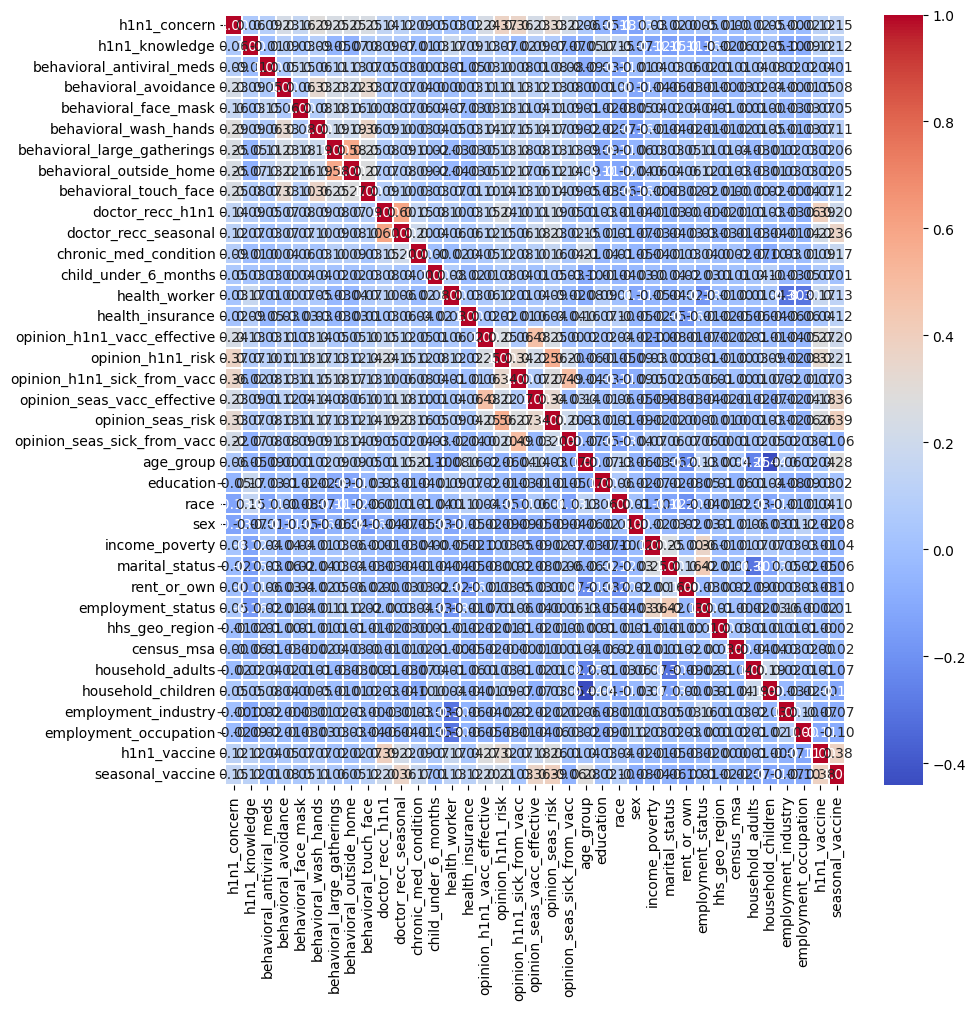

In [ ]:
# Uji korelasi atribut
f, ax = plt.subplots(figsize=(10, 10))
corr = master_df.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm", fmt='.2f', linewidths=.05)

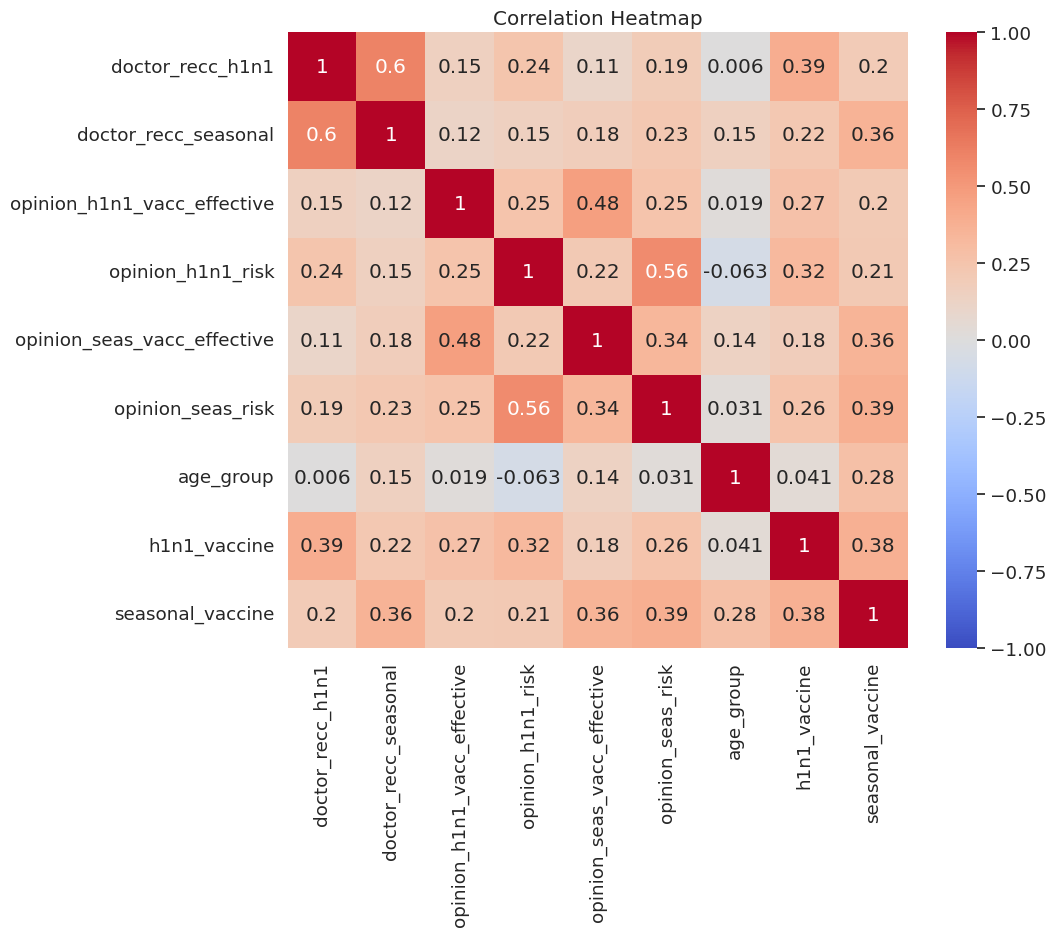

In [ ]:
# compute the correlation matrix for all features with both target variables
corr_matrix = master_df.corr()

# extract only the features that have a correlation greater than 0.2 with either target variable
relevant_features = corr_matrix[(abs(corr_matrix['h1n1_vaccine']) > 0.2) | (abs(corr_matrix['seasonal_vaccine']) > 0.2)].index.tolist()

# filter the correlation matrix to only include relevant features
corr_matrix = corr_matrix.loc[relevant_features, relevant_features]

# plot the correlation matrix as a heatmap
sns.set(font_scale=1.2)
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

Berdasarkan korelasi matriks, bisa didapatkan bahwa :


1.   Dengan nilai koefisien korelasi 0.6, terdapat korelasi yang kuat antara rekomendasi dokter pada vaksin H1N1 dan rekomendasi dokter pada vaksin flu seasonal.
2.   Dengan nilai koefisien korelasi 0.56, terdapat korelasi sedang antara opini responden terhadap resiko vaksin H1N1 dan opini responden terhadap resiko vaksin flu seasonal.
3.   Dengan nilai koefisien korelasi 0.48, terdapat korelasi sedang antara opini responden terhadap keefektifan vaksin H1N1 dan opini responden terhadap keefektifan vaksin flu seasonal.
4.   Terdapat korelasi antara sudahkah responden mendapatkan vaksinasi H1N1 dengan rekomendasi dokter pada vaksin H1N1, opini responden terhadap keefektifan vaksin H1N1, opini responden terhadap resiko flu H1N1, dan sudahkan responden mendapatkan vaksinasi seasonal flu.
5.   Terdapat korelasi antara sudahkah responden mendapatkan vaksinasi flu seasonal dengan rekomendasi dokter pada vaksin seasonal, opini responden terhadap keefektifan vaksin flu seasonal, opini responden terhadap resiko flu seasonal, kelompok usia, dan sudahkan responden mendapatkan vaksinasi H1N1.







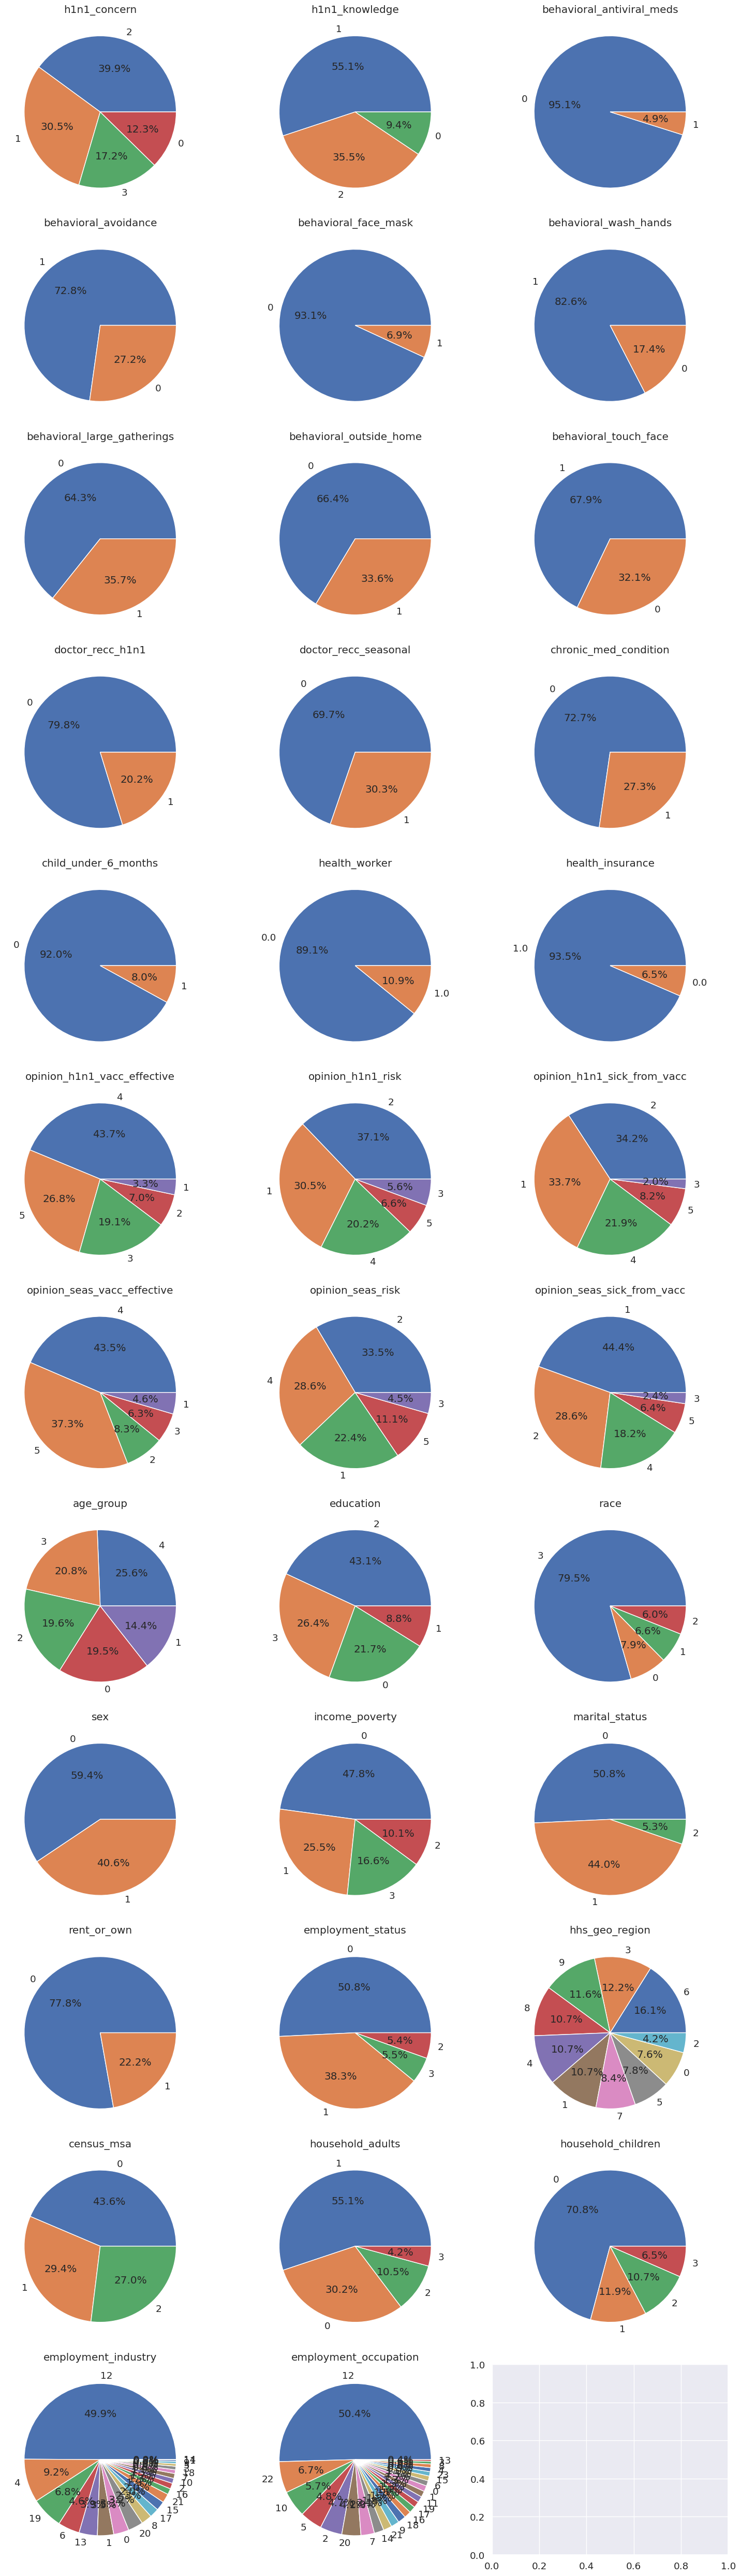

In [ ]:
# create figure with subplots
fig, axs = plt.subplots(nrows = 12, ncols = 3, figsize = (15,50))
axs = axs.flatten()

# create Pie Chart for each categorical variable
for i, var in enumerate(categoric):
  counts = master_df[var].value_counts()
  labels = counts.index.tolist()
  values = counts.values.tolist()
  axs[i].pie(values, labels=labels, autopct='%1.1f%%')
  axs[i].set_title(var)

# adjust spacing between subplots
fig.tight_layout()

# show plot
plt.show()

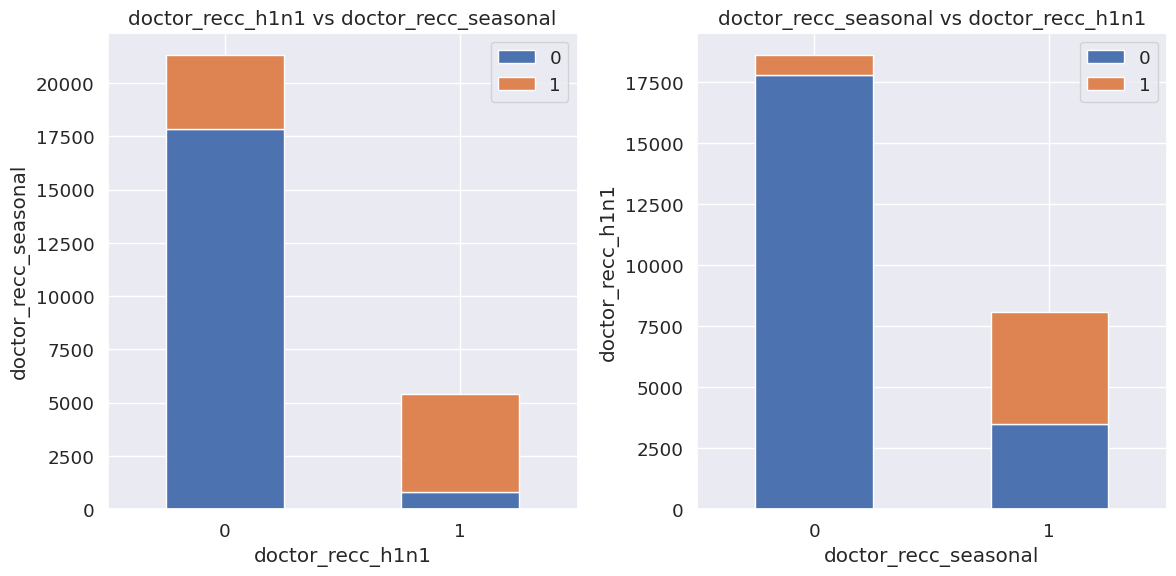

In [ ]:
# Create figure and axes
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot for 'doctor_recc_h1n1' and 'doctor_recc_seasonal'
df_plot_h1n1 = master_df.groupby(['doctor_recc_seasonal', 'doctor_recc_h1n1']).size().reset_index().pivot(columns='doctor_recc_seasonal', index='doctor_recc_h1n1', values=0)
ax_h1n1 = df_plot_h1n1.plot(kind='bar', stacked=True, ax=axes[0])
ax_h1n1.set_title('doctor_recc_h1n1 vs doctor_recc_seasonal')
ax_h1n1.set_xlabel('doctor_recc_h1n1')
ax_h1n1.set_ylabel('doctor_recc_seasonal')
ax_h1n1.legend(loc='upper right')
ax_h1n1.set_xticklabels([0, 1], rotation=0)

# Plot for 'doctor_recc_seasonal'
df_plot_seas = master_df.groupby(['doctor_recc_h1n1', 'doctor_recc_seasonal']).size().reset_index().pivot(columns='doctor_recc_h1n1', index='doctor_recc_seasonal', values=0)
ax_seas = df_plot_seas.plot(kind='bar', stacked=True, ax=axes[1])
ax_seas.set_title('doctor_recc_seasonal vs doctor_recc_h1n1')
ax_seas.set_xlabel('doctor_recc_seasonal')
ax_seas.set_ylabel('doctor_recc_h1n1')
ax_seas.legend(loc='upper right')
ax_seas.set_xticklabels([0, 1], rotation=0)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

Lebih dari 2500 responden yang direkomendasikan vaksin flu seasonal, tidak direkomendasikan vaksin H1N1 oleh dokter. Terdapat 5000 responden yang direkomendasikan vaksin vaksin flu seasonal juga direkomendasikan vaksin H1N1 oleh dokter.

Kurang dari 2500 responden yang direkomendasikan vaksin H1N1, tidak direkomendasikan vaksin flu seasonal oleh dokter. Terdapat 17500 responden yang tidak direkomendasikan vaksin H1N1 juga tidak direkomendasikan vaksin flu seasonal oleh dokter.

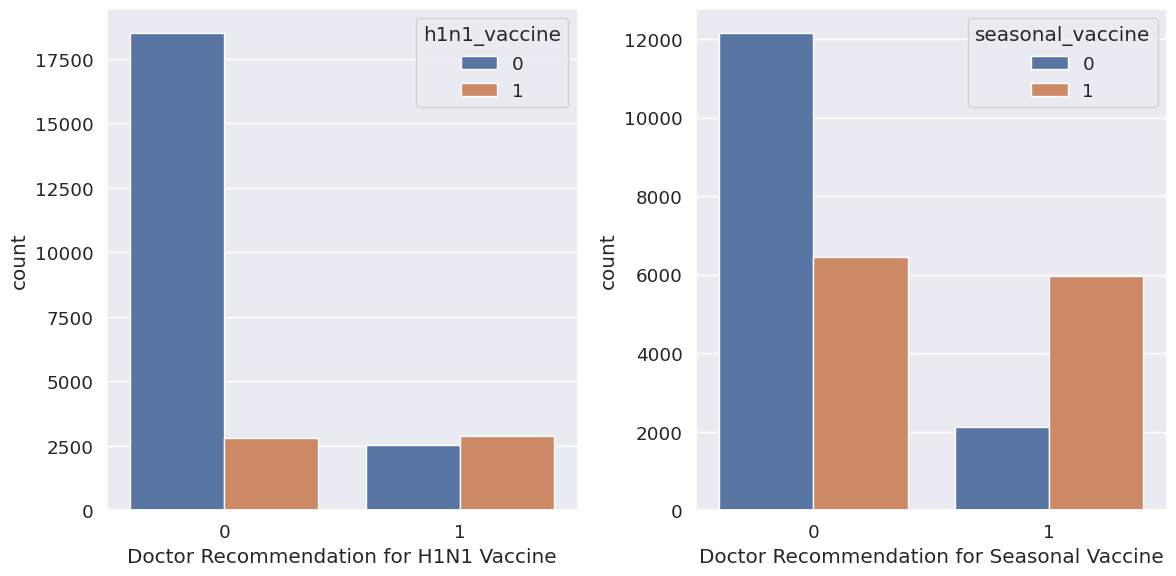

In [ ]:
# Create figure with subplots
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Create countplot for doctor_recc_h1n1 and h1n1_vaccine
sns.countplot(x='doctor_recc_h1n1', hue='h1n1_vaccine', data=master_df, ax=axs[0])
axs[0].set_xlabel('Doctor Recommendation for H1N1 Vaccine')

# Create countplot for doctor_recc_seasonal and seasonal_vaccine
sns.countplot(x='doctor_recc_seasonal', hue='seasonal_vaccine', data=master_df, ax=axs[1])
axs[1].set_xlabel('Doctor Recommendation for Seasonal Vaccine')

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()

Sebanyak lebih dari 17500 responden tidak melakukan vaksinasi H1N1 karena tidak mendapatkan rekomendasi dari dokter. Begitu juga untuk flue seasonal, sebanyak lebih dari 12000 responden tidak melakukan vaksinasi flue seasonal karena tidak mendapatkan rekomendasi dari dokter. Sehingga rekomendasi dokter cukup mempengaruhi status vaksinasi responden.

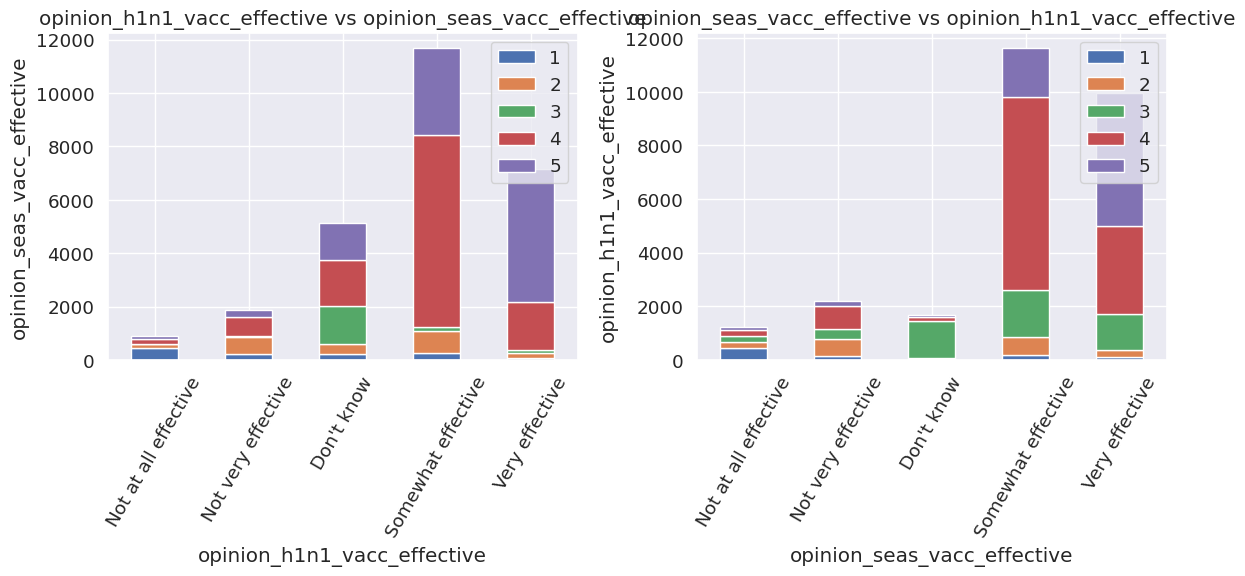

In [ ]:
# Create figure and axes
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot for 'opinion_h1n1_vacc_effective' and 'opinion_seas_vacc_effective'
df_plot_h1n1 = master_df.groupby(['opinion_seas_vacc_effective', 'opinion_h1n1_vacc_effective']).size().reset_index().pivot(columns='opinion_seas_vacc_effective', index='opinion_h1n1_vacc_effective', values=0)
ax_h1n1 = df_plot_h1n1.plot(kind='bar', stacked=True, ax=axes[0])
ax_h1n1.set_title('opinion_h1n1_vacc_effective vs opinion_seas_vacc_effective')
ax_h1n1.set_xlabel('opinion_h1n1_vacc_effective')
ax_h1n1.set_ylabel('opinion_seas_vacc_effective')
ax_h1n1.legend(loc='upper right')
ax_h1n1.set_xticklabels(["Not at all effective", "Not very effective", "Don't know", "Somewhat effective", "Very effective"], rotation=60)

# Plot for 'opinion_seas_vacc_effective'
df_plot_seas = master_df.groupby(['opinion_h1n1_vacc_effective', 'opinion_seas_vacc_effective']).size().reset_index().pivot(columns='opinion_h1n1_vacc_effective', index='opinion_seas_vacc_effective', values=0)
ax_seas = df_plot_seas.plot(kind='bar', stacked=True, ax=axes[1])
ax_seas.set_title('opinion_seas_vacc_effective vs opinion_h1n1_vacc_effective')
ax_seas.set_xlabel('opinion_seas_vacc_effective')
ax_seas.set_ylabel('opinion_h1n1_vacc_effective')
ax_seas.legend(loc='upper right')
ax_seas.set_xticklabels(["Not at all effective", "Not very effective", "Don't know", "Somewhat effective", "Very effective"], rotation=60)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

Dari diagram stack di atas, dapat dilihat terdapat pola yang mirip terkait pendapat seseorang mengenai keefektifan vaksin seasonal dan vaksin h1n1 dengan pendapat tertinggi sangat efektif untuk kedua variabel

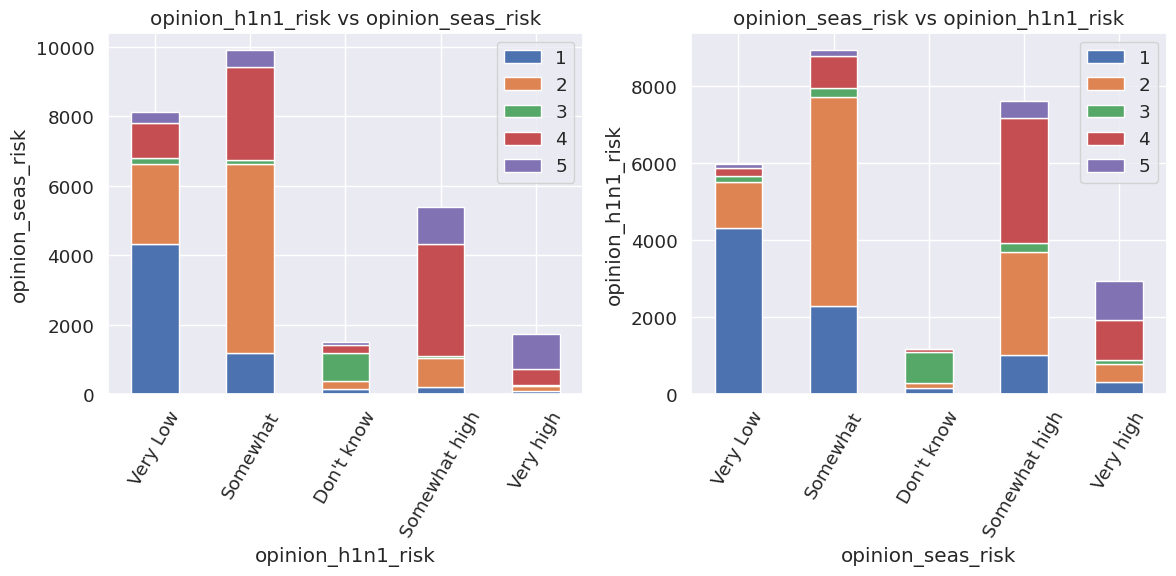

In [ ]:
# Create figure and axes
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot for 'opinion_h1n1_risk' and 'opinion_seas_risk'
df_plot_h1n1 = master_df.groupby(['opinion_seas_risk', 'opinion_h1n1_risk']).size().reset_index().pivot(columns='opinion_seas_risk', index='opinion_h1n1_risk', values=0)
ax_h1n1 = df_plot_h1n1.plot(kind='bar', stacked=True, ax=axes[0])
ax_h1n1.set_title('opinion_h1n1_risk vs opinion_seas_risk')
ax_h1n1.set_xlabel('opinion_h1n1_risk')
ax_h1n1.set_ylabel('opinion_seas_risk')
ax_h1n1.legend(loc='upper right')
ax_h1n1.set_xticklabels(["Very Low", "Somewhat", "Don't know", "Somewhat high", "Very high"], rotation=60)

# Plot for 'opinion_seas_risk'
df_plot_seas = master_df.groupby(['opinion_h1n1_risk', 'opinion_seas_risk']).size().reset_index().pivot(columns='opinion_h1n1_risk', index='opinion_seas_risk', values=0)
ax_seas = df_plot_seas.plot(kind='bar', stacked=True, ax=axes[1])
ax_seas.set_title('opinion_seas_risk vs opinion_h1n1_risk')
ax_seas.set_xlabel('opinion_seas_risk')
ax_seas.set_ylabel('opinion_h1n1_risk')
ax_seas.legend(loc='upper right')
ax_seas.set_xticklabels(["Very Low", "Somewhat", "Don't know", "Somewhat high", "Very high"], rotation=60)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

Dari diagram stack di atas, dapat dilihat terdapat pola yang mirip terkait pendapat seseorang mengenai risiko vaksin seasonal dan vaksin h1n1 dengan pendapat tertinggi kurang berisiko untuk kedua variabel

# Plot H1N1 Vaccine

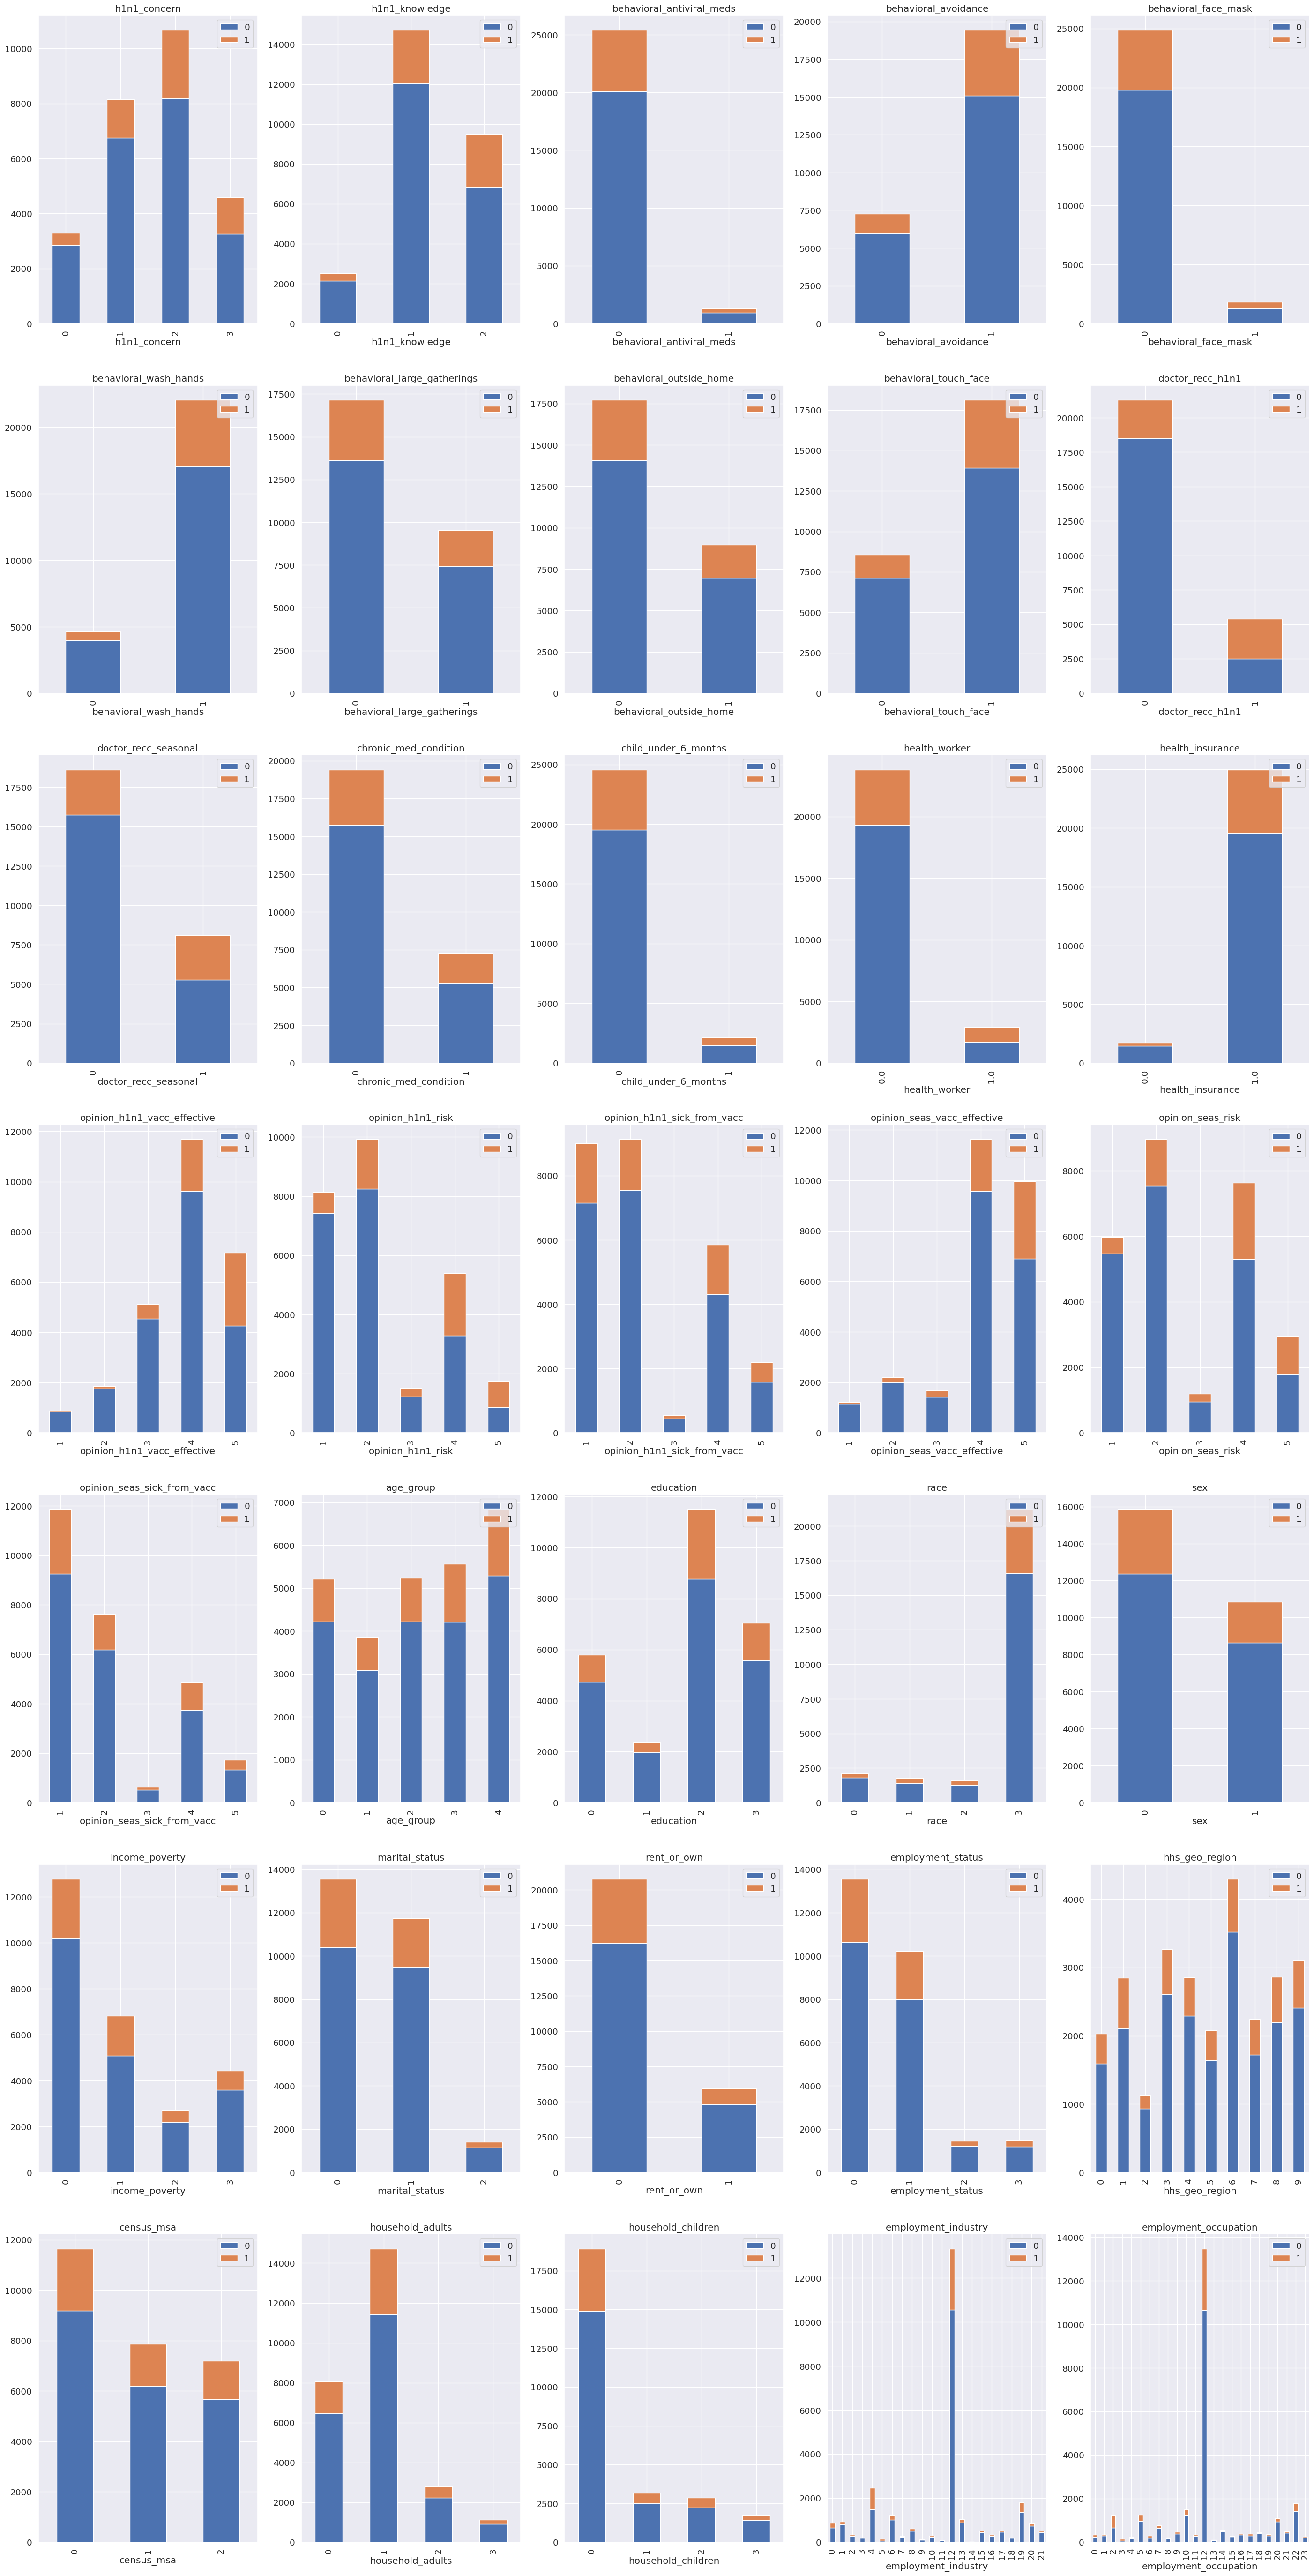

In [ ]:
#visualisasi Categorical Data
#inisiasi untuk subplot
fig, axes = plt.subplots(nrows=7, ncols=5, figsize=(35,70))
x_position = 0
y_position = 0

for i in categoric:

    if y_position == 5:
        y_position = 0
        x_position += 1
    df_plot = master_df.groupby(['h1n1_vaccine', i]).size().reset_index().pivot(columns='h1n1_vaccine', index=i, values=0)
    ax = df_plot.plot(kind='bar', stacked=True, ax=axes[x_position, y_position])
    ax.set_title(i)
    plt.xticks(rotation = 90)
    ax.legend(loc='upper right')  
    y_position += 1

plt.show()

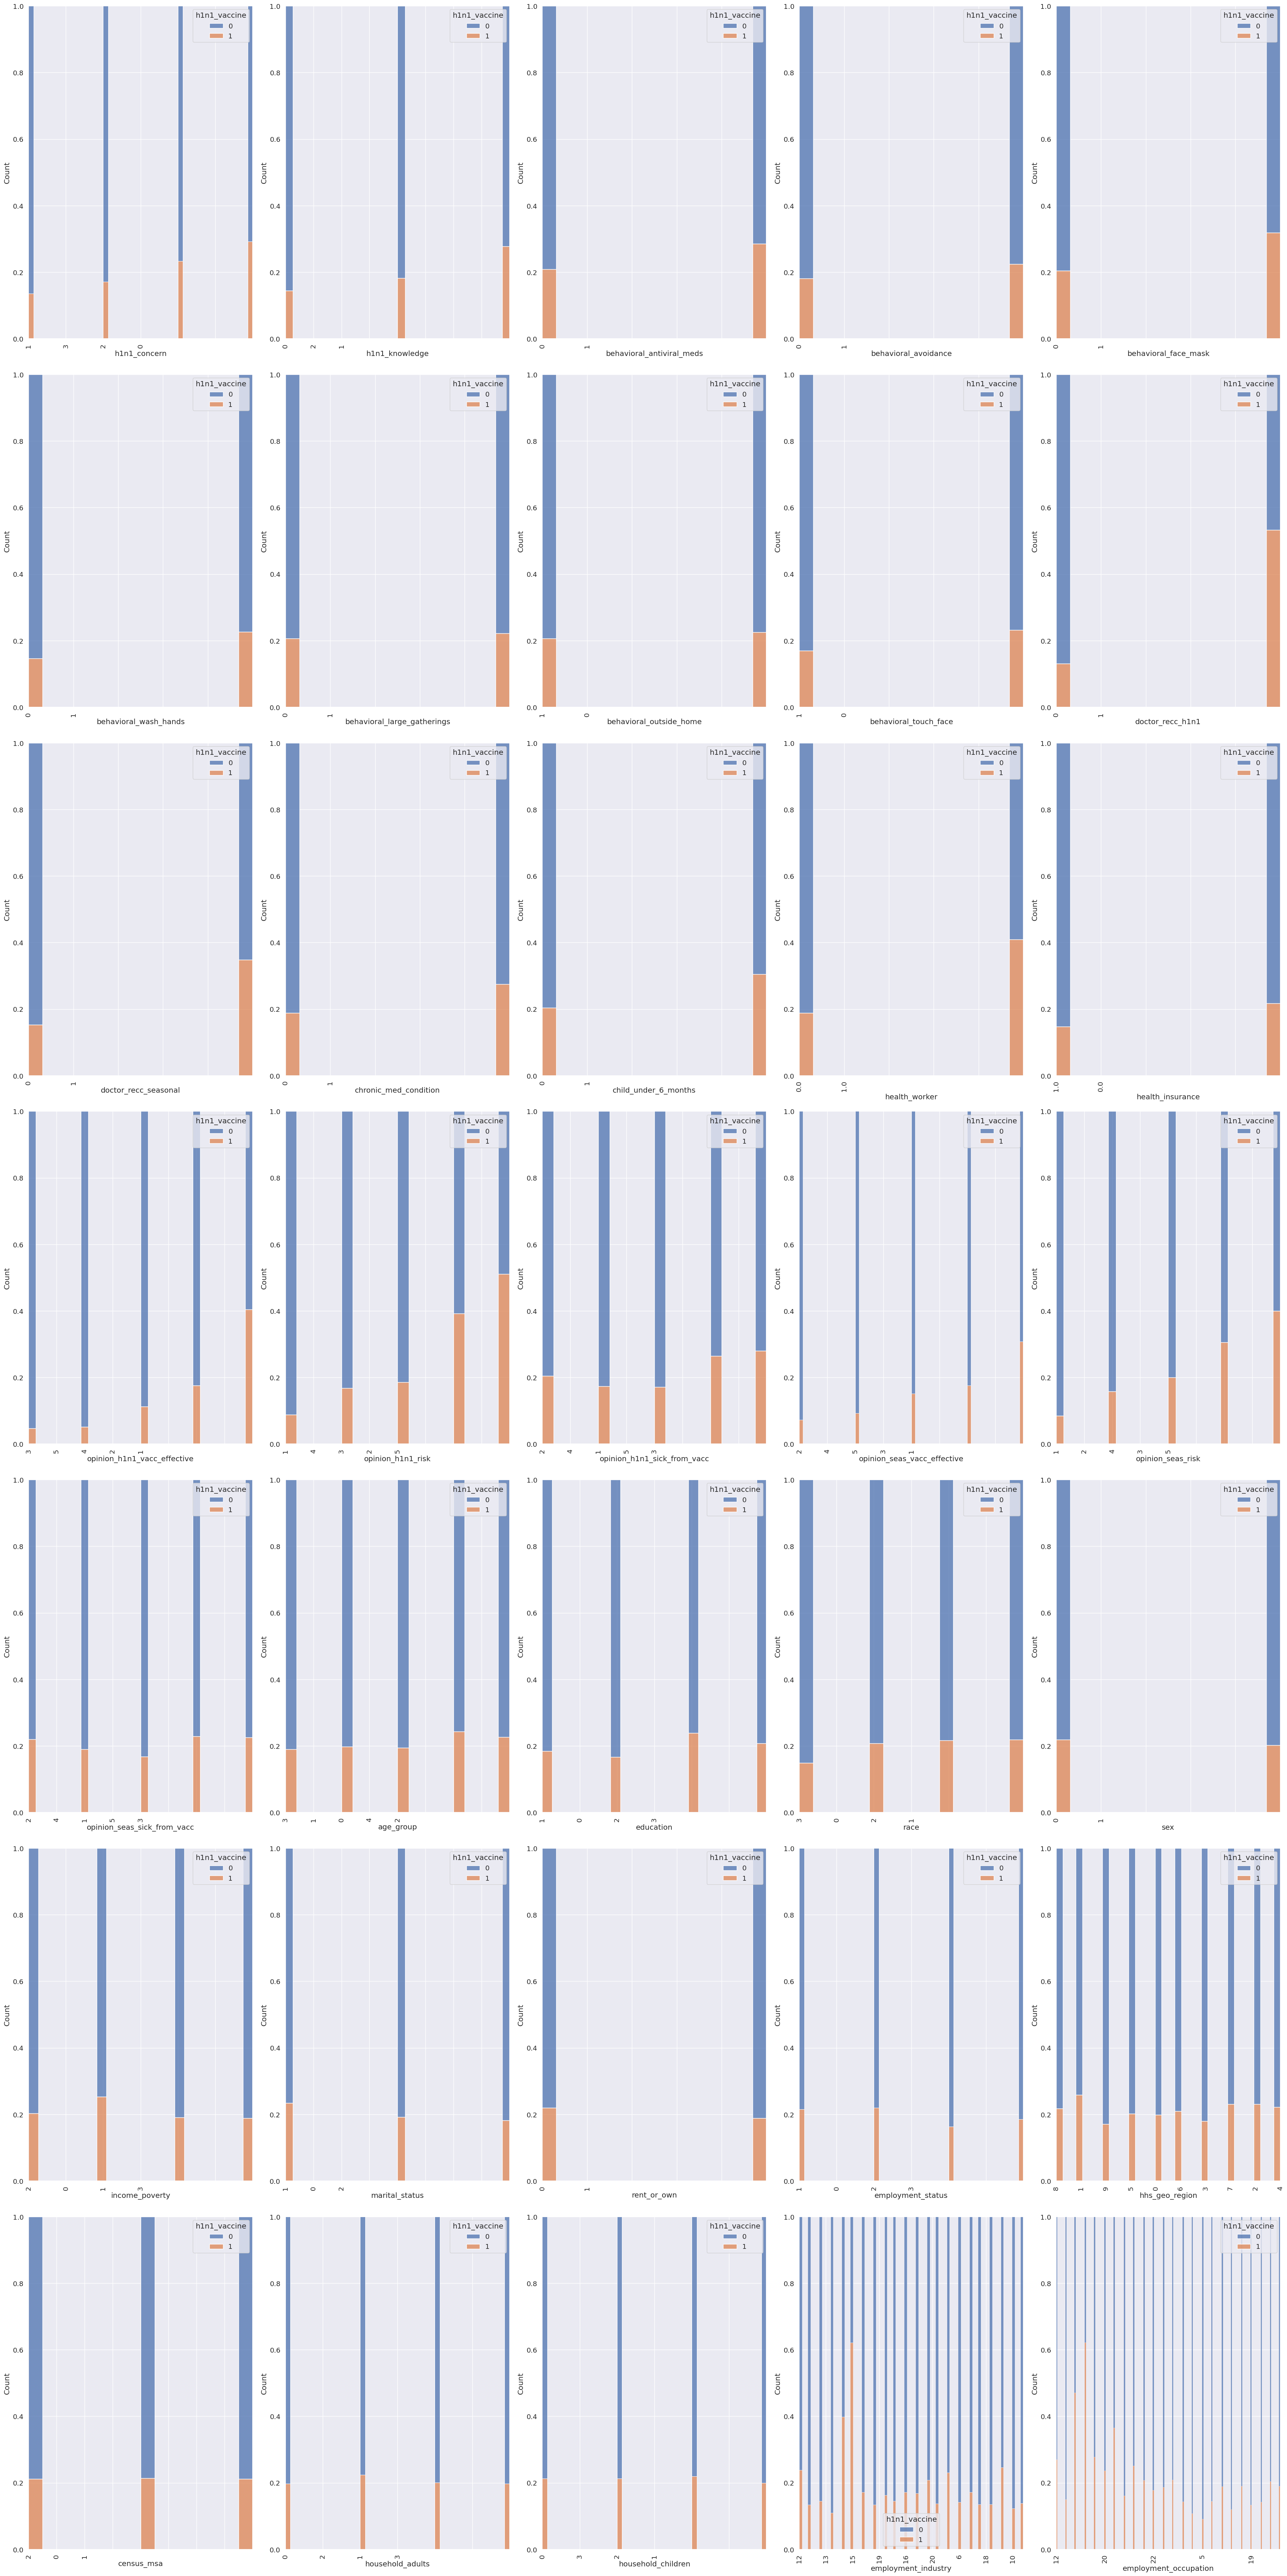

In [ ]:
# create figure with subplots
fig, axs = plt.subplots(nrows = 7, ncols = 5, figsize = (35,70))
axs = axs.flatten()

# create histplot for each categorical variable
for i, var in enumerate(categoric):
  sns.histplot(x = var, hue = 'h1n1_vaccine', data = master_df, ax=axs[i], multiple = 'fill', kde = False)
  axs[i].set_xticklabels(master_df[var].unique(), rotation = 90)
  axs[i].set_xlabel(var)

# adjust spacing between subplots
fig.tight_layout()

# show plot
plt.show()

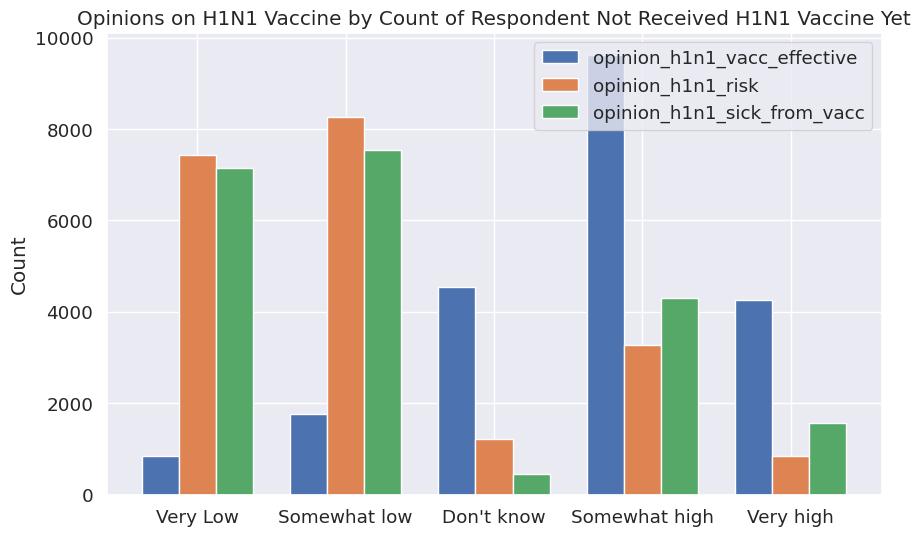

In [ ]:
# Create figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Set the x-axis labels
x_labels = ['Very Low', 'Somewhat low', "Don't know", 'Somewhat high', 'Very high']
x = np.arange(len(x_labels))

# Set the bar width
width = 0.25

# Count the feature h1n1_vaccine that only has output 0
h1n1_vaccine_0 = master_df[master_df['h1n1_vaccine'] == 0]

# Plot the bars
bar1 = ax.bar(x, h1n1_vaccine_0.groupby('opinion_h1n1_vacc_effective').size(), width, label='opinion_h1n1_vacc_effective')
bar2 = ax.bar(x+width, h1n1_vaccine_0.groupby('opinion_h1n1_risk').size(), width, label='opinion_h1n1_risk')
bar3 = ax.bar(x+width*2, h1n1_vaccine_0.groupby('opinion_h1n1_sick_from_vacc').size(), width, label='opinion_h1n1_sick_from_vacc')

# Set the y-axis label and title
ax.set_ylabel('Count')
ax.set_title('Opinions on H1N1 Vaccine by Count of Respondent Not Received H1N1 Vaccine Yet')

# Set the x-axis ticks and tick labels
ax.set_xticks(x + width)
ax.set_xticklabels(x_labels)

# Add legend
ax.legend()

# Show the plot
plt.show()

Sebanyak lebih dari 8000 responden menyatakan vaksin h1n1 cukup efektif, sebanyak lebih dari 8000 responden menyatakan vaksin h1n1 cukup rendah resiko, dan sebanyak lebih dari 6000 responden menyatakan vaksin h1n1 cukup rendah menyebabkan sakit setelah melakukan vaksinasi. Mayoritas orang berpendapat bahwa vaksin h1n1 cukup efektif dan berisiko rendah, sehingga mereka tidak takut terserang penyakit setelah melakukan vaksinasi

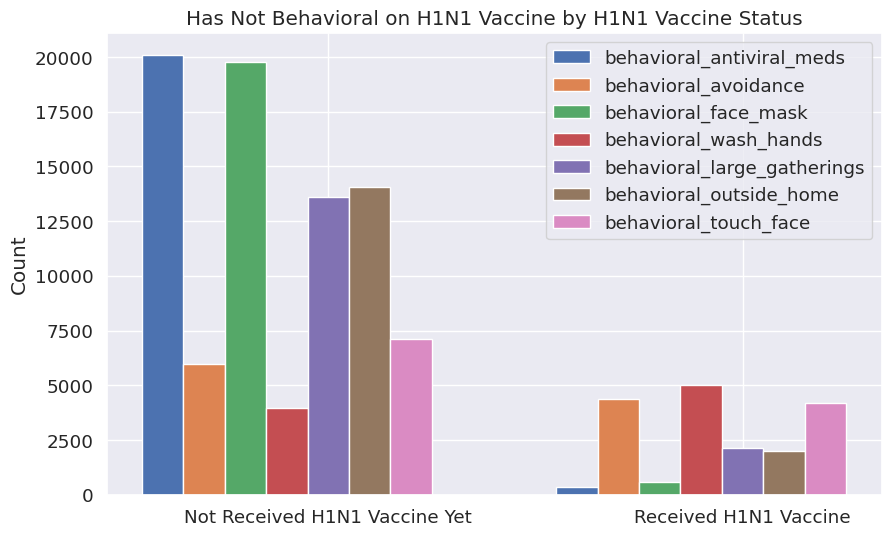

In [ ]:
# Create figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Set the x-axis labels
x_labels = ['Not Received H1N1 Vaccine Yet', 'Received H1N1 Vaccine']
x = np.arange(len(x_labels))

# Set the bar width
width = 0.1

# Count the feature behavioral_antiviral_meds that only has output 0
h1n1_vaccine_0 = master_df[master_df['h1n1_vaccine'] == 0]
h1n1_vaccine_1 = master_df[master_df['h1n1_vaccine'] == 1]

# Plot the bars
bar1 = ax.bar(x-width*3, [h1n1_vaccine_0[h1n1_vaccine_0['behavioral_antiviral_meds'] == 0].shape[0], h1n1_vaccine_1[h1n1_vaccine_1['behavioral_antiviral_meds'] == 1].shape[0]], width, label='behavioral_antiviral_meds')
bar2 = ax.bar(x-width*2, [h1n1_vaccine_0[h1n1_vaccine_0['behavioral_avoidance'] == 0].shape[0], h1n1_vaccine_1[h1n1_vaccine_1['behavioral_avoidance'] == 1].shape[0]], width, label='behavioral_avoidance')
bar3 = ax.bar(x-width, [h1n1_vaccine_0[h1n1_vaccine_0['behavioral_face_mask'] == 0].shape[0], h1n1_vaccine_1[h1n1_vaccine_1['behavioral_face_mask'] == 1].shape[0]], width, label='behavioral_face_mask')
bar4 = ax.bar(x, [h1n1_vaccine_0[h1n1_vaccine_0['behavioral_wash_hands'] == 0].shape[0], h1n1_vaccine_1[h1n1_vaccine_1['behavioral_wash_hands'] == 1].shape[0]], width, label='behavioral_wash_hands')
bar5 = ax.bar(x+width, [h1n1_vaccine_0[h1n1_vaccine_0['behavioral_large_gatherings'] == 0].shape[0], h1n1_vaccine_1[h1n1_vaccine_1['behavioral_large_gatherings'] == 1].shape[0]], width, label='behavioral_large_gatherings')
bar6 = ax.bar(x+width*2, [h1n1_vaccine_0[h1n1_vaccine_0['behavioral_outside_home'] == 0].shape[0], h1n1_vaccine_1[h1n1_vaccine_1['behavioral_outside_home'] == 1].shape[0]], width, label='behavioral_outside_home')
bar7 = ax.bar(x+width*3, [h1n1_vaccine_0[h1n1_vaccine_0['behavioral_touch_face'] == 0].shape[0], h1n1_vaccine_1[h1n1_vaccine_1['behavioral_touch_face'] == 1].shape[0]], width, label='behavioral_touch_face')

# Set the y-axis label and title
ax.set_ylabel('Count')
ax.set_title('Has Not Behavioral on H1N1 Vaccine by H1N1 Vaccine Status')

# Set the x-axis ticks and tick labels
ax.set_xticks(x + width)
ax.set_xticklabels(x_labels)

# Add legend
ax.legend()

# Show the plot
plt.show()

Sebanyak lebih dari 20000 responden belum mendapatkan antiviral medications dan belum melakukan vaksinasi H1N1. Selain itu ada lebih dari 5000 responden yang belum menghindari kontak fisik dengan orang bergejala flu, lebih dari 17500 responden belum menggunakan masker, lebih dari 12500 responden belum mengurangi waktu berkumpul di keramaian, lebih dari 12500 responden belum mengurangi kontak dengan orang di luar rumah, dan lebih dari 5000 responden belum mengurangi kebiasaan menyentuh wajah, seperti mata, hidung, dan mulut, belum menerima vaksinasi H1N1.

Ada sebanyak 5000 responden yang sudah melakukan vaksinasi H1N1, sudah menerapkan kebiasaan mencuci tangan atau membawa handsanitizer.

Kebiasaan dalam melakukan pencegahan penyebaran flu H1N1 harus disosialisasikan lebih luas terutama pada responden yang belum melakukan vaksinasi untuk menghentikan rantai penyebaran flu H1N1. Arahan juga harus ditegaskan pada responden yang sudah melakukan vaksinasi, karena masih sangat sedikit yang menerapkan kebiasaan pencegahan. Meskipun tidak akan tertular, tetapi responden yang sudah melakukan vaksinasi H1N1 dapat menularkan flu pada responden yang belum mendapatkan vaksin.

# Plot Seasonal Vaccine

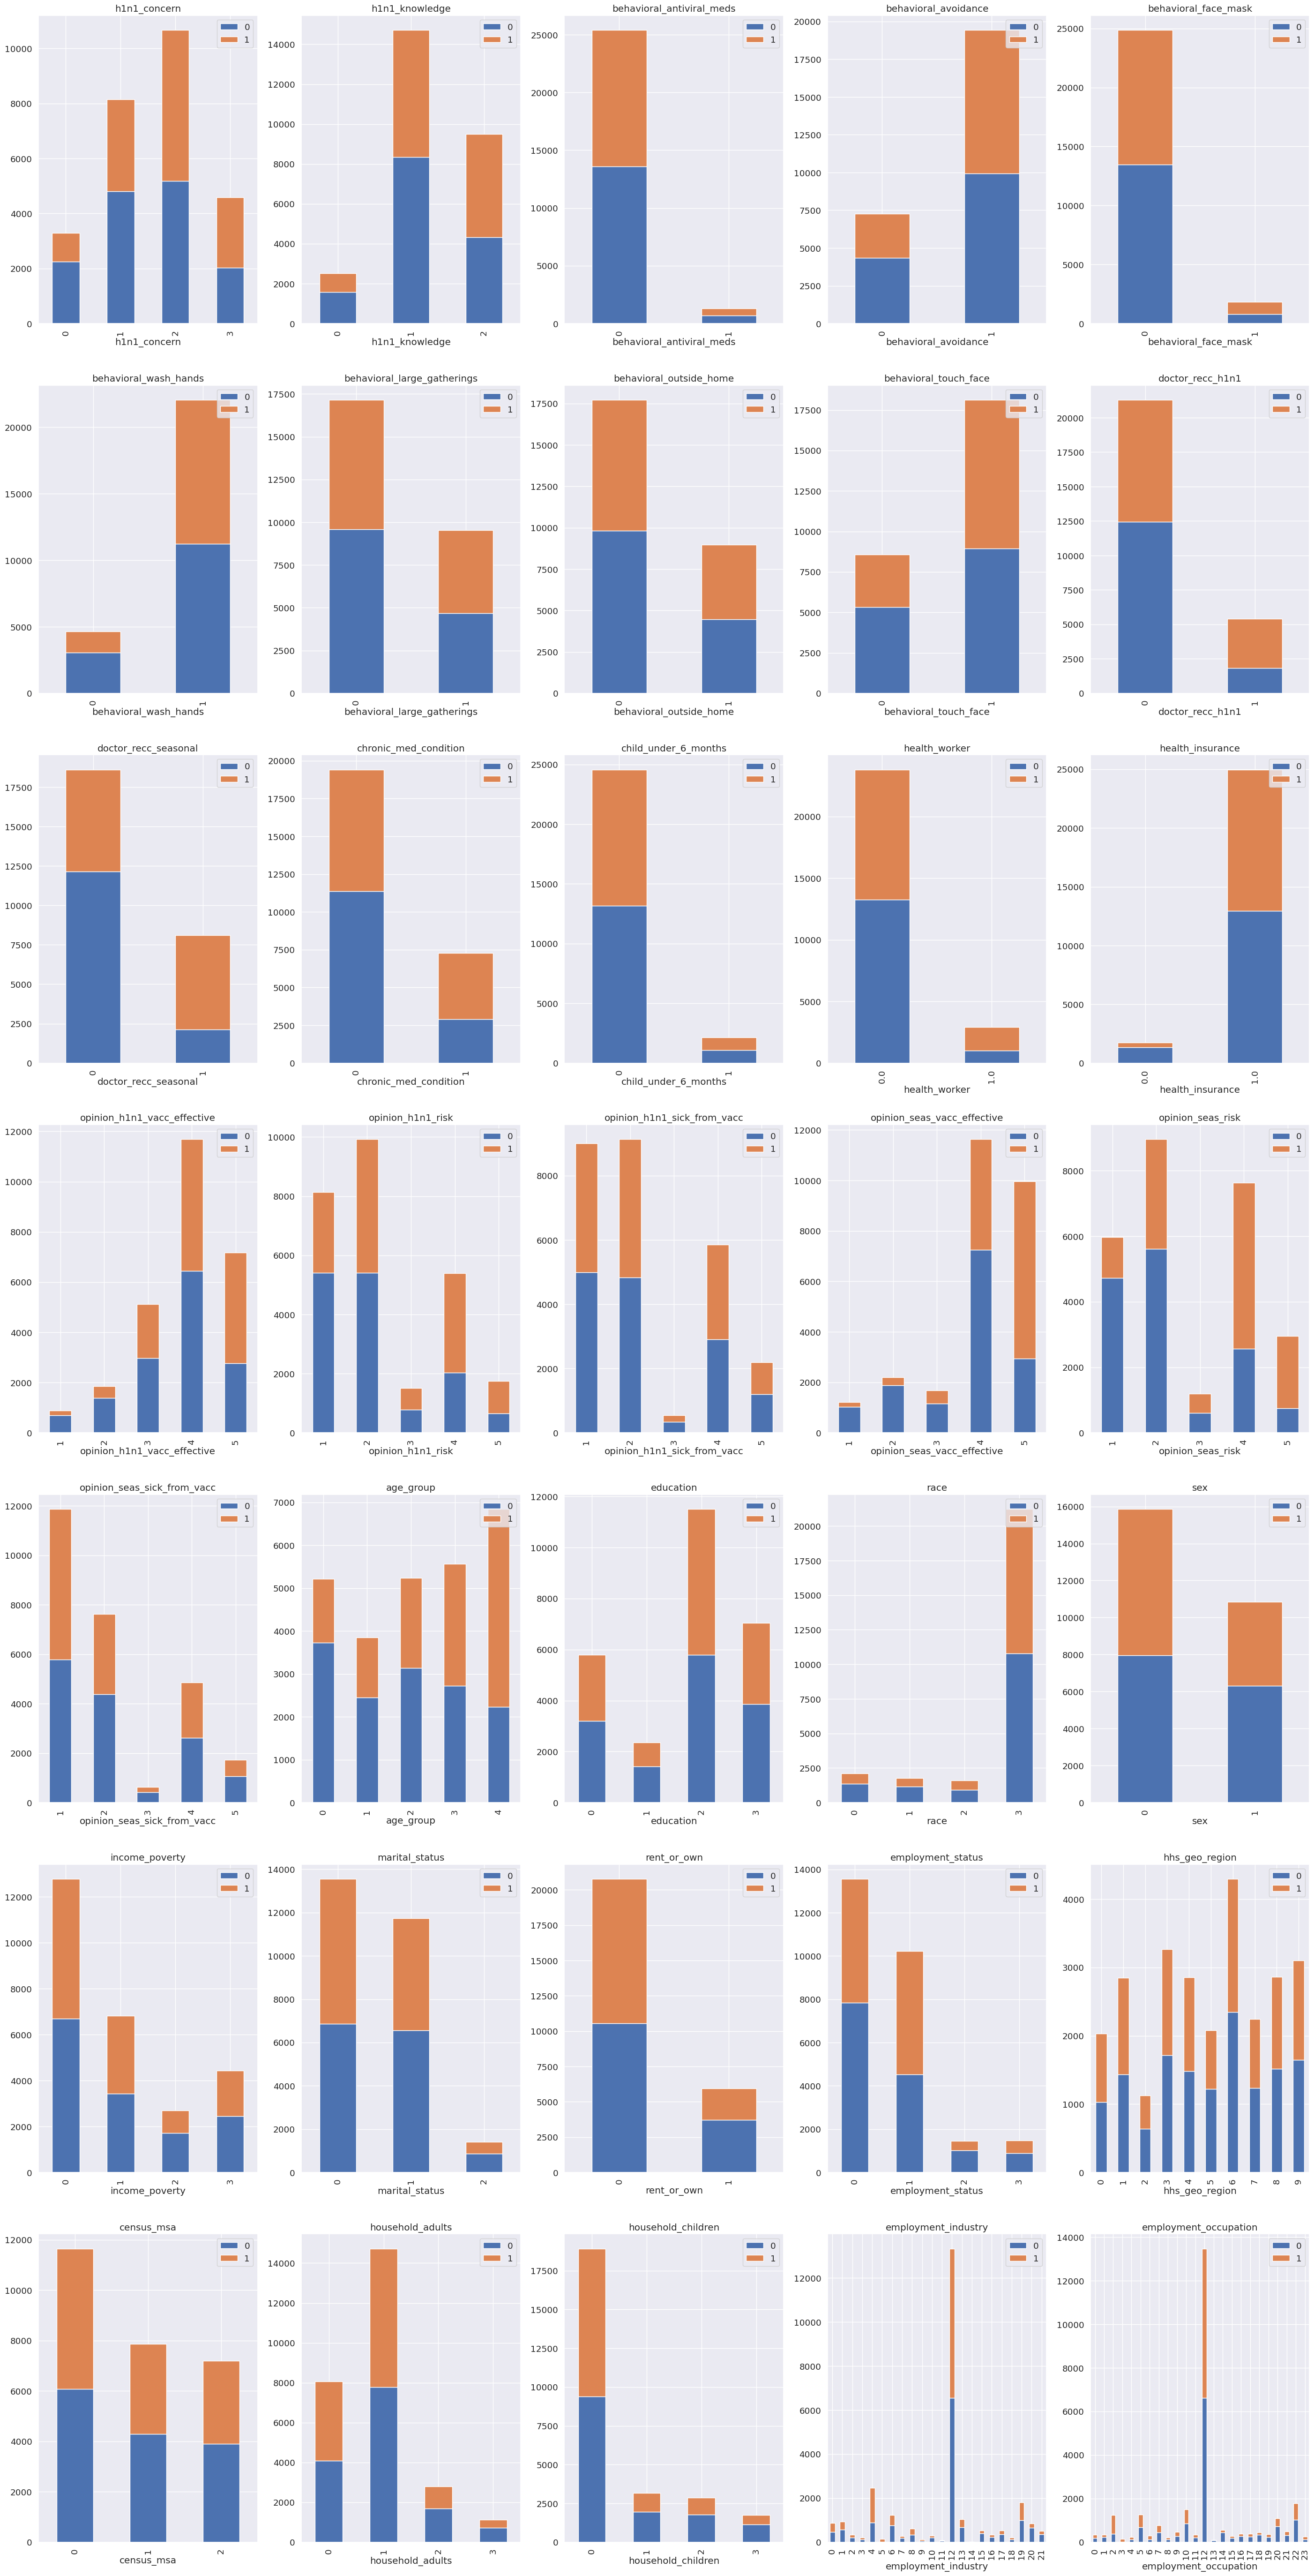

In [ ]:
#visualisasi Categorical Data
#inisiasi untuk subplot
fig, axes = plt.subplots(nrows=7, ncols=5, figsize=(35,70))
x_position = 0
y_position = 0

for i in categoric:
    if y_position == 5:
        y_position = 0
        x_position += 1
    df_plot = master_df.groupby(['seasonal_vaccine', i]).size().reset_index().pivot(columns='seasonal_vaccine', index=i, values=0)
    ax = df_plot.plot(kind='bar', stacked=True, ax=axes[x_position, y_position])
    ax.set_title(i)
    plt.xticks(rotation = 90)
    ax.legend(loc='upper right')  
    y_position += 1

plt.show()

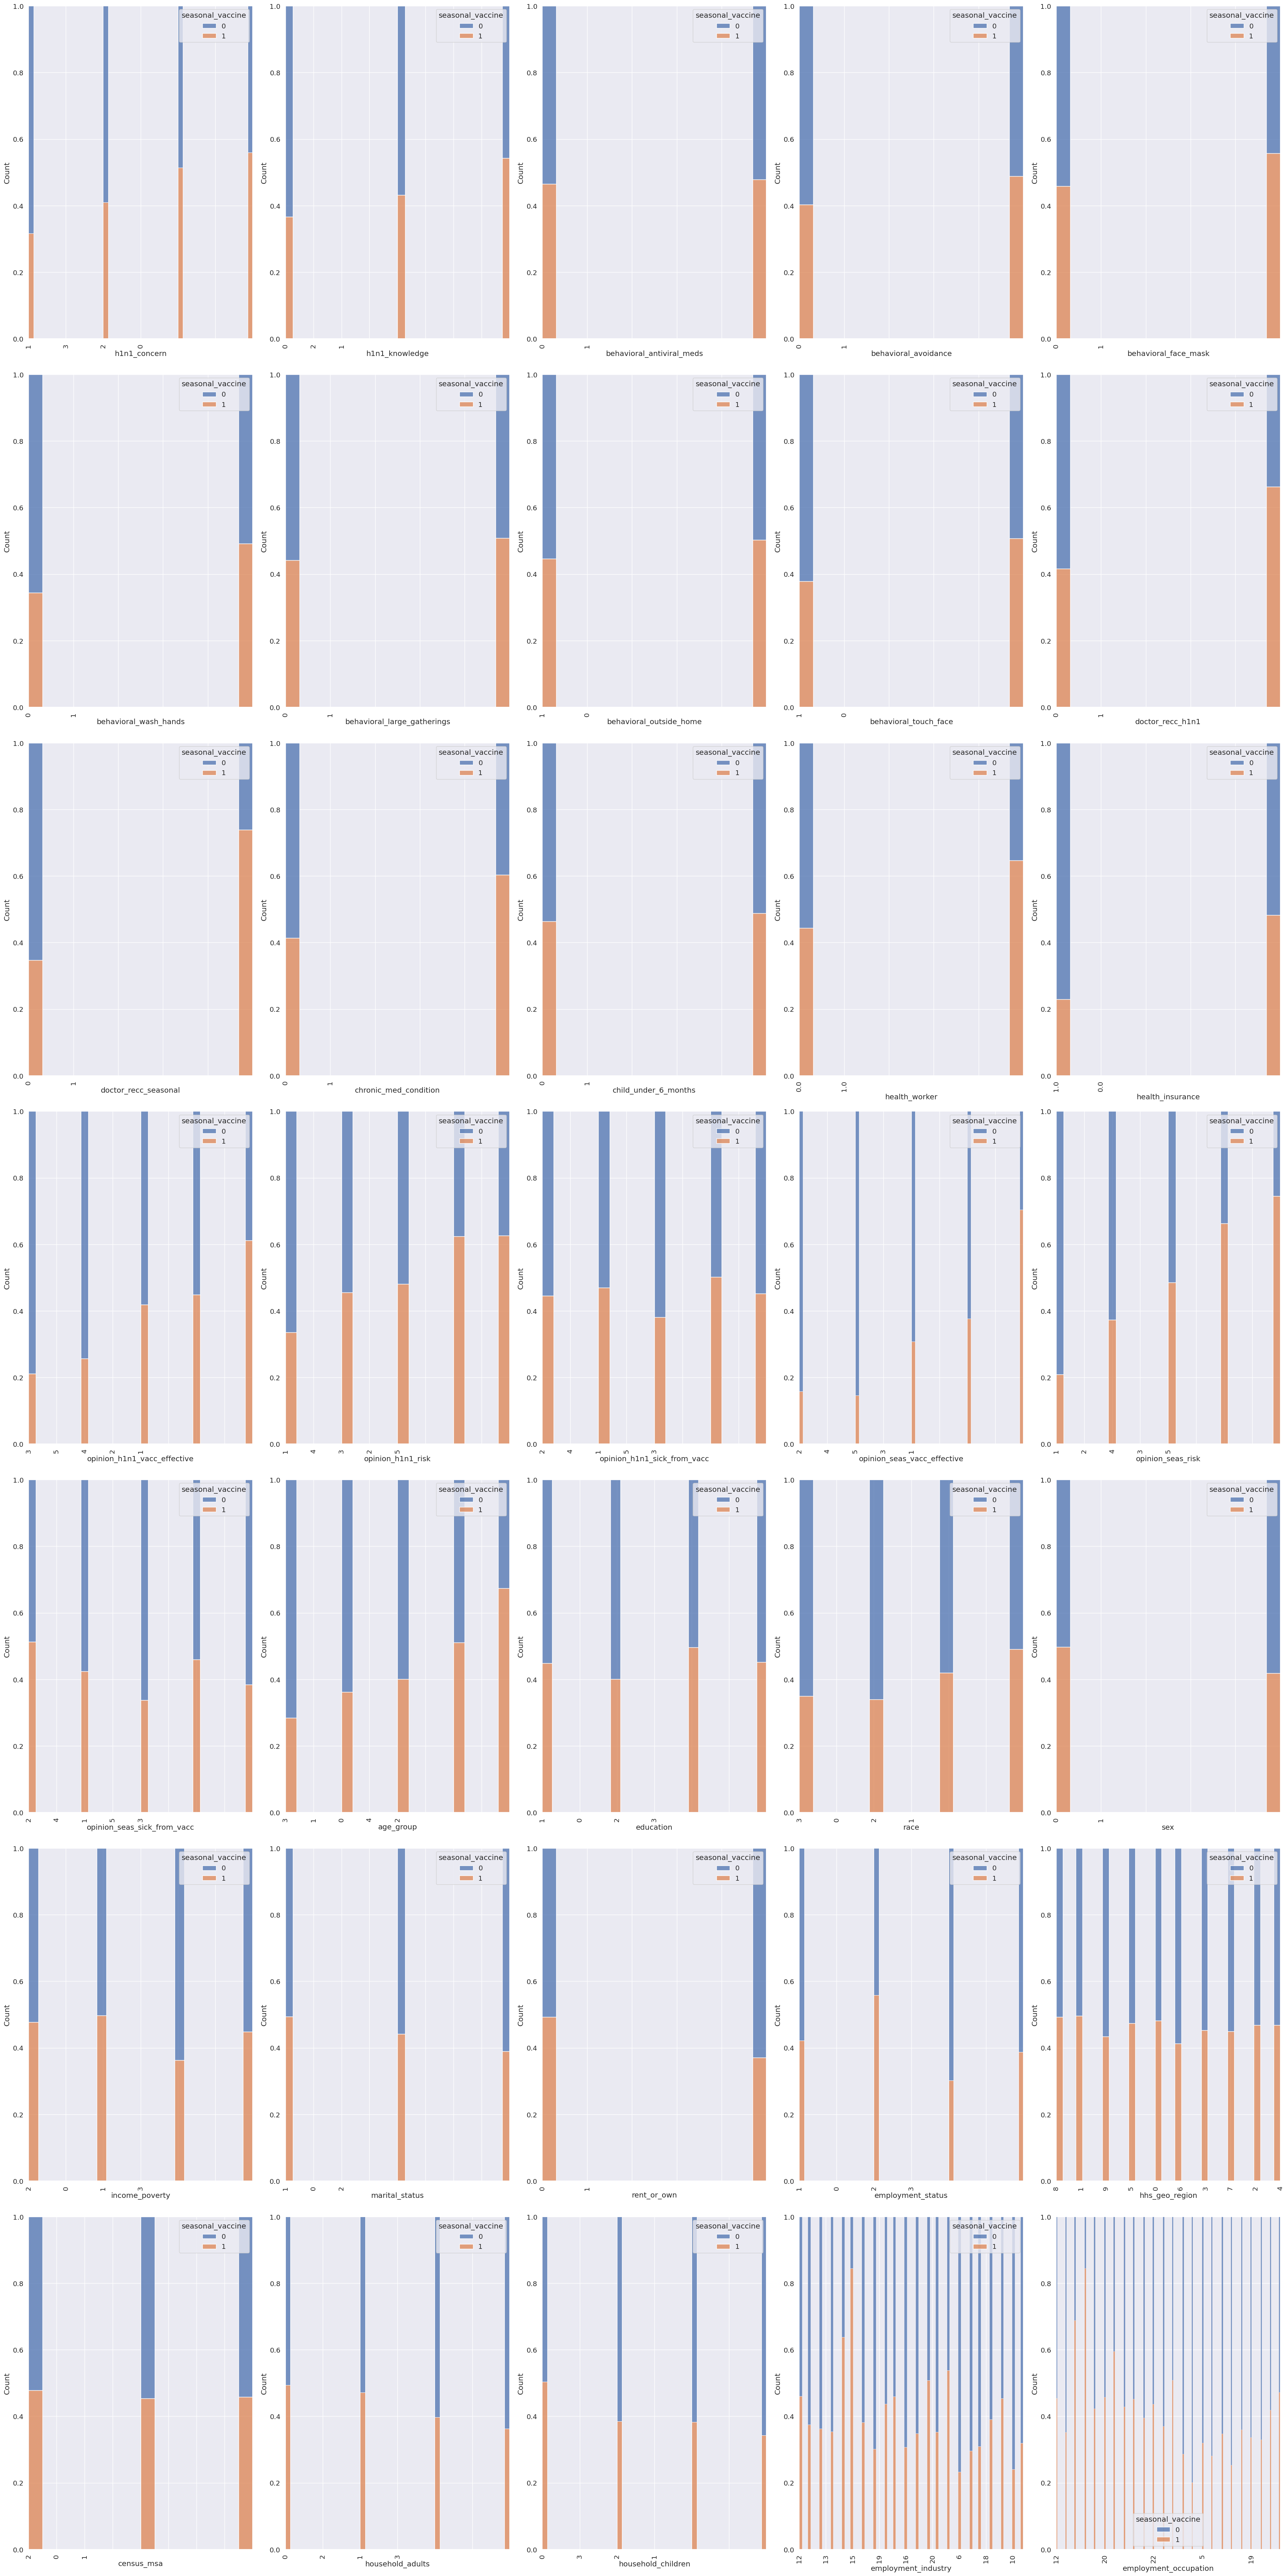

In [ ]:
# create figure with subplots
fig, axs = plt.subplots(nrows = 7, ncols = 5, figsize = (35,70))
axs = axs.flatten()

# create histplot for each categorical variable
for i, var in enumerate(categoric):
  sns.histplot(x = var, hue = 'seasonal_vaccine', data = master_df, ax=axs[i], multiple = 'fill', kde = False)
  axs[i].set_xticklabels(master_df[var].unique(), rotation = 90)
  axs[i].set_xlabel(var)

# adjust spacing between subplots
fig.tight_layout()

# show plot
plt.show()

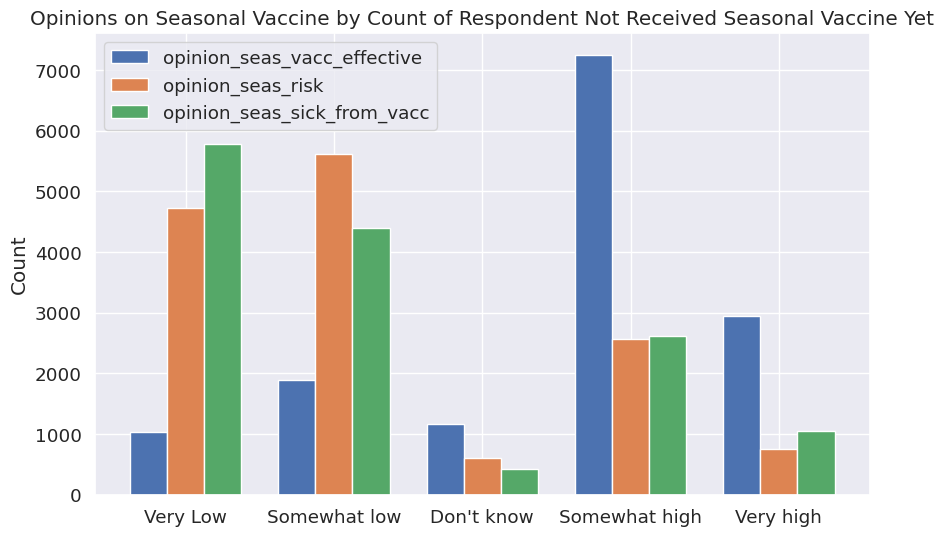

In [ ]:
# Create figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Set the x-axis labels
x_labels = ['Very Low', 'Somewhat low', "Don't know", 'Somewhat high', 'Very high']
x = np.arange(len(x_labels))

# Set the bar width
width = 0.25

# Count the feature h1n1_vaccine that only has output 0
seas_vaccine_0 = master_df[master_df['seasonal_vaccine'] == 0]

# Plot the bars
bar1 = ax.bar(x, seas_vaccine_0.groupby('opinion_seas_vacc_effective').size(), width, label='opinion_seas_vacc_effective')
bar2 = ax.bar(x+width, seas_vaccine_0.groupby('opinion_seas_risk').size(), width, label='opinion_seas_risk')
bar3 = ax.bar(x+width*2, seas_vaccine_0.groupby('opinion_seas_sick_from_vacc').size(), width, label='opinion_seas_sick_from_vacc')

# Set the y-axis label and title
ax.set_ylabel('Count')
ax.set_title('Opinions on Seasonal Vaccine by Count of Respondent Not Received Seasonal Vaccine Yet')

# Set the x-axis ticks and tick labels
ax.set_xticks(x + width)
ax.set_xticklabels(x_labels)

# Add legend
ax.legend()

# Show the plot
plt.show()

Sebanyak lebih dari 7000 responden menyatakan vaksin seasonal flu cukup efektif, sebanyak lebih dari 5000 responden menyatakan vaksin seasonal cukup rendah resiko, dan sebanyak lebih dari 5000 responden menyatakan vaksin seasonal sangat rendah menyebabkan sakit setelah melakukan vaksinasi. Mayoritas orang berpendapat bahwa vaksin seasonal cukup efektif dan berisiko rendah, sehingga mereka tidak takut terserang penyakit setelah melakukan vaksinasi

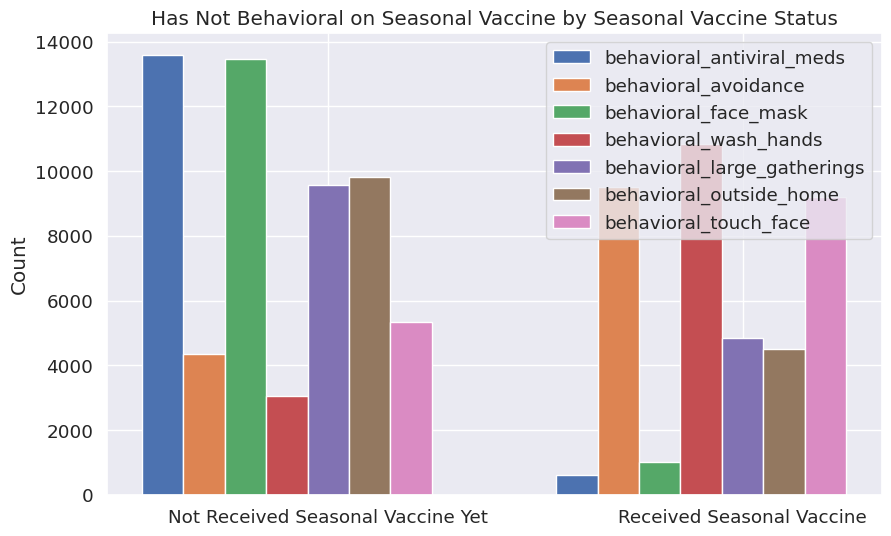

In [ ]:
# Create figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Set the x-axis labels
x_labels = ['Not Received Seasonal Vaccine Yet', 'Received Seasonal Vaccine']
x = np.arange(len(x_labels))

# Set the bar width
width = 0.1

# Count the feature behavioral_antiviral_meds that only has output 0
seas_vaccine_0 = master_df[master_df['seasonal_vaccine'] == 0]
seas_vaccine_1 = master_df[master_df['seasonal_vaccine'] == 1]

# Plot the bars
bar1 = ax.bar(x-width*3, [seas_vaccine_0[seas_vaccine_0['behavioral_antiviral_meds'] == 0].shape[0], seas_vaccine_1[seas_vaccine_1['behavioral_antiviral_meds'] == 1].shape[0]], width, label='behavioral_antiviral_meds')
bar2 = ax.bar(x-width*2, [seas_vaccine_0[seas_vaccine_0['behavioral_avoidance'] == 0].shape[0], seas_vaccine_1[seas_vaccine_1['behavioral_avoidance'] == 1].shape[0]], width, label='behavioral_avoidance')
bar3 = ax.bar(x-width, [seas_vaccine_0[seas_vaccine_0['behavioral_face_mask'] == 0].shape[0], seas_vaccine_1[seas_vaccine_1['behavioral_face_mask'] == 1].shape[0]], width, label='behavioral_face_mask')
bar4 = ax.bar(x, [seas_vaccine_0[seas_vaccine_0['behavioral_wash_hands'] == 0].shape[0], seas_vaccine_1[seas_vaccine_1['behavioral_wash_hands'] == 1].shape[0]], width, label='behavioral_wash_hands')
bar5 = ax.bar(x+width, [seas_vaccine_0[seas_vaccine_0['behavioral_large_gatherings'] == 0].shape[0], seas_vaccine_1[seas_vaccine_1['behavioral_large_gatherings'] == 1].shape[0]], width, label='behavioral_large_gatherings')
bar6 = ax.bar(x+width*2, [seas_vaccine_0[seas_vaccine_0['behavioral_outside_home'] == 0].shape[0], seas_vaccine_1[seas_vaccine_1['behavioral_outside_home'] == 1].shape[0]], width, label='behavioral_outside_home')
bar7 = ax.bar(x+width*3, [seas_vaccine_0[seas_vaccine_0['behavioral_touch_face'] == 0].shape[0], seas_vaccine_1[seas_vaccine_1['behavioral_touch_face'] == 1].shape[0]], width, label='behavioral_touch_face')

# Set the y-axis label and title
ax.set_ylabel('Count')
ax.set_title('Has Not Behavioral on Seasonal Vaccine by Seasonal Vaccine Status')

# Set the x-axis ticks and tick labels
ax.set_xticks(x + width)
ax.set_xticklabels(x_labels)

# Add legend
ax.legend()

# Show the plot
plt.show()

Pada data terkait vaksinasi seasonal flu, banyak responden yang sudah menerapkan kebiasaan pencegahan. Untuk responden yang belum melakukan vaksinasi seasonal flu, sebanyak lebih dari 12000 responden belum mendapatkan antiviral medications, selain itu ada lebih dari 12000 responden yang belum menggunakan masker, lebih dari 8000 responden belum mengurangi waktu berkumpul di keramaian, dan lebih dari 8000 responden mengurangi kontak dengan orang lain di luar rumah.

Untuk responden yang sudah melakukan vaksinasi, banyak yang sudah menerapkan kebiasaan pencegahan, seperti lebih dari 8000 responden menghindari kontak dengan orang yang memiliki gejala flu, lebih dari 10000 responden sudah terbiasa mencuci tangan, dan lebih dari 8000 responden sudah terbiasa mengurangi dalam menyentuh wajah seperti mata, hidung, dan mulut.

# **Modelling**

# Train Test Split

### **H1N1 Vaccine**

In [ ]:
# Drop the 'h1n1_vaccine' column to prepare data for splitting
X = master_df.drop(columns=['h1n1_vaccine', 'seasonal_vaccine'])
# Get the target variable
y = master_df['h1n1_vaccine']

In [ ]:
# Split data into training, validation and test sets, ensuring the class distribution is maintained
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

### **Seasonal Flu Vaccine**

In [ ]:
# Drop the 'seasonal_vaccine' column to prepare data for splitting
X2 = master_df.drop(columns=['h1n1_vaccine', 'seasonal_vaccine'])
# Get the target variable
y2 = master_df['seasonal_vaccine']

In [ ]:
# Split data into training, validation and test sets, ensuring the class distribution is maintained
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, stratify=y, random_state=42)

# Oversampling

Imbalanced Data adalah masalah ketidakseimbangan kelas yang terjadi pada data klasifikasi yang dapat mengurangi akurasi. Salah satu teknik yang digunakan dalam train classifier untuk mendeteksi kelas imbalanced adalah dengan menggunakan SMOTE. Synthetic Minority Oversampling Technique (SMOTE) adalah salah satu turunan dari oversampling. Pendekatan ini bekerja dengan membuat replikasi dari data minoritas. Metode SMOTE bekerja dengan mencari k nearest neighbors (yaitu ketetanggaan terdekat data sebanyak k) untuk setiap data di kelas minoritas, setelah itu dibuat data sintetis sebanyak prosentase duplikasi yang diinginkan antara data minor dan k nearest neighbors yang dipilih secara acak.

### **H1N1 Vaccine**

In [ ]:
#Checking Target Imbalance
import plotly.graph_objects as go
colors = ['gold', 'mediumturquoise']
labels = ['0','1']
values = master_df['h1n1_vaccine'].value_counts()/master_df['h1n1_vaccine'].shape[0]

# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_traces(hoverinfo='label+percent', textinfo='percent', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.update_layout(
    title_text="h1n1_vaccine")
fig.show()

Perbandingan data beroutput 1 dengan data beroutput 0 adalah 0.212 : 0.788 dimana perbedaan cukup jauh sehingga data dikatakan imbalanced.

In [ ]:
from imblearn.combine import SMOTETomek
smote = SMOTETomek(sampling_strategy=0.6)

x_sm, y_sm = smote.fit_resample(X, y)
y_sm.value_counts()

0    20868
1    12454
Name: h1n1_vaccine, dtype: int64

Dengan menggunakan SMOTE data dapat dimanipulasi sehingga perbandingan output 1 dan output 0 menjadi sekitar 0.374 : 0.626

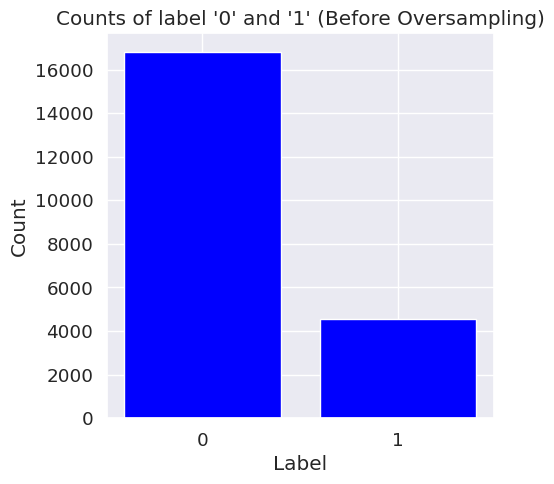

In [ ]:
# Plot counts before oversampling
plt.figure(figsize=(5, 5))
plt.bar(['0', '1'], [sum(y_train==0), sum(y_train==1)], color='blue')
plt.title("Counts of label '0' and '1' (Before Oversampling)")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

Sebelum dilakukan oversampling, banyak data output berlabel 1 adalah 5.662 dan data output berlabel 0 adalah 21.045

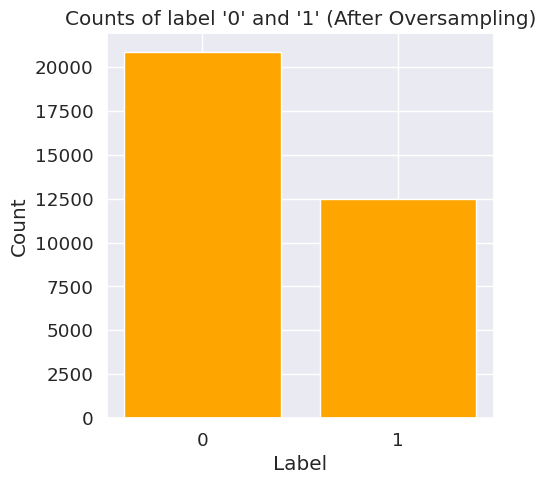

In [ ]:
# Plot counts after oversampling
plt.figure(figsize=(5, 5))
plt.bar(['0', '1'], [sum(y_sm==0), sum(y_sm==1)], color='orange')
plt.title("Counts of label '0' and '1' (After Oversampling)")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

Setelah dilakukan oversampling, banyak data output berlabel 1 adalah 12.454 dan data output berlabel 0 adalah 20.868

####**Seasonal Flu Vaccine**

In [ ]:
#Checking Target Imbalance
import plotly.graph_objects as go
colors = ['gold', 'mediumturquoise']
labels = ['0','1']
values = master_df['seasonal_vaccine'].value_counts()/master_df['seasonal_vaccine'].shape[0]

# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_traces(hoverinfo='label+percent', textinfo='percent', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.update_layout(
    title_text="seasonal_vaccine")
fig.show()

Perbandingan data beroutput 1 dengan data beroutput 0 adalah 0.466 : 0.534 dimana perbedaan data tidak jauh berbeda tetapi dibutuhkan data yang lebih baik.

In [ ]:
from imblearn.combine import SMOTETomek
smote = SMOTETomek(sampling_strategy=0.9)

x2_sm, y2_sm = smote.fit_resample(X2, y2)
y2_sm.value_counts()

0    12866
1    11438
Name: seasonal_vaccine, dtype: int64

Dengan menggunakan SMOTE data dapat dimanipulasi sehingga perbandingan output 1 dan output 0 menjadi sekitar 0,47 : 0,53

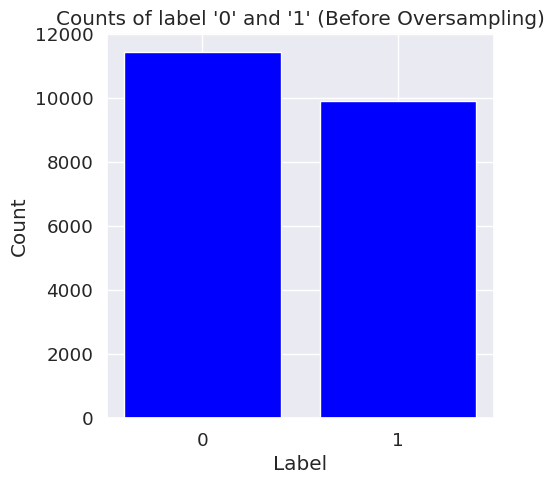

In [ ]:
# Plot counts before oversampling
plt.figure(figsize=(5, 5))
plt.bar(['0', '1'], [sum(y2_train==0), sum(y2_train==1)], color='blue')
plt.title("Counts of label '0' and '1' (Before Oversampling)")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

Sebelum dilakukan oversampling, banyak data output berlabel 1 adalah 12.455 dan data output berlabel 0 adalah 14.234

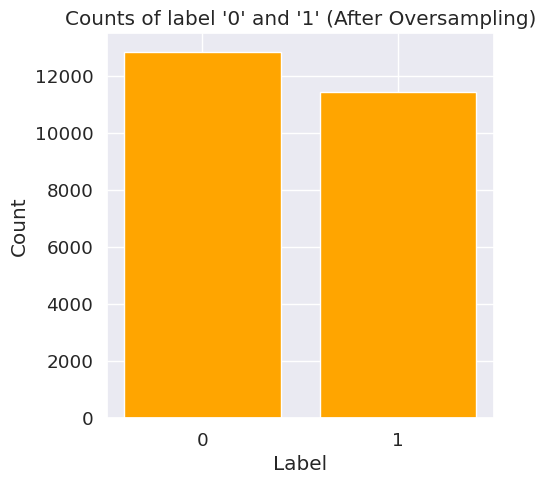

In [ ]:
# Plot counts after oversampling
plt.figure(figsize=(5, 5))
plt.bar(['0', '1'], [sum(y2_sm==0), sum(y2_sm==1)], color='orange')
plt.title("Counts of label '0' and '1' (After Oversampling)")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

Setelah dilakukan oversampling, banyak data output berlabel 1 adalah 11438
dan data output berlabel 0 adalah 12866

#Random Forest

Random forest adalah suatu algoritma yang digunakan pada klasifikasi data dalam jumlah yang besar. Karena dataset yang digunakan memiliki jumlah data yang besar, sehingga algoritma ini sangat cocok untuk klasifikasi pada permasalahan ini. Klasifikasi random forest dilakukan melalui penggabungan pohon dengan melakukan training pada sampel data yang dimiliki.

### **H1N1 Vaccine**

In [ ]:
rfc = RandomForestClassifier(class_weight='balanced')
# Create the parameter grid based on the results of random search
param_grid = {'n_estimators': [100, 200],
              'max_depth': [None, 5, 10],
              'max_features': ['sqrt', 'log2', None]}

# Perform a grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(rfc, param_grid, cv=5)
grid_search.fit(x_sm, y_sm)

# Print the best hyperparameters
print(grid_search.best_params_)

{'max_depth': None, 'max_features': 'log2', 'n_estimators': 200}


Didapatkan best parameter untuk data ber variabel target 'h1n1_vaccine' terdiri dari 'max_depth': None, 'max_features': 'log2', 'n_estimators': 200. Selanjutnya parameter diinput ke model Random Forest untuk mendapatkan hasil yang lebih maksimal.

In [ ]:
# Fitting Model
rfc = RandomForestClassifier(random_state=42, max_features='log2', n_estimators=200, max_depth=None)
rfc.fit(x_sm, y_sm)

RandomForestClassifier(max_features='log2', n_estimators=200, random_state=42)

In [ ]:
# Prediksi dan Akurasi pada data train
y_train = rfc.predict(x_sm)
print("Accuracy Score :", round(accuracy_score(y_sm, y_train)*100, 2), "%")

Accuracy Score : 100.0 %


In [ ]:
# Prediksi dan Akurasi pada data test
y_pred = rfc.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100, 2), "%")

Accuracy Score : 99.49 %


In [ ]:
# Report Random Forest
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      4207
           1       1.00      0.98      0.99      1135

    accuracy                           0.99      5342
   macro avg       1.00      0.99      0.99      5342
weighted avg       0.99      0.99      0.99      5342



Dari seluruh rangkaian pengujian menggunakan Random Forest, didapatkan insight bahwa model berhasil mengklasifikasikan sebesar 99% pemilihan untuk melakukan vaksinasi h1n1, terlepas dari pendapat masyarakat, perilaku masyarakat, pengetahuan, rekomendasi dokter, dan sebagainya. Perlu dicatat juga bahwa akurasi ini tidak memberikan informasi tentang seberapa baik model mengklasifikasikan kelas tertentu.

Kemudian, 98% repeatability menunjukkan bahwa model mampu mengidentifikasikan 98% dari semua pemilihan vaksinasi h1n1 dipengaruhi oleh variabel yang telah disebutkan. Namun, terdapat 2% pemilihan vaksin h1n1 yang tidak terdeteksi oleh model.

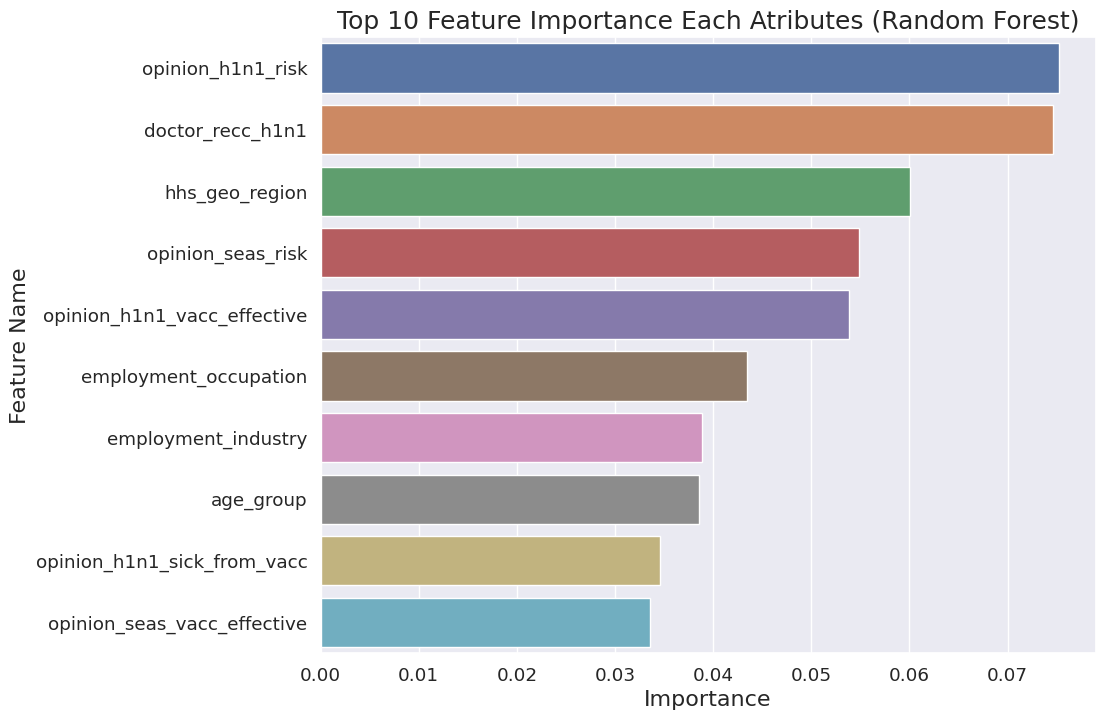

In [ ]:
# Features yang paling berpengaruh terhadap variabel target 'h1n1_vaccine'
imp_df = pd.DataFrame({
    "Feature Name" : X_train.columns,
    "Importance" : rfc.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Top 10 Feature Importance Each Atributes (Random Forest)', fontsize=18)
plt.xlabel('Importance', fontsize=16)
plt.ylabel('Feature Name', fontsize=16)
plt.show()

Fitur opinion_h1n1_risk yang mana berisi mengenai pendapat masyarakat terhadap risiko vaksin h1n1 ternyata merupakan fitur yang paling berkontribusi dalam kasus vaksinasi ini dengan tingkat kepentintingan mendekati 8% yang disusul dengan rekomendasi h1n1 dari dokter. Hal ini tidak mengherankan karena kedua fitur ini berkorelasi sedemikian sehingga sangat berpengaruh terhadap model prediksi.

### **Seasonal Flu Vaccine**

In [ ]:
rfc2 = RandomForestClassifier(class_weight='balanced')
# Create the parameter grid based on the results of random search
param_grid = {'n_estimators': [100, 200],
              'max_depth': [None, 5, 10],
              'max_features': ['sqrt', 'log2', None]}

# Perform a grid search with cross-validation to find the best hyperparameters
grid2_search = GridSearchCV(rfc2, param_grid, cv=5)
grid2_search.fit(x2_sm, y2_sm)

# Print the best hyperparameters
print(grid2_search.best_params_)

{'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 200}


Didapatkan best parameter untuk data ber variabel target 'h1n1_vaccine' terdiri dari 'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 200. Selanjutnya parameter diinput ke model Random Forest untuk mendapatkan hasil yang lebih maksimal.

In [ ]:
# Fitting Model
rfc2 = RandomForestClassifier(random_state=42, max_features='sqrt', n_estimators=200, max_depth=None)
rfc2.fit(x2_sm, y2_sm)

RandomForestClassifier(n_estimators=200, random_state=42)

In [ ]:
# Prediksi dan Akurasi pada data train
y2_train = rfc2.predict(x2_sm)
print("Accuracy Score :", round(accuracy_score(y2_sm, y2_train)*100, 2), "%")

Accuracy Score : 100.0 %


In [ ]:
# Prediksi dan Akurasi pada data test
y2_pred = rfc2.predict(X2_test)
print("Accuracy Score :", round(accuracy_score(y2_test, y2_pred)*100, 2), "%")

Accuracy Score : 95.08 %


In [ ]:
# Report Random Forest Seasonal
print(classification_report(y2_test, y2_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95      2822
           1       0.95      0.94      0.95      2520

    accuracy                           0.95      5342
   macro avg       0.95      0.95      0.95      5342
weighted avg       0.95      0.95      0.95      5342



Dari seluruh rangkaian pengujian menggunakan pemodelan seasonal, didapatkan insight bahwa model berhasil mengklasifikasikan sebesar 95% pemilihan untuk melakukan vaksinasi seasonal, terlepas dari pendapat masyarakat, perilaku masyarakat, pengetahuan, rekomendasi dokter, dan sebagainya. Perlu dicatat juga bahwa akurasi ini tidak memberikan informasi tentang seberapa baik model mengklasifikasikan kelas tertentu.

Kemudian, 94% repeatability menunjukkan bahwa model mampu mengidentifikasikan 94% dari semua pemilihan vaksinasi seasonal dipengaruhi oleh variabel yang telah disebutkan. Namun, terdapat 6% pemilihan vaksin seasonal yang tidak terdeteksi oleh model.

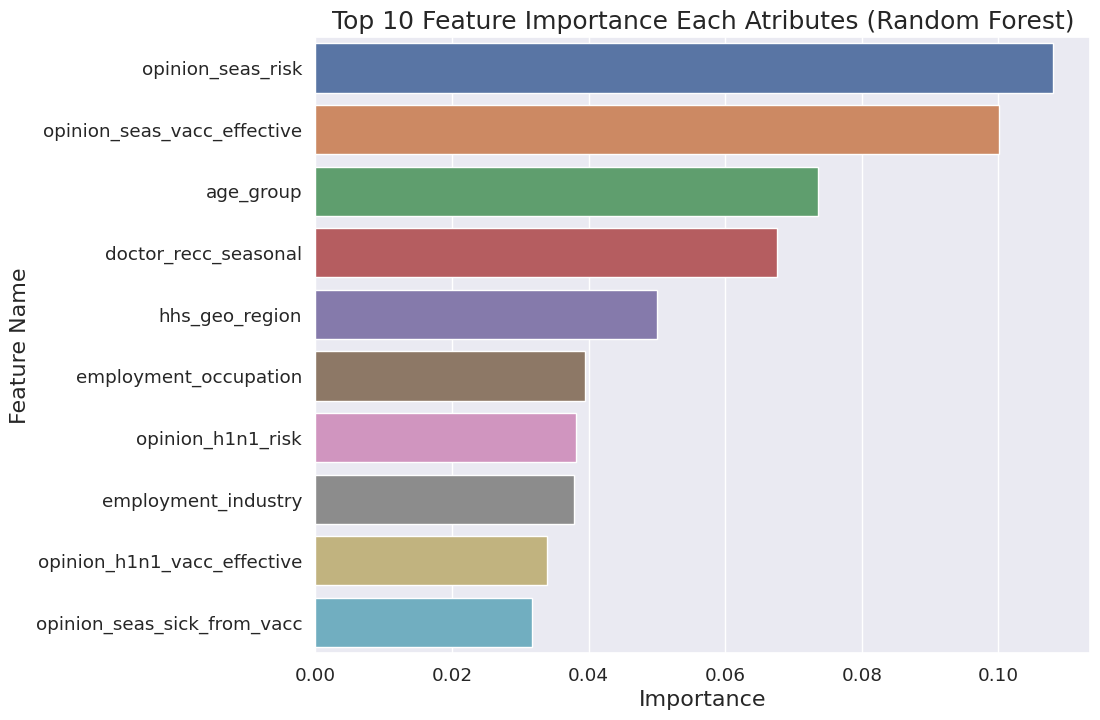

In [ ]:
# Features yang paling berpengaruh terhadap variabel target 'seasonal_vaccine'
imp_df2 = pd.DataFrame({
    "Feature Name" : X2_train.columns,
    "Importance" : rfc2.feature_importances_
})
fi = imp_df2.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Top 10 Feature Importance Each Atributes (Random Forest)', fontsize=18)
plt.xlabel('Importance', fontsize=16)
plt.ylabel('Feature Name', fontsize=16)
plt.show()

Fitur opinion_seas_risk yang mana berisi mengenai pendapat masyarakat terhadap risiko vaksin seasonal ternyata merupakan fitur yang paling berkontribusi dalam kasus vaksinasi ini dengan tingkat kepentintingan melebihi 10% yang disusul dengan opini masyarakat terkait efektivitas vaksin seasonal. Hal ini tidak mengherankan karena kedua fitur ini berkorelasi sedemikian sehingga sangat berpengaruh terhadap model prediksi.

# **Model Evaluation**

# Confusion Matrix Data Train

In [ ]:
# Confusion Matrix pada Data Train
def make_confusion_matrix_sm(model, threshold=0.5):
  # Predict class 1 if probability of being in class 1 is greater than threshold
  # (model.predict(X_test) does this automatically with a threshold of 0.5)
  y_predict = (model.predict_proba(x_sm)[:, 1] >= threshold)
  # calculate the confusion matrix
  train_confusion = confusion_matrix(y_sm, y_predict)

  # plot the confusion matrix as heatmap
  plt.figure(dpi=100)
  sns.set(font_scale=1)
  sns.heatmap(train_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='d', xticklabels=['0', '1'], yticklabels=['0', '1']);
  
  # calculate TP, FP, FN, and TN values from the confusion matrix
  TP = train_confusion[0][0]
  FP = train_confusion[0][1]
  FN = train_confusion[1][0]
  TN = train_confusion[1][1]

  # rotate y-axis ticks
  plt.yticks(rotation = 0)
  # set plot title, x and y labels
  plt.title('Predicted vs. Actual',fontsize = 20,pad = 10);
  plt.xlabel('Predicted')
  plt.ylabel('Actual')

### **H1N1 Vaccine**

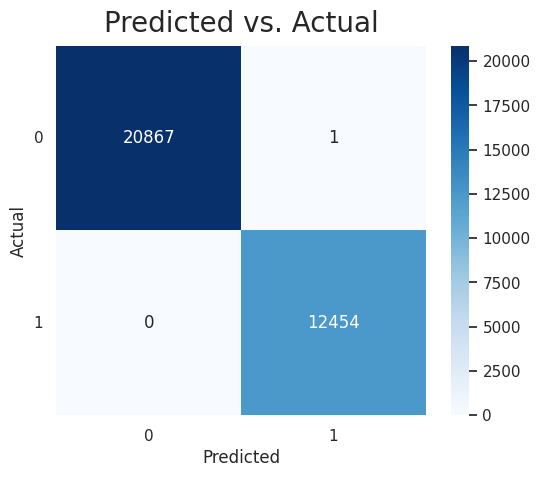

In [ ]:
  # Confusion Matrix data Train H1N1 Vaccine Random Forest
  # Create a confusion matrix for the Random Forest model with a threshold of 0.421 on the validation data
  make_confusion_matrix_sm(grid_search, threshold=0.421)

### **Seasonal Flu Vaccine**

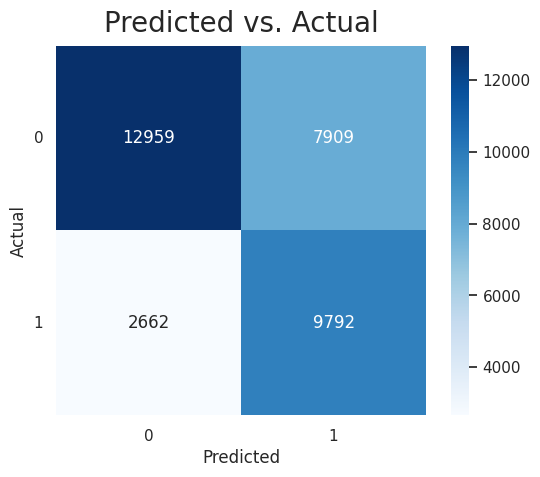

In [ ]:
  # Confusion Matrix data Train Seasonal Flu Vaccine Random Forest
  # Create a confusion matrix for the Random Forest model with a threshold of 0.421 on the validation data
  make_confusion_matrix_sm(grid2_search, threshold=0.421)

# Confusion Matrix Data Test

In [ ]:
# Confusion Matrix pada Data Test
def make_confusion_matrix_test(model, threshold=0.5):
  # Predict class 1 if probability of being in class 1 is greater than threshold
  # (model.predict(X_test) does this automatically with a threshold of 0.5)
  y_predict = (model.predict_proba(X_test)[:, 1] >= threshold)
  # calculate the confusion matrix
  test_confusion = confusion_matrix(y_test, y_predict)

  # plot the confusion matrix as heatmap
  plt.figure(dpi=100)
  sns.set(font_scale=1)
  sns.heatmap(test_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='d', xticklabels=['0', '1'], yticklabels=['0', '1']);
  
  # calculate TP, FP, FN, and TN values from the confusion matrix
  TP = test_confusion[0][0]
  FP = test_confusion[0][1]
  FN = test_confusion[1][0]
  TN = test_confusion[1][1]

  # rotate y-axis ticks
  plt.yticks(rotation = 0)
  # set plot title, x and y labels
  plt.title('Predicted vs. Actual',fontsize = 20,pad = 10);
  plt.xlabel('Predicted')
  plt.ylabel('Actual')

### **H1N1 Vaccine**

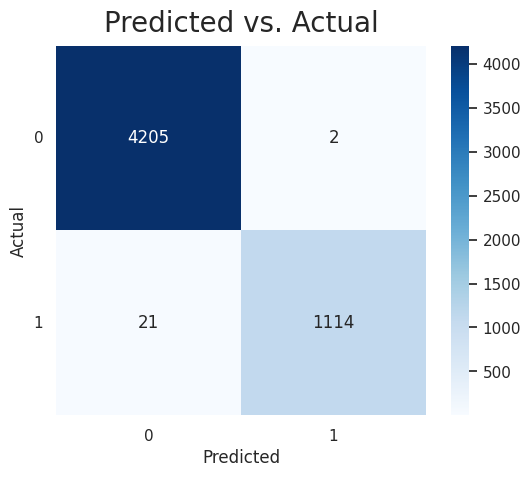

In [ ]:
# Confusion Matrix data Test H1N1 Vaccine Random Forest
# Generate confusion matrix for random forest model on test dataset
make_confusion_matrix_test(grid_search, threshold=0.421)

**Dari data testing pemodelan vaksin h1n1 telah didapatkan persentase untuk akurasi, presisi, dan pengulangannya, sedemikian sehingga akan didapatkan beberapa detail observasi sebagai berikut:**

1. True Positive (TP) = 1114
> Terdapat 1114 orang yang memilih vaksin h1n1 dan berhasil diprediksi benar

2. False Negative (FN) = 21
> Terdapat 21 orang yang melakukan vaksinasi h1n1 tetapi diprediksi tidak melakukan vaksinasi h1n1

3. False Positive (FP) = 2
>  Terdapat 2 orang yang tidak melakukan vaksinasi h1n1 tetapi diprediksi melakukan vaksinasi tersebut

4. True Negative (TN) = 4205
> Terdapat 4205 yang tidak melakukan vaksinasi h1n1 dan berhasil diprediksi benar (tidak melakukan vaksinasi tersebut)



### **Seasonal Flu Vaccine**

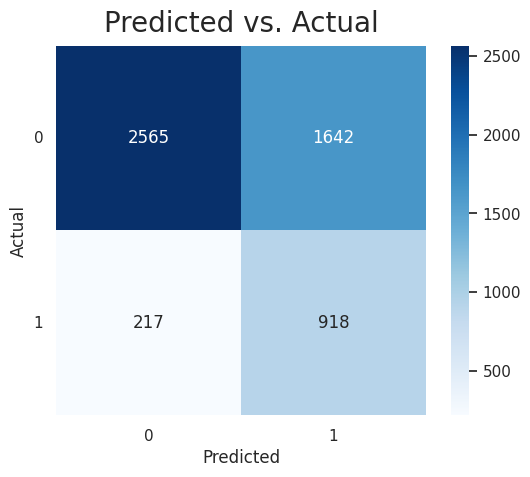

In [ ]:
# Confusion Matrix data Test Seasonal Flu Vaccine Random Forest
# Generate confusion matrix for random forest model on test dataset
make_confusion_matrix_test(grid2_search, threshold=0.421)

**Dari data testing dengan pemodelan vaksin seasonal telah didapatkan persentase untuk akurasi, presisi, dan pengulangannya, sedemikian sehingga akan didapatkan beberapa detail observasi sebagai berikut:**

1. True Positive (TP) = 918
> Terdapat 918 orang yang memilih vaksin h1n1 dan berhasil diprediksi benar

2. False Negative (FN) = 217
> Terdapat 217 orang yang melakukan vaksinasi h1n1 tetapi diprediksi tidak melakukan vaksinasi h1n1

3. False Positive (FP) = 1642
>  Terdapat 2565 orang yang tidak melakukan vaksinasi h1n1 tetapi diprediksi melakukan vaksinasi tersebut

4. True Negative (TN) = 2565
> Terdapat 2565 yang tidak melakukan vaksinasi h1n1 dan berhasil diprediksi benar (tidak melakukan vaksinasi tersebut)



**Jika dibandingkan model seseorang memilih melakukan vaksin h1n1 lebih tinggi dibandingkan dengan yang memilih vaksin seasonal. Hal ini dapat kita lihat detailnya di mana keasalahan tipe I dan tipe II lebih banyak disebabkan pada pemodelan vaksin seasonal dibandingkan vaksin h1n1.**


# Plot ROC AUC

In [ ]:
def plot_roc_curves(X, y, models, model_names, figsize=(10, 8)):
  """
  Plots ROC curves for a list of models.
  Parameters:
  X (numpy.ndarray or pandas.DataFrame): input features for the models
  y (numpy.ndarray or pandas.DataFrame): target variable 
  models (list): list of models to compare
  model_names (list): list of model names to display on the plot
  figsize (tuple): size of the figure to display the plot
  Returns:
  None
  """
  fig, ax = plt.subplots(figsize=figsize)

  # Loop over models and plot ROC curve
  for i, model in enumerate(models):
    y_pred = list(model.predict_proba(X)[:, 1])
    fpr, tpr, threshold = metrics.roc_curve(y, y_pred)
    roc_auc = metrics.auc(fpr, tpr)
    plt.plot(fpr, tpr, label=(model_names[i] + ' AUC = %0.4f' % roc_auc), linewidth=2.0)

  ax.grid(False)
  ax.tick_params(length=6, width=2, labelsize=10, grid_color='r', grid_alpha=0.5)
  leg = plt.legend(loc='lower right', prop={'size': 8})
  leg.get_frame().set_edgecolor('b')
  plt.title('Receiver Operating Characteristic (ROC)', fontsize=10)
  plt.plot([0, 1], [0, 1], 'r--')
  plt.xlim([-.02, 1.02])
  plt.ylim([-.02, 1.02])
  plt.ylabel('True Positive Rate', fontsize=10)
  plt.xlabel('False Positive Rate', fontsize=10)

### **H1N1 Vaccine**

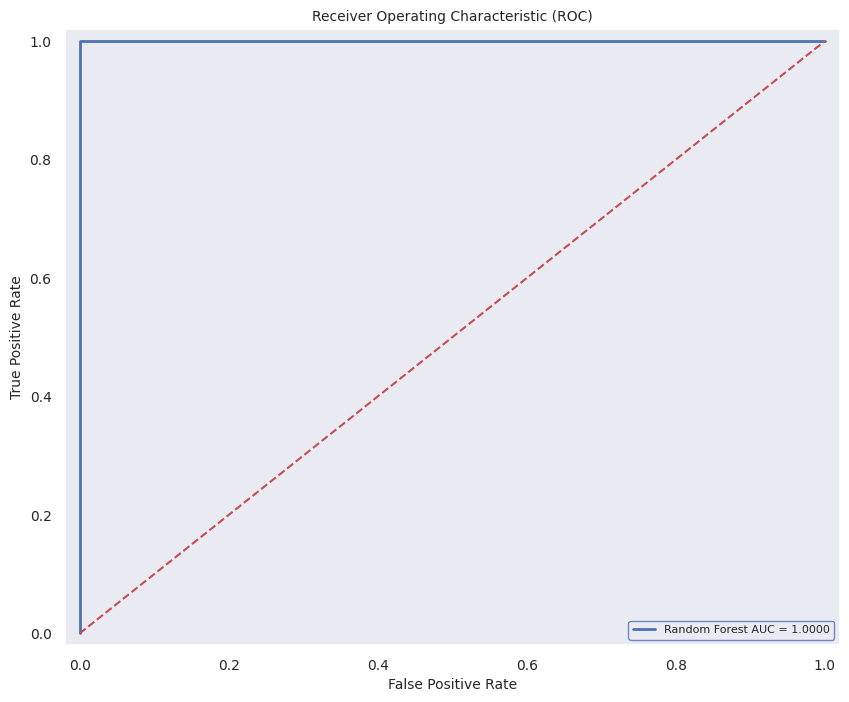

In [ ]:
# Define the list of models to compare
models = [grid_search.best_estimator_]
model_names = ['Random Forest']
# Plot ROC curves for in-sample data train with variable target 'h1n1_vaccine'
plot_roc_curves(x_sm, y_sm, models, model_names)

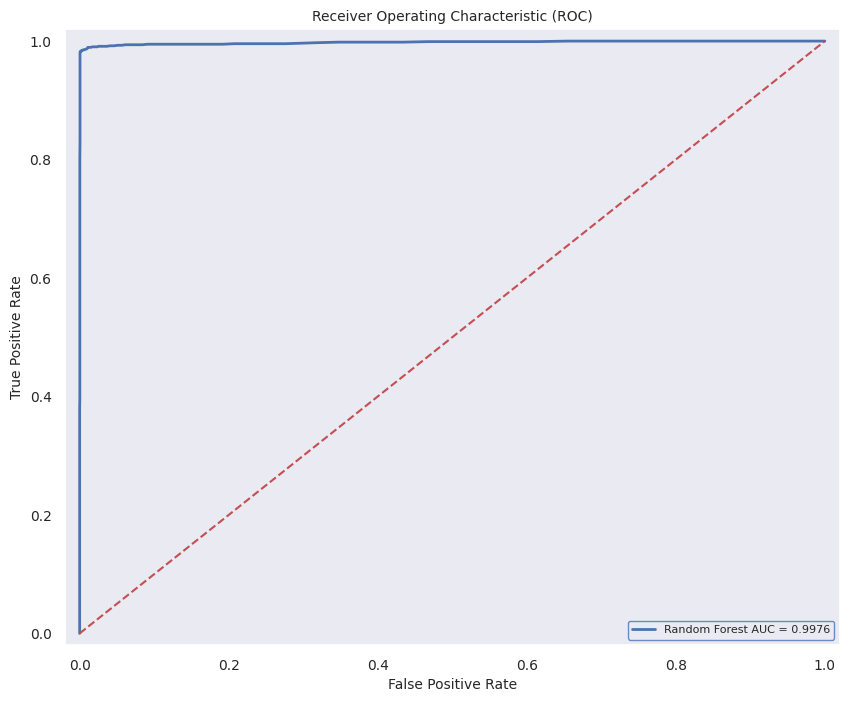

In [ ]:
# Plot ROC curves for out-of-sample data test with variable target 'h1n1_vaccine'
plot_roc_curves(X_test, y_test, models, model_names)

Ternyata, dari data testing, kita dapat melihat bahwa grafik ROC seasonal ini memiliki kinerja yang baik yang mana nilai AUC Random Forest-nya sebesar 99,76%. Dengan kata lain, model pilihan vaksin h1n1 ini memiliki kapabilitas yang baik untuk membedakan seseorang memilih vaksin h1n1 berdasarkan variabel yang ditentukan sebelumnya (kepedulian, pengetahuan, perilaku, opini, rekomendasi dokter, dan sebagainya).

### **Seasonal Flu Vaccine**

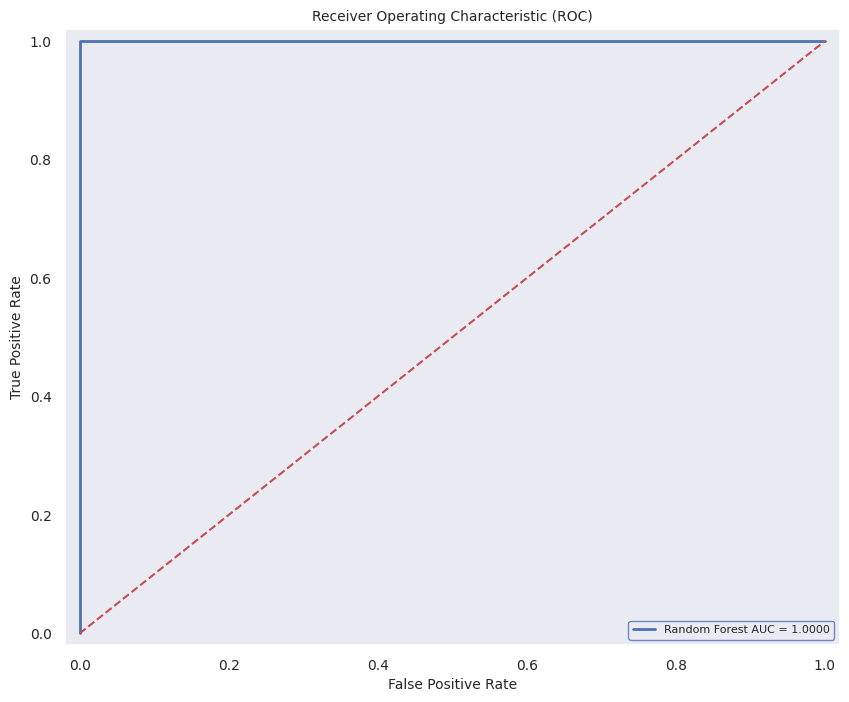

In [ ]:
# Define the list of models to compare
models = [grid2_search.best_estimator_]
model_names = ['Random Forest']
# Plot ROC curves for in-sample data train with variable target 'seasonal_vaccine'
plot_roc_curves(x2_sm, y2_sm, models, model_names)

Dari data latih kita mendapatkan AUC Random Forest 100% vaksin seasonal. Hal ini dapat dinyatakan bahwa proses pembelajaran model ini sangat tinggi. Namun, yang jadi pertanyaan adalah apakah data yang sebenarnya mampu untuk men-generalisasi pola yang telah dipelajari data baru?

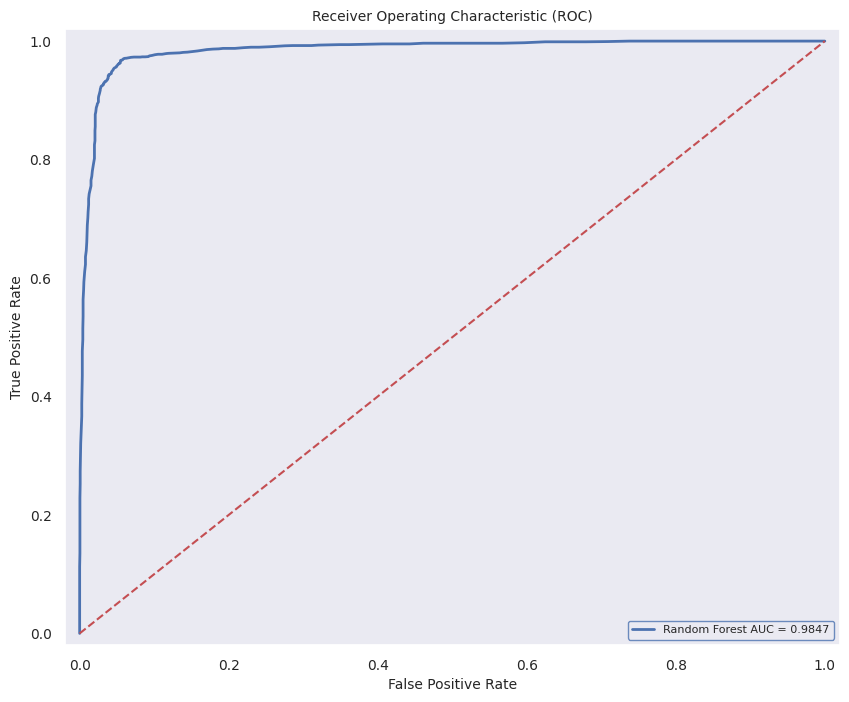

In [ ]:
# Plot ROC curves for out-of-sample data test with variable target 'seasonal_vaccine'
plot_roc_curves(X2_test, y2_test, models, model_names)

Ternyata, dari data testing, kita dapat melihat bahwa grafik ROC Random Forest ini memiliki kinerja yang baik yang mana nilai AUC-nya pun 98,47%. Dengan kata lain, model pilihan vaksin seasonal ini memiliki kapabilitas yang baik untuk membedakan seseorang memilih vaksin h1n1 berdasarkan variabel yang ditentukan sebelumnya (kepedulian, pengetahuan, perilaku, opini, rekomendasi dokter, dan sebagainya).

# **Predict Data Test_Set_Features**

In [ ]:
test_df = pd.read_csv("test_set_features.csv")

# Mengganti Data Missing Values

In [ ]:
# Nan: Diasumsikan lupa / tidak tahu berarti ada kemungkinan memilihnya tidak berdasarkan hasil rekomendasi
# sedemikian sehingga diasumsikan '0'
test_df.doctor_recc_h1n1.fillna(0, inplace=True)
test_df.doctor_recc_seasonal.fillna(0, inplace=True)
test_df.chronic_med_condition.fillna(0,inplace=True)

# Nan: Tidak tahu harus beropini apa
test_df.opinion_h1n1_risk.fillna(3, inplace=True)
test_df.opinion_h1n1_sick_from_vacc.fillna(3, inplace=True)
test_df.opinion_seas_risk.fillna(3, inplace=True)
test_df.opinion_h1n1_vacc_effective.fillna(3,inplace=True)
test_df.opinion_seas_sick_from_vacc.fillna(3,inplace=True)
test_df.opinion_seas_vacc_effective.fillna(3,inplace=True)

# Nan: Tidak menjawab karena beranggapan variabel ini bersifat privasi
test_df.income_poverty.fillna('privacy', inplace=True)
test_df.marital_status.fillna('privacy', inplace=True)
test_df.employment_industry.fillna('privacy',inplace=True)
test_df.employment_occupation.fillna('privacy', inplace=True)
test_df.employment_status.fillna('privacy', inplace=True)

In [ ]:
# Missing values pada features yang tidak diasumsikan, diganti menjadi modus data
test_df = test_df.fillna(test_df.mode().iloc[0])
test_df.head()

respondent_id  h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
0          26707          2.00            2.00                       0.00   
1          26708          1.00            1.00                       0.00   
2          26709          2.00            2.00                       0.00   
3          26710          1.00            1.00                       0.00   
4          26711          3.00            1.00                       1.00   

   behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
0                  1.00                  0.00                   1.00   
1                  0.00                  0.00                   0.00   
2                  0.00                  1.00                   1.00   
3                  0.00                  0.00                   0.00   
4                  1.00                  0.00                   1.00   

   behavioral_large_gatherings  behavioral_outside_home  \
0                         1.00                     0.00   
1                         0.00                     0.00   
2                         1.00                     1.00   
3                         0.00                     0.00   
4                         1.00                     1.00   

   behavioral_touch_face  ...             income_poverty  marital_status  \
0                   1.00  ...                  > $75,000     Not Married   
1                   0.00  ...              Below Poverty     Not Married   
2                   1.00  ...                  > $75,000         Married   
3                   0.00  ...  <= $75,000, Above Poverty         Married   
4                   1.00  ...  <= $75,000, Above Poverty     Not Married   

   rent_or_own   employment_status  hhs_geo_region                census_msa  \
0         Rent            Employed        mlyzmhmf  MSA, Not Principle  City   
1         Rent            Employed        bhuqouqj                   Non-MSA   
2          Own            Employed        lrircsnp                   Non-MSA   
3          Own  Not in Labor Force        lrircsnp  MSA, Not Principle  City   
4          Own            Employed        lzgpxyit                   Non-MSA   

   household_adults  household_children  employment_industry  \
0              1.00                0.00             atmlpfrs   
1              3.00                0.00             atmlpfrs   
2              1.00                0.00             nduyfdeo   
3              1.00                0.00              privacy   
4              0.00                1.00             fcxhlnwr   

   employment_occupation  
0               hfxkjkmi  
1               xqwwgdyp  
2               pvmttkik  
3                privacy  
4               mxkfnird  

[5 rows x 36 columns]

In [ ]:
test_df.isna().sum()

respondent_id                  0
h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_re

Berdasarkan heatmap diatas data sudah bersih dari missing values karena missing values sudah berhasil diubah berdasarkan asumsi dan modus data

# Labeling Input Data

In [ ]:
# Change type float to int
test_df = test_df.astype({"h1n1_concern":"int","h1n1_knowledge":"int","behavioral_antiviral_meds":"int","behavioral_avoidance":"int","behavioral_face_mask":"int",
                            "behavioral_wash_hands":"int","behavioral_large_gatherings":"int","behavioral_outside_home":"int","behavioral_touch_face":"int",
                            "doctor_recc_h1n1":"int","doctor_recc_seasonal":"int","chronic_med_condition":"int","child_under_6_months":"int","opinion_h1n1_vacc_effective":"int",
                            "opinion_h1n1_risk":"int","opinion_h1n1_sick_from_vacc":"int","opinion_seas_vacc_effective":"int","opinion_seas_risk":"int",
                            "opinion_seas_sick_from_vacc":"int","household_adults":"int","household_children":"int"
                            })

In [ ]:
# Label Encoder
from sklearn import preprocessing

# Loop over each column in the DataFrame where dtype is 'object'
for col in test_df.select_dtypes(include = ['object']).columns:
  # Initialize a LabelEncoder object
  label_encoder = preprocessing.LabelEncoder()
  # Fit the encoder to the unique values in the column
  label_encoder.fit(test_df[col].unique())
  # Transform the column using the encoder
  test_df[col] = label_encoder.transform(test_df[col])
  # Print the column name and the unique encoded values
  print(f"{col}: {test_df[col].unique()}")

age_group: [1 0 3 4 2]
education: [2 0 3 1]
race: [1 3 0 2]
sex: [0 1]
income_poverty: [1 2 0 3]
marital_status: [1 0 2]
rent_or_own: [1 0]
employment_status: [0 1 2 3]
hhs_geo_region: [7 1 5 6 3 8 2 9 4 0]
census_msa: [0 2 1]
employment_industry: [ 1 10 12  4 13  0  8 15 19  5  6 17  2 20  3 21 18 16  9  7 11 14]
employment_occupation: [ 7 21 13 12 10  2 20 16 19  3 22  8 11  9  5 14  6 17  4 18  1 15  0 23]


In [ ]:
new_df = test_df[['h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation']]

In [ ]:
# Make predictions on the testing data
y_new_pred = rfc.predict(new_df)

# Create a DataFrame with the predicted labels
h1n1_vaccine_pred = pd.DataFrame({'h1n1_vaccine': y_new_pred})
h1n1_vaccine_pred

h1n1_vaccine
0                 0
1                 0
2                 0
3                 1
4                 0
...             ...
26703             1
26704             0
26705             0
26706             0
26707             1

[26708 rows x 1 columns]

In [ ]:
# Make predictions on the testing data
y2_pred = rfc2.predict(new_df)

# Create a DataFrame with the predicted labels
seasonal_vaccine_pred = pd.DataFrame({'seasonal_vaccine': y2_pred})
seasonal_vaccine_pred

seasonal_vaccine
0                     0
1                     0
2                     1
3                     1
4                     0
...                 ...
26703                 0
26704                 0
26705                 0
26706                 0
26707                 1

[26708 rows x 1 columns]

In [ ]:
train_df.respondent_id

0            0
1            1
2            2
3            3
4            4
         ...  
26702    26702
26703    26703
26704    26704
26705    26705
26706    26706
Name: respondent_id, Length: 26707, dtype: int64

In [ ]:
submission_format = pd.DataFrame([])

submission_format['respondent_id'] = test_df.respondent_id
submission_format['h1n1_vaccine'] = h1n1_vaccine_pred
submission_format['seasonal_vaccine'] = seasonal_vaccine_pred
submission_format = submission_format.set_index('respondent_id')


In [ ]:
submission_format.to_csv('submission_format.csv')

# **Daftar Pustaka**

1.   https://en.wikipedia.org/wiki/Oversampling_and_undersampling_in_data_analysis
2.   https://towardsdatascience.com/understanding-random-forest-58381e0602d2
3.   https://lazypredict.readthedocs.io/en/latest/usage.html#classification
4.   https://towardsdatascience.com/understanding-random-forest-58381e0602d2
